## Dinamic Co
# Analisis Nutricional de Bebidas en Starbucks 

Este Notebook contiene un análisis detallado de un conjunto de datos relacionados con las bebidas disponibles en Starbucks. El documento está organizado en múltiples celdas, cada una de las cuales contiene código y texto explicativo.

El análisis comienza con la importación de las bibliotecas necesarias, como pandas, numpy, matplotlib y seaborn. A continuación, se carga el conjunto de datos desde un archivo CSV y se muestra una vista previa de las primeras filas.

A lo largo del documento, se realizan diversas transformaciones y manipulaciones de los datos para asegurar su calidad y coherencia. Se renombran las columnas, se convierten los tipos de datos, se eliminan valores nulos y se realizan cálculos estadísticos descriptivos.

Se lleva a cabo un análisis exploratorio de los datos, donde se examinan las distribuciones de las variables nutricionales y se identifican tendencias y patrones. Se generan gráficos de barras y histogramas para visualizar la frecuencia de los valores en diferentes categorías.

Además, se realizan pruebas de análisis de varianza (ANOVA) para evaluar la relación entre las variables categóricas y las variables numéricas. Se presentan los resultados de las pruebas ANOVA, incluyendo los valores de F y los p-valores.

Se exploran las correlaciones entre las variables numéricas utilizando una matriz de correlación. Se identifican las variables con mayor correlación y se discuten sus implicaciones.

En general, este documento proporciona una visión completa del conjunto de datos de bebidas en Starbucks, incluyendo estadísticas descriptivas, análisis exploratorio y pruebas de hipótesis. Este análisis puede ser útil para comprender mejor las características nutricionales de las bebidas y tomar decisiones informadas sobre la elección de bebidas en Starbucks.

### Se extraer la data y se revisa para limpiarla

In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
# Read the CSV file into a DataFrame
df = pd.read_csv('starbucks.csv')

# Display the first few rows of the DataFrame
df.head()


Beverage_category       Beverage      Beverage_prep  Calories  \
0                   Coffee  Brewed Coffee              Short         3   
1                   Coffee  Brewed Coffee               Tall         4   
2                   Coffee  Brewed Coffee             Grande         5   
3                   Coffee  Brewed Coffee              Venti         5   
4  Classic Espresso Drinks    Caffè Latte  Short Nonfat Milk        70   

   Total Fat (g)  Trans Fat (g)   Saturated Fat (g)   Sodium (mg)  \
0            0.1             0.0                0.0             0   
1            0.1             0.0                0.0             0   
2            0.1             0.0                0.0             0   
3            0.1             0.0                0.0             0   
4            0.1             0.1                0.0             5   

    Total Carbohydrates (g)   Cholesterol (mg)   Dietary Fibre (g)  \
0                          5                 0                   0   
1                         10                 0                   0   
2                         10                 0                   0   
3                         10                 0                   0   
4                         75                10                   0   

    Sugars (g)   Protein (g)  Vitamin A (% DV)  Vitamin C (% DV)  \
0            0            0.3                0%               0%   
1            0            0.5                0%               0%   
2            0            1.0                0%               0%   
3            0            1.0                0%               0%   
4            9            6.0               10%               0%   

   Calcium (% DV)  Iron (% DV)  Caffeine (mg)  
0               0%           0%           175  
1               0%           0%           260  
2               0%           0%           330  
3               2%           0%           410  
4              20%           0%            75

Se explora la data para normalizar errores. Así será más conveniente manipular la data y poder tener formates mas consistentes y compatibles. 

In [3]:
# Describe dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Beverage_category          242 non-null    object 
 1   Beverage                   242 non-null    object 
 2   Beverage_prep              242 non-null    object 
 3   Calories                   242 non-null    int64  
 4    Total Fat (g)             242 non-null    object 
 5   Trans Fat (g)              242 non-null    float64
 6   Saturated Fat (g)          242 non-null    float64
 7    Sodium (mg)               242 non-null    int64  
 8    Total Carbohydrates (g)   242 non-null    int64  
 9   Cholesterol (mg)           242 non-null    int64  
 10   Dietary Fibre (g)         242 non-null    int64  
 11   Sugars (g)                242 non-null    int64  
 12   Protein (g)               242 non-null    float64
 13  Vitamin A (% DV)           242 non-null    object 

We can observe there are several dattypes that need fixing, such as numerical values saved as objects, and strings as objects as well.

We want all categorical to be strings and all numerical to be either float64 or int64.

In [4]:
# Print column names to change ones with errors to correct names
df.columns

Index(['Beverage_category', 'Beverage', 'Beverage_prep', 'Calories',
       ' Total Fat (g)', 'Trans Fat (g) ', 'Saturated Fat (g)', ' Sodium (mg)',
       ' Total Carbohydrates (g) ', 'Cholesterol (mg)', ' Dietary Fibre (g)',
       ' Sugars (g)', ' Protein (g) ', 'Vitamin A (% DV) ', 'Vitamin C (% DV)',
       ' Calcium (% DV) ', 'Iron (% DV) ', 'Caffeine (mg)'],
      dtype='object')

In [39]:
# Rename column to delete empty space
df = df.rename(columns={' Total Fat (g)': 'Total Fat (g)', 'Trans Fat (g) ':'Trans Fat (g)' , ' Sodium (mg)': 'Sodium (mg)', ' Dietary Fibre (g)': 'Dietary Fibre (g)', ' Sugars (g)': 'Sugars (g)',' Total Carbohydrates (g) ': 'Total Carbohydrates (g)', ' Protein (g) ': 'Protein (g)', 'Vitamin A (% DV) ':'Vitamin A (% DV)', ' Calcium (% DV) ': 'Calcium (% DV)', 'Iron (% DV) ':'Iron (% DV)'})

print(df.columns.tolist())

['Beverage_category', 'Beverage', 'Beverage_prep', 'Calories', 'Total Fat (g)', 'Trans Fat (g)', 'Saturated Fat (g)', 'Sodium (mg)', 'Total Carbohydrates (g)', 'Cholesterol (mg)', 'Dietary Fibre (g)', 'Sugars (g)', 'Protein (g)', 'Vitamin A (% DV)', 'Vitamin C (% DV)', 'Calcium (% DV)', 'Iron (% DV)', 'Caffeine (mg)', 'Cluster']


In [6]:
# Convert objects to strings
df['Beverage_category'] = df['Beverage_category'].astype('string')
df['Beverage'] = df['Beverage'].astype('string')
df['Beverage_prep'] = df['Beverage_prep'].astype('string')

# Replace ' ' with '.' to convert to a float-friendly format
# This is done since, by exploring the data, some values were observed to have a space instead of a "." on decimal numbers
df['Total Fat (g)'] = df['Total Fat (g)'].str.replace(' ', '.', regex=False)

# Convert the column to float, coercing errors to NaN
df['Total Fat (g)'] = pd.to_numeric(df['Total Fat (g)'], errors='coerce')

# Convert percentage columns to floats
columns_to_convert = ['Vitamin A (% DV)', 'Vitamin C (% DV)', 'Calcium (% DV)', 'Iron (% DV)']

for column in columns_to_convert:
    # Remove '%' and convert to float
    df[column] = df[column].str.replace('%', '').astype(float)
    # Convert percentage to decimal
    df[column] = df[column] / 100.0


# Convert 'Caffeine (mg)' to float first, coercing errors to NaN
df['Caffeine (mg)'] = pd.to_numeric(df['Caffeine (mg)'], errors='coerce')

# Optional: Fill NaN values with a placeholder like 0 (if appropriate)
df['Caffeine (mg)'] = df['Caffeine (mg)'].fillna(0)

# Convert to int (ensure no NaN values exist in this column before doing so)
df['Caffeine (mg)'] = df['Caffeine (mg)'].astype('int64')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Beverage_category        242 non-null    string 
 1   Beverage                 242 non-null    string 
 2   Beverage_prep            242 non-null    string 
 3   Calories                 242 non-null    int64  
 4   Total Fat (g)            242 non-null    float64
 5   Trans Fat (g)            242 non-null    float64
 6   Saturated Fat (g)        242 non-null    float64
 7   Sodium (mg)              242 non-null    int64  
 8   Total Carbohydrates (g)  242 non-null    int64  
 9   Cholesterol (mg)         242 non-null    int64  
 10  Dietary Fibre (g)        242 non-null    int64  
 11  Sugars (g)               242 non-null    int64  
 12  Protein (g)              242 non-null    float64
 13  Vitamin A (% DV)         242 non-null    float64
 14  Vitamin C (% DV)         2

In [8]:
# Extract descriptive statistics
df.describe()

Calories  Total Fat (g)  Trans Fat (g)   Saturated Fat (g)  \
count  242.000000     242.000000      242.000000         242.000000   
mean   193.871901       2.904959        1.307025           0.037603   
std    102.863303       2.944376        1.640259           0.071377   
min      0.000000       0.000000        0.000000           0.000000   
25%    120.000000       0.200000        0.100000           0.000000   
50%    185.000000       2.500000        0.500000           0.000000   
75%    260.000000       4.500000        2.000000           0.100000   
max    510.000000      15.000000        9.000000           0.300000   

       Sodium (mg)  Total Carbohydrates (g)  Cholesterol (mg)  \
count   242.000000               242.000000        242.000000   
mean      6.363636               128.884298         35.991736   
std       8.630257                82.303223         20.795186   
min       0.000000                 0.000000          0.000000   
25%       0.000000                70.000000         21.000000   
50%       5.000000               125.000000         34.000000   
75%      10.000000               170.000000         50.750000   
max      40.000000               340.000000         90.000000   

       Dietary Fibre (g)  Sugars (g)  Protein (g)  Vitamin A (% DV)  \
count         242.000000  242.000000   242.000000        242.000000   
mean            0.805785   32.962810     6.978512          0.098306   
std             1.445944   19.730199     4.871659          0.080980   
min             0.000000    0.000000     0.000000          0.000000   
25%             0.000000   18.000000     3.000000          0.040000   
50%             0.000000   32.000000     6.000000          0.080000   
75%             1.000000   43.750000    10.000000          0.150000   
max             8.000000   84.000000    20.000000          0.500000   

       Vitamin C (% DV)  Calcium (% DV)  Iron (% DV)  Caffeine (mg)  
count        242.000000      242.000000   242.000000     242.000000  
mean           0.036488        0.207562     0.074463      81.012397  
std            0.144218        0.145423     0.104865      66.946655  
min            0.000000        0.000000     0.000000       0.000000  
25%            0.000000        0.100000     0.000000      11.250000  
50%            0.000000        0.200000     0.020000      75.000000  
75%            0.000000        0.300000     0.100000     130.000000  
max            1.000000        0.600000     0.500000     410.000000

In [9]:
# Check for null values
df.isna().sum()

Beverage_category          0
Beverage                   0
Beverage_prep              0
Calories                   0
Total Fat (g)              0
Trans Fat (g)              0
Saturated Fat (g)          0
Sodium (mg)                0
Total Carbohydrates (g)    0
Cholesterol (mg)           0
Dietary Fibre (g)          0
Sugars (g)                 0
Protein (g)                0
Vitamin A (% DV)           0
Vitamin C (% DV)           0
Calcium (% DV)             0
Iron (% DV)                0
Caffeine (mg)              0
dtype: int64

In [10]:
# Check for duplicated rows
df[df.duplicated()]


Empty DataFrame
Columns: [Beverage_category, Beverage, Beverage_prep, Calories, Total Fat (g), Trans Fat (g) , Saturated Fat (g), Sodium (mg), Total Carbohydrates (g), Cholesterol (mg), Dietary Fibre (g), Sugars (g), Protein (g), Vitamin A (% DV), Vitamin C (% DV), Calcium (% DV), Iron (% DV), Caffeine (mg)]
Index: []

By inspecting the dataset we can observe there are no null values and no duplicated rows

Now some EDA will be peformed to start understading how variables relate to each other

## Analisis de Datos Explorativos (EDA)

El objetivo es poder extraer algunas estadisticas descriptivas de la data, entender como se compartan las variables en presencia de otras y poder correlacionar distintos nutritional facts a traves de las distintas categorias de bebidas.

In [11]:
# Count Unique values
unique_counts = df.nunique()
print("Unique elements per columns:")
print(" "*100)
print(unique_counts)


# Display the unique values of the 'Beverage_category' column
print(" "*100)
print('Beverage category count por item:')
print(" "*100)
print(df['Beverage_category'].value_counts())

# Display the unique values of the 'Beverage' column
print(" "*100)
print('Beverage count por item:')
print(" "*100)
print(df['Beverage'].value_counts())

# Display the unique values of the 'Beverage_prep' column
print(" "*100)
print('Beverage prep count por item:')
print(" "*100)
print(df['Beverage_prep'].value_counts())


Unique elements per columns:
                                                                                                    
Beverage_category           9
Beverage                   33
Beverage_prep              13
Calories                   48
Total Fat (g)              24
Trans Fat (g)              18
Saturated Fat (g)           4
Sodium (mg)                 9
Total Carbohydrates (g)    51
Cholesterol (mg)           75
Dietary Fibre (g)           8
Sugars (g)                 70
Protein (g)                26
Vitamin A (% DV)           11
Vitamin C (% DV)           10
Calcium (% DV)             14
Iron (% DV)                13
Caffeine (mg)              34
dtype: int64
                                                                                                    
Beverage category count por item:
                                                                                                    
Beverage_category
Classic Espresso Drinks              58
Tazo® Tea Drinks       

In [12]:
# Unique Beverage Category
print("Beverage categories:")
print(df['Beverage_category'].unique())

# Unique Beverage
print(" "*100)
print("Beverages:")
print(df["Beverage"].unique())   

# Unique Beverage prep
print(" "*100)
print("Beverages Preparation:")
print(df["Beverage_prep"].unique())

Beverage categories:
<StringArray>
[                           'Coffee',           'Classic Espresso Drinks',
         'Signature Espresso Drinks',                  'Tazo® Tea Drinks',
             'Shaken Iced Beverages',                         'Smoothies',
       'Frappuccino® Blended Coffee', 'Frappuccino® Light Blended Coffee',
        'Frappuccino® Blended Crème']
Length: 9, dtype: string
                                                                                                    
Beverages:
<StringArray>
[                                      'Brewed Coffee',
                                         'Caffè Latte',
                 'Caffè Mocha (Without Whipped Cream)',
            'Vanilla Latte (Or Other Flavoured Latte)',
                                     'Caffè Americano',
                                          'Cappuccino',
                                            'Espresso',
                          'Skinny Latte (Any Flavour)',
                            

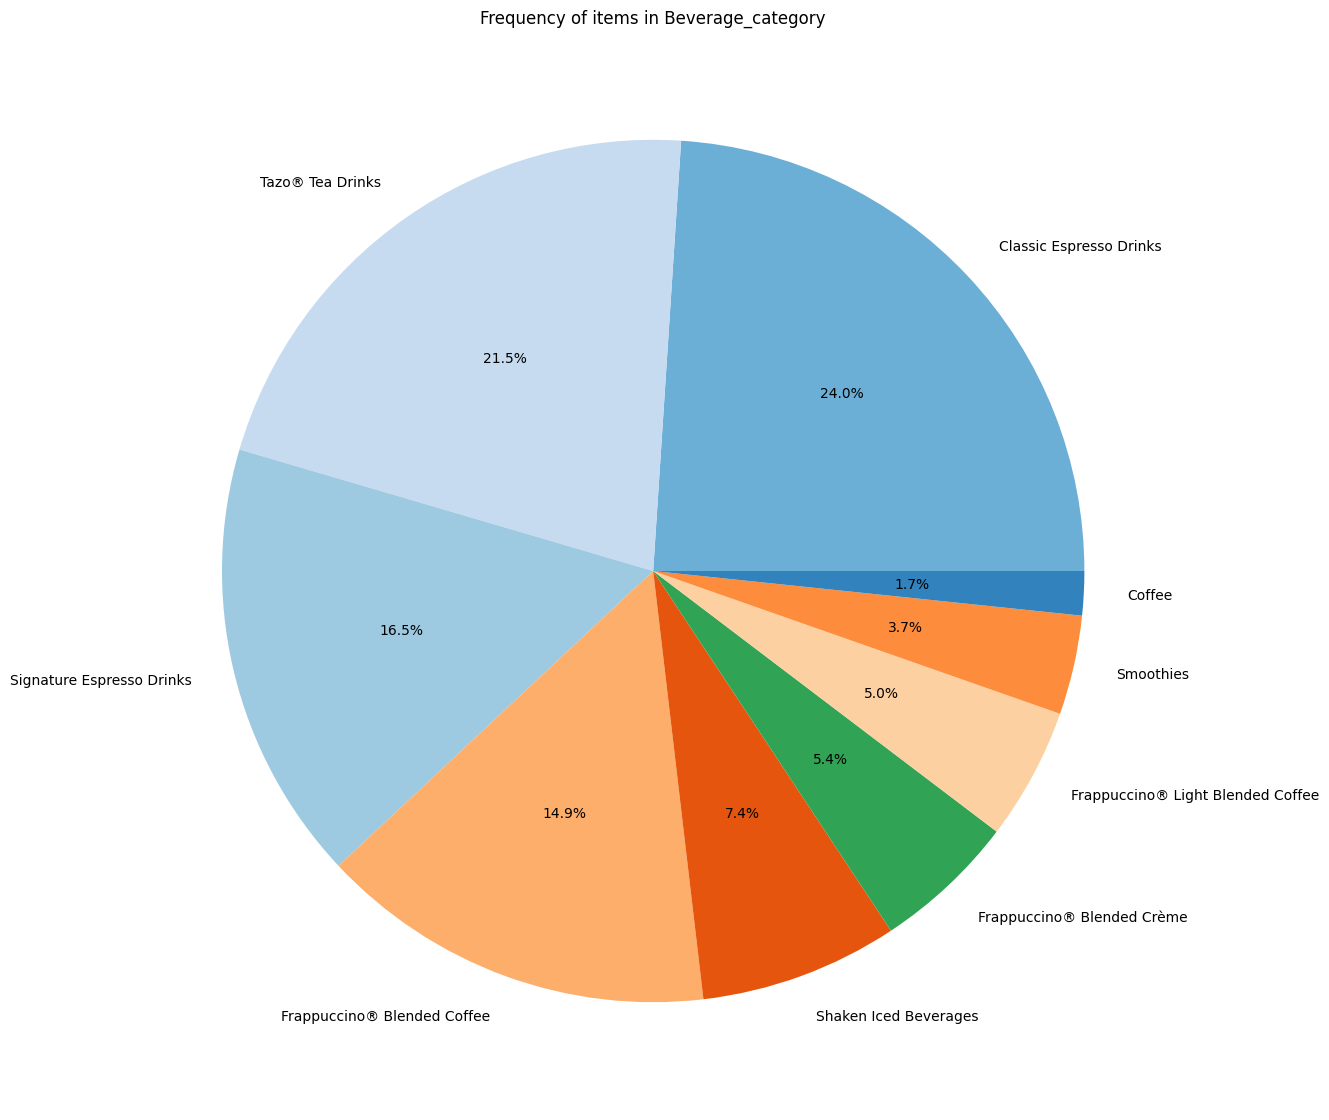

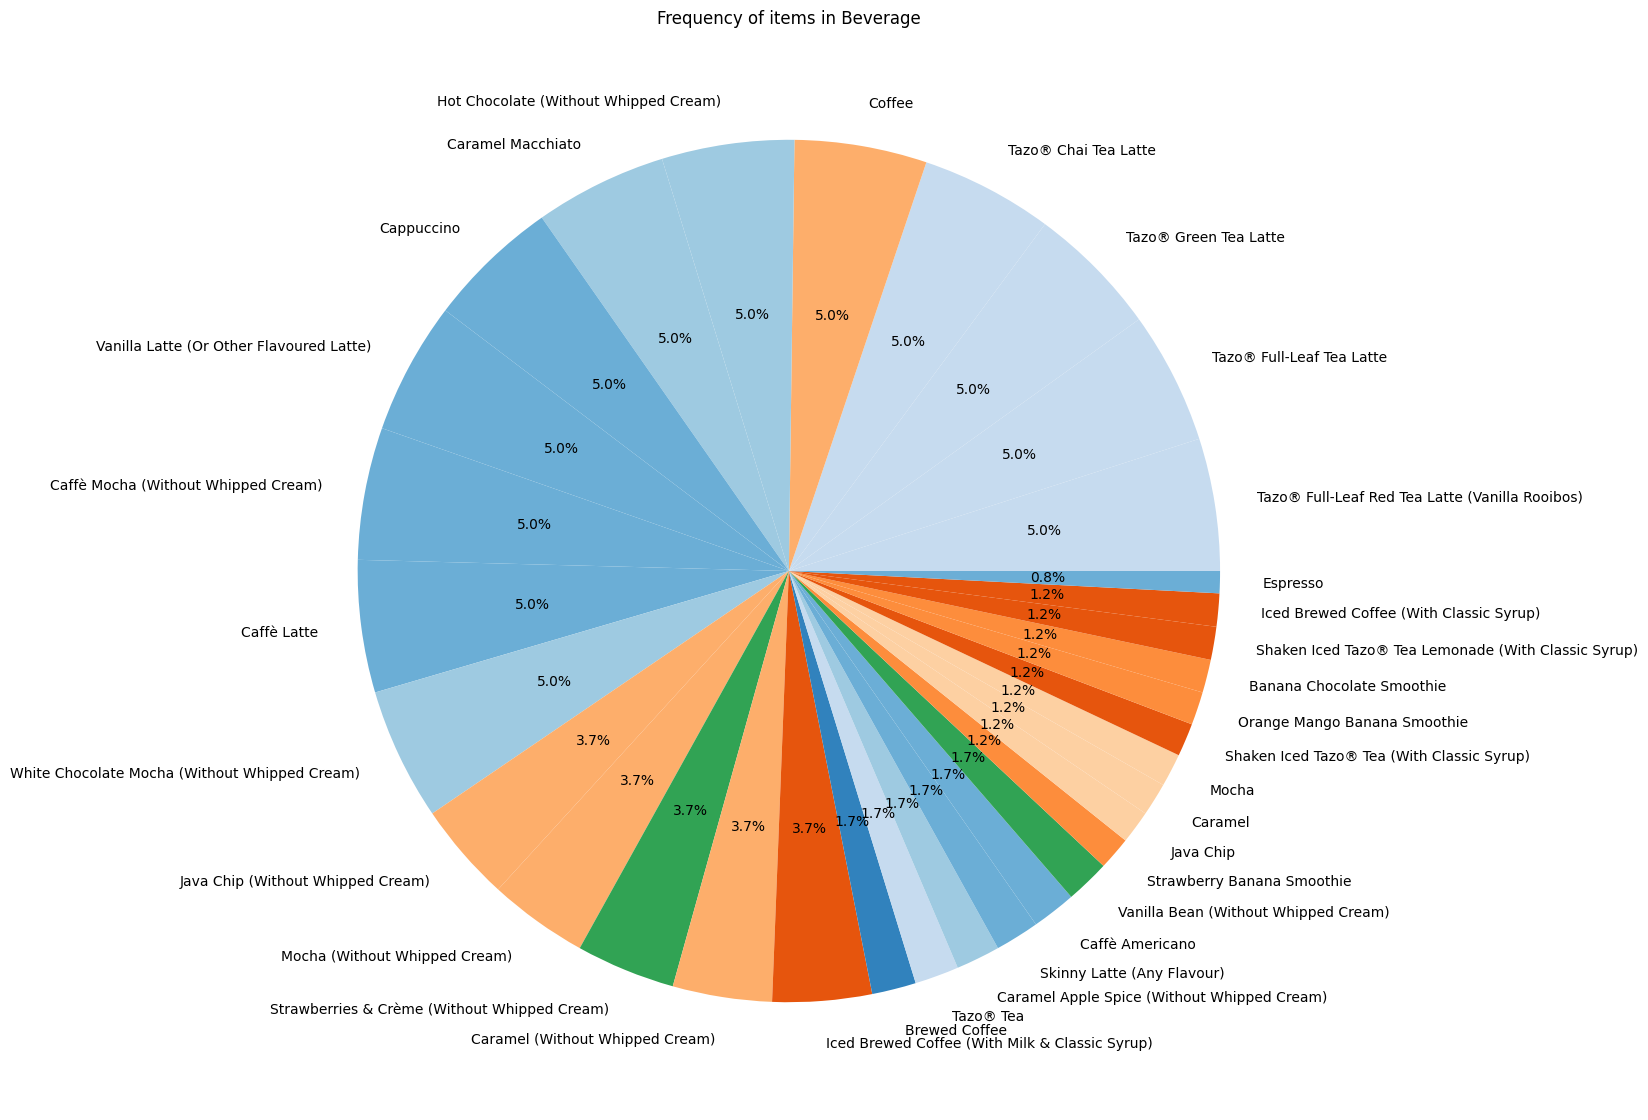

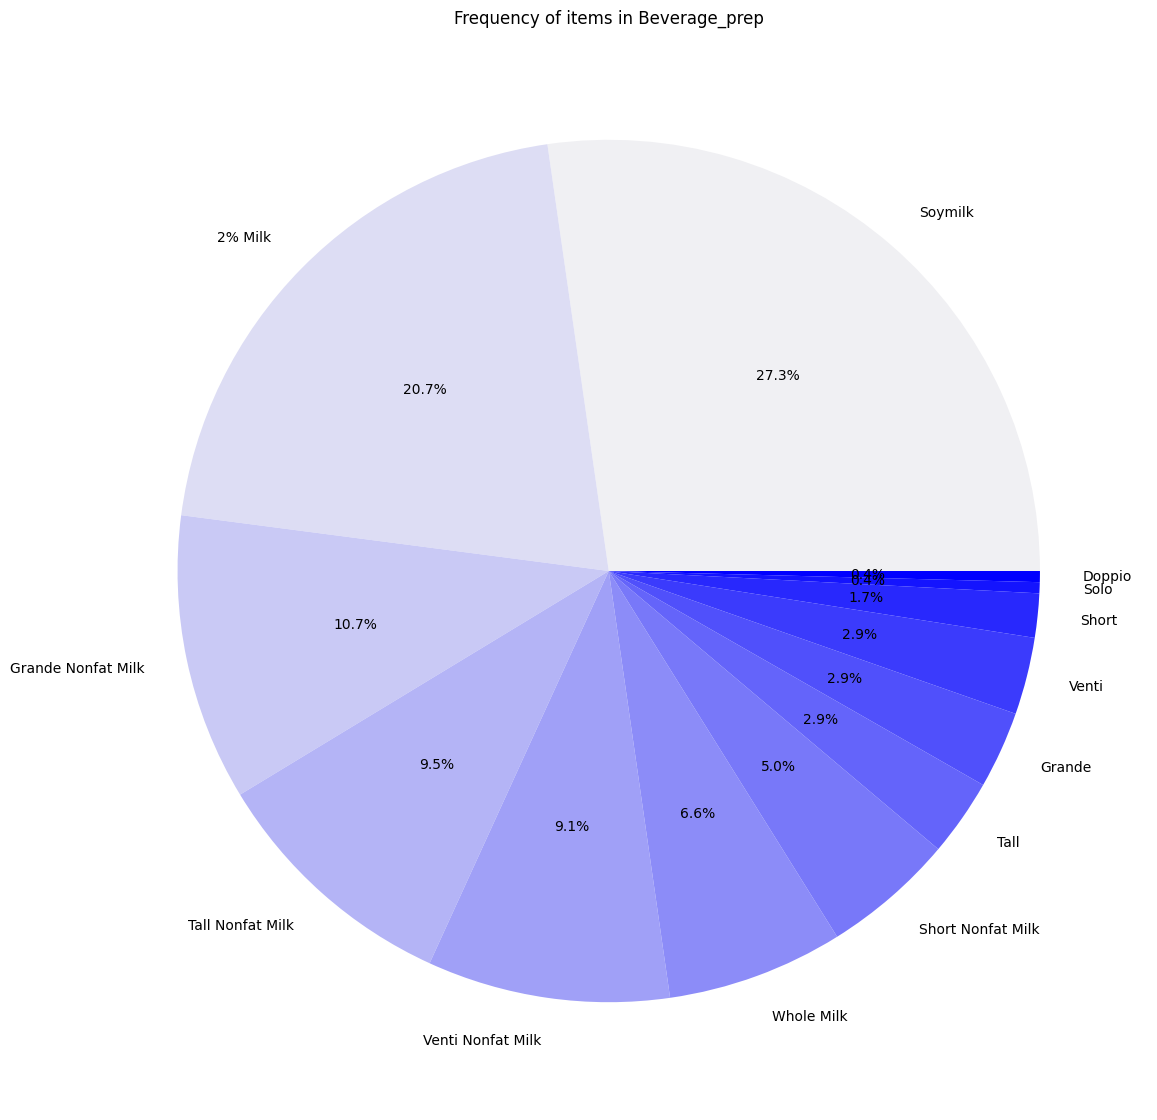

In [13]:
# 1. Assign Colors to Categories
categories = df['Beverage_category'].unique()
palette = sns.color_palette("tab20c", len(categories))  # BuPu is a blue-purple palette
category_colors = {category: color for category, color in zip(categories, palette)}

# 2. Map Beverages to Categories (for color mapping)
beverage_to_category = df.drop_duplicates('Beverage')[['Beverage', 'Beverage_category']].set_index('Beverage')['Beverage_category'].to_dict()

# 3. Iterate over the columns and plot
for column in ['Beverage_category', 'Beverage', 'Beverage_prep']:
    value_counts = df[column].value_counts()

    # Set up colors based on the column
    if column == 'Beverage_category':
        colors = [category_colors[cat] for cat in value_counts.index]
    elif column == 'Beverage':
        colors = [category_colors[beverage_to_category[bev]] for bev in value_counts.index]
    else:  # For beverage_prep, use a default palette or something else
        colors = sns.color_palette("light:b", len(value_counts))

    # Plot a pie chart
    plt.figure(figsize=(20, 14))
    plt.pie(value_counts.values, labels=value_counts.index, autopct='%1.1f%%', colors=colors)
    plt.title(f'Frequency of items in {column}')
    plt.show()


Graficando Histogramas para entender la distribucion de los valores nutricionales

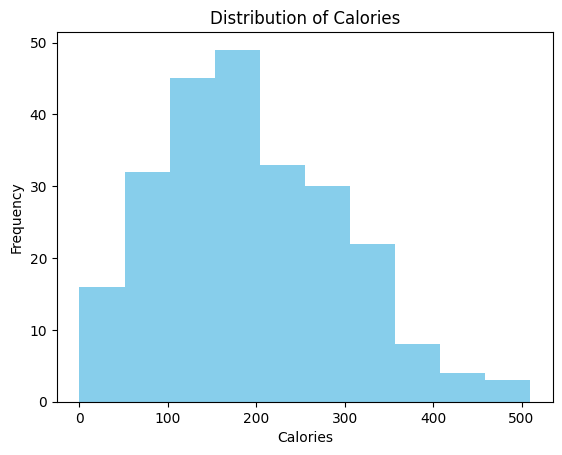

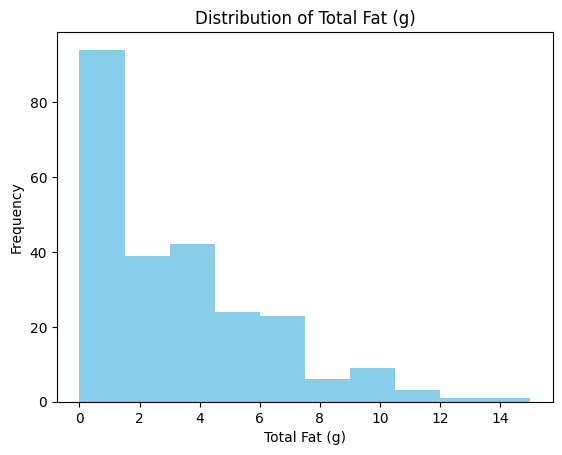

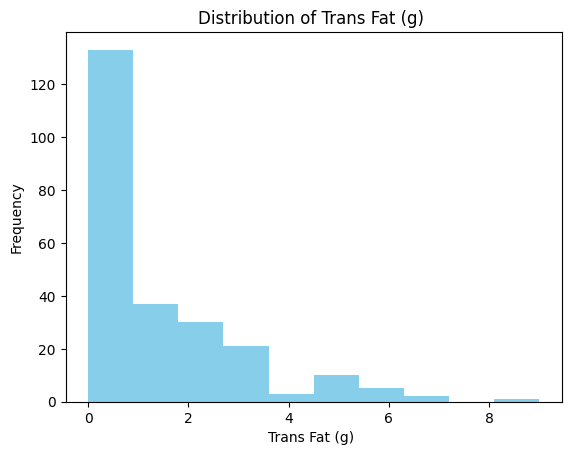

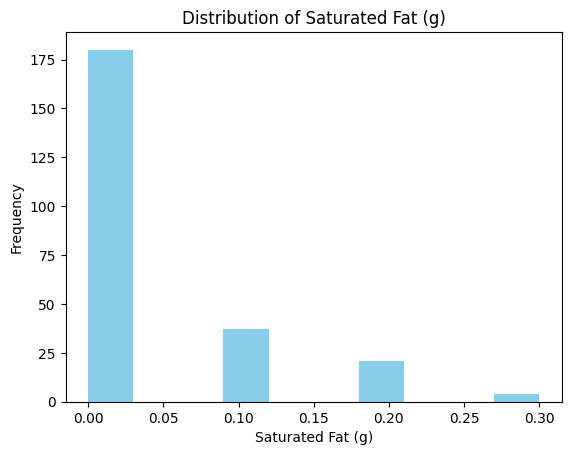

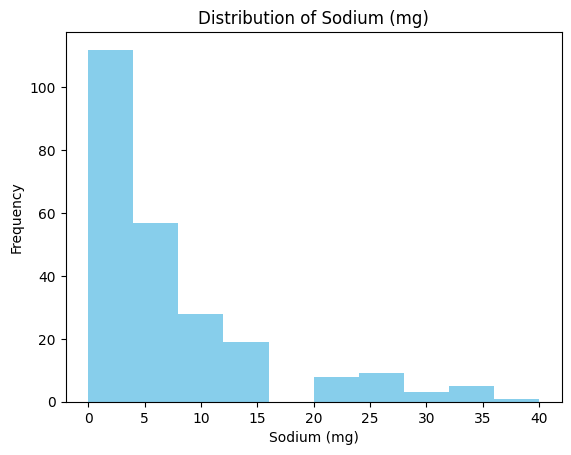

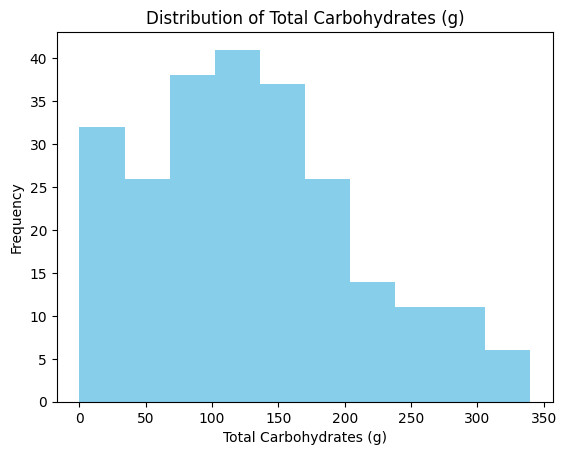

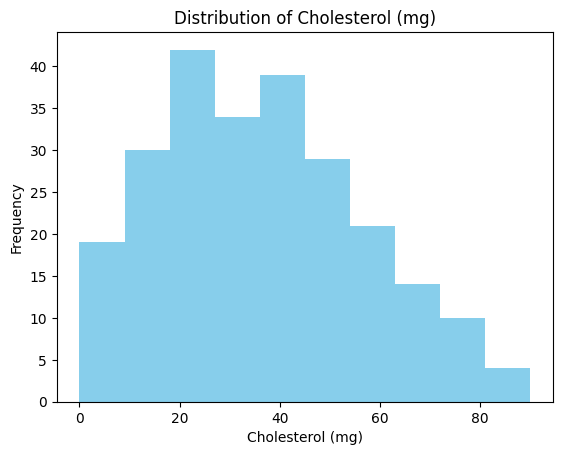

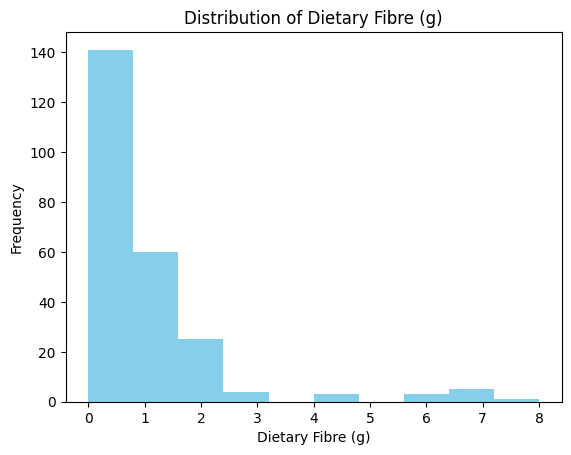

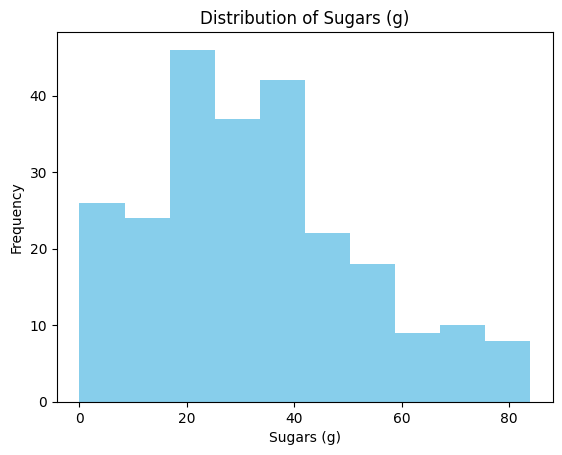

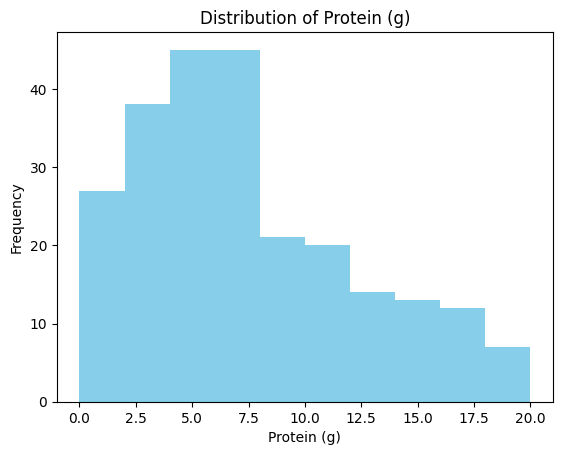

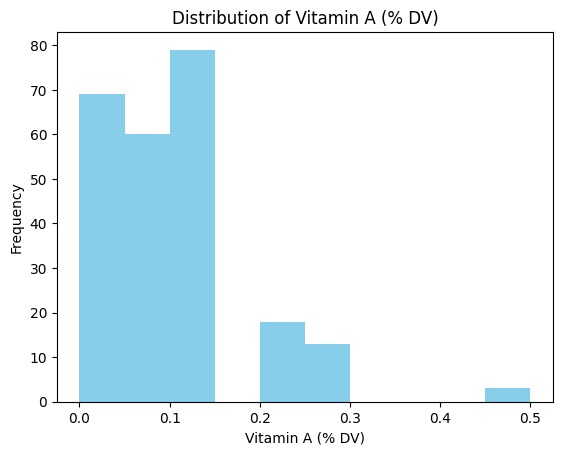

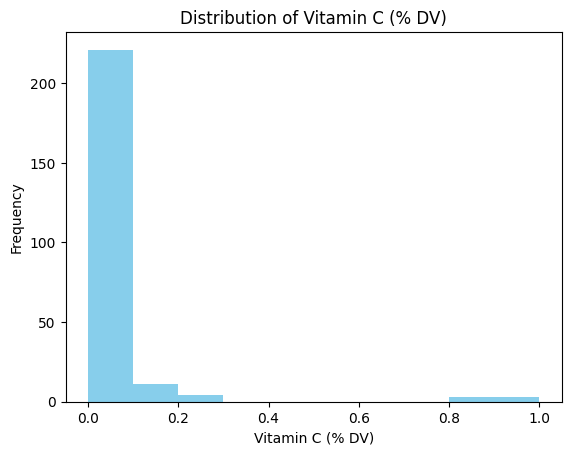

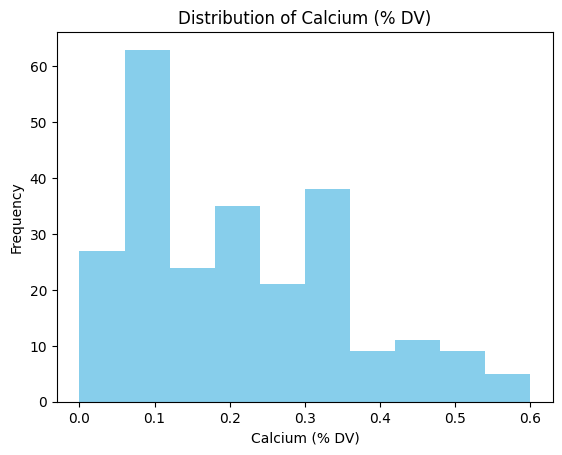

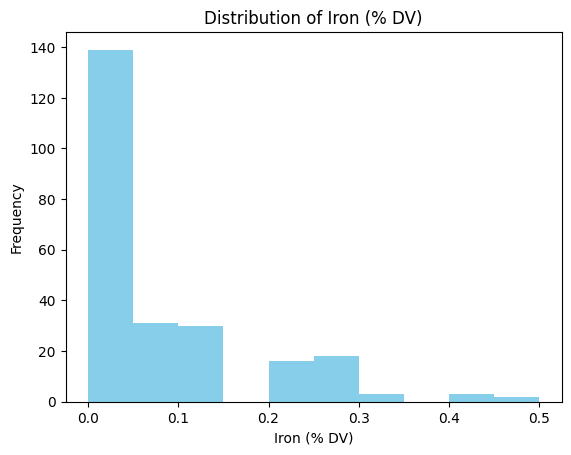

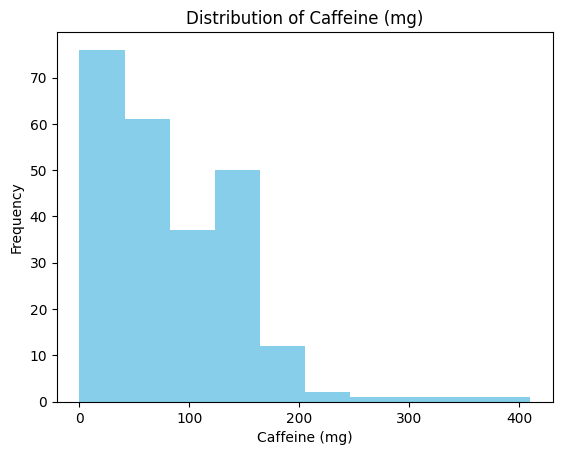

In [14]:
# Plot histogram

# Iterate over the columns
for column in df.columns:
    # Check if the column is of type int64 or float64
    if df[column].dtype == 'int64' or df[column].dtype == 'float64':
        # Plot histogram for the column
        plt.hist(df[column], bins=10, color='skyblue')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.title(f'Distribution of {column}')
        plt.show()


Las gráficas muestran la distribución de diferentes variables nutricionales en un conjunto de bebidas. Vamos a analizar cada una:

1. **Distribución de Calorías**: La mayoría de las bebidas tienen entre 100 y 200 calorías, con una distribución relativamente simétrica. Hay pocas bebidas con muy bajas o muy altas calorías, indicando una preferencia o disponibilidad mayor de bebidas en este rango calórico medio.

2. **Distribución de Grasas Totales**: La gráfica muestra una clara inclinación hacia bebidas con bajo contenido de grasa, con una mayoría significativa que tiene menos de 2 gramos de grasa total. Esto puede reflejar una tendencia de productos más saludables o la naturaleza de las bebidas, que generalmente contienen menos grasa que los alimentos sólidos.

3. **Distribución de Cafeína**: La distribución muestra dos picos principales, uno cerca de 0 mg y otro alrededor de 100 mg de cafeína. Esto sugiere que hay dos categorías distintas de bebidas en el conjunto de datos: las que no contienen cafeína y las que contienen un nivel que podría considerarse moderado.

4. **Distribución de Grasas Trans**: La mayoría de las bebidas tienen 0 gramos de grasa trans, lo que está en línea con las directrices de salud que recomiendan evitar este tipo de grasa.

5. **Distribución de Grasas Saturadas**: Similar a las grasas trans, hay una gran cantidad de bebidas sin grasa saturada. Aquellas que contienen grasa saturada tienen muy poca cantidad, lo que también podría reflejar una preferencia por opciones más saludables o un sesgo en el conjunto de datos hacia bebidas que no son ricas en grasas.

6. **Distribución de Sodio**: La mayoría de las bebidas tienen un contenido muy bajo de sodio, con una gran concentración en el rango más bajo de la gráfica. Un alto consumo de sodio está asociado con riesgos de salud, por lo que es positivo ver que las bebidas del conjunto de datos no aportan mucho sodio.

7. **Distribución de Carbohidratos Totales**: La distribución es bastante uniforme con varios picos, lo que indica que hay una variedad de bebidas con diferentes cantidades de carbohidratos totales. Esto podría reflejar la diversidad de bebidas en el mercado, desde aquellas muy dulces hasta opciones más ligeras.

8. **Distribución de Colesterol**: La mayoría de las bebidas tienen un bajo contenido de colesterol, con una concentración de frecuencias cerca de 0 mg. Es interesante que haya un pico cerca de los 20 mg, lo que podría indicar un grupo específico de bebidas que contienen colesterol.
Vamos a analizar las nuevas gráficas y asociar los hallazgos con los del análisis anterior:

9. **Distribución de Fibra Dietética (g)**: La mayoría de las bebidas tienen un contenido muy bajo o nulo de fibra dietética. Esto es consistente con la naturaleza de las bebidas, que rara vez son una fuente significativa de fibra.

10. **Distribución de Azúcares (g)**: Observamos una variedad en el contenido de azúcares, con picos múltiples en la distribución. Esto puede indicar la presencia de diferentes tipos de bebidas, algunas de las cuales son bajas en azúcares, mientras que otras son muy dulces.

11. **Distribución de Proteínas (g)**: La mayoría de las bebidas tienen bajos niveles de proteínas, lo cual es esperable ya que las bebidas típicamente no son una fuente primaria de proteínas. Sin embargo, hay una gama que indica que algunas bebidas pueden ser fortificadas con proteínas o son naturalmente más ricas en este macronutriente.

12. **Distribución de Vitamina A (% DV)**: Hay un pico en el 0%, lo que sugiere que muchas bebidas no contienen vitamina A.

13. **Distribución de Vitamina C (% DV)**: Hay un pico en el 0%, lo que sugiere que muchas bebidas no contienen vitamina C. Algunas bebidas ofrecen una cantidad significativa de vitamina C.

14. **Distribución de Calcio (% DV)**: La distribución muestra varios picos, lo que sugiere que hay una variedad de contenidos de calcio en las bebidas, algunas de las cuales podrían ser fortificadas con calcio para mejorar su perfil nutricional.

15. **Distribución de Hierro (% DV)**: Similar a la vitamina A, la mayoría de las bebidas no aportan hierro significativamente, pero hay algunas que proporcionan hasta un 20% del valor diario recomendado, lo que puede reflejar bebidas fortificadas o ciertos tipos de jugos naturales.

16. **Distribución de Cafeína (mg)**: Como se mencionó en el análisis anterior, hay dos grupos claramente definidos: bebidas sin cafeína y bebidas con un contenido moderado de cafeína.

Vemos que las bebidas tienden a ofrecer más variedad en términos de contenido de azúcares y cafeína, mientras que la mayoría proporciona poco en términos de fibra, proteínas, vitaminas y minerales como hierro y calcio.

Estos hallazgos pueden sugerir oportunidades para las empresas de bebidas de desarrollar productos que satisfagan necesidades nutricionales específicas, como bebidas altas en proteínas o en minerales, mientras que también destacan la importancia de ofrecer opciones bajas en azúcar para aquellos que buscan bebidas más saludables.

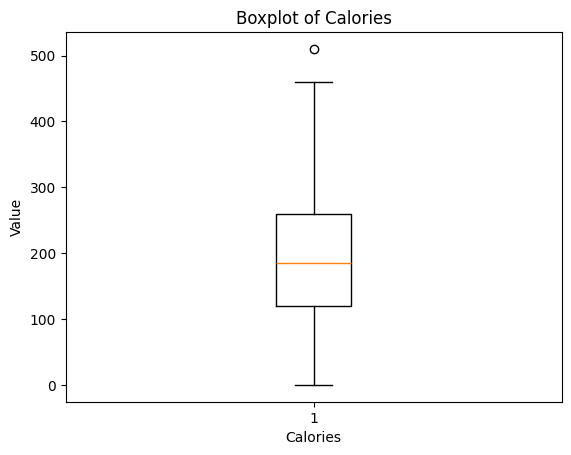

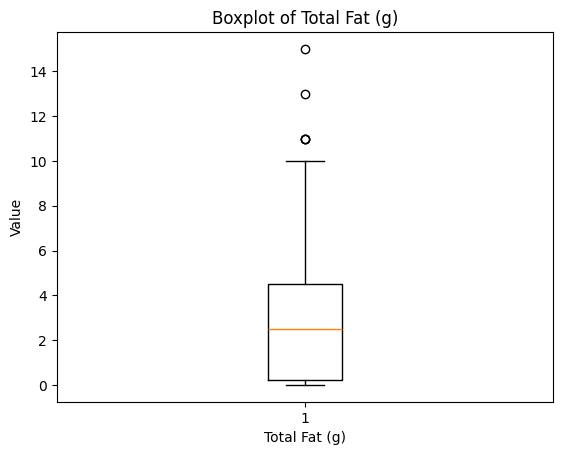

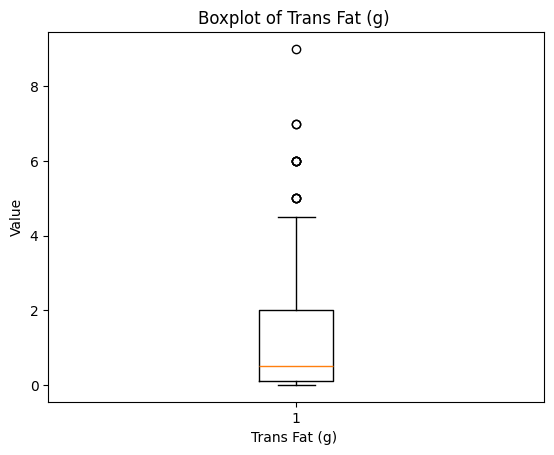

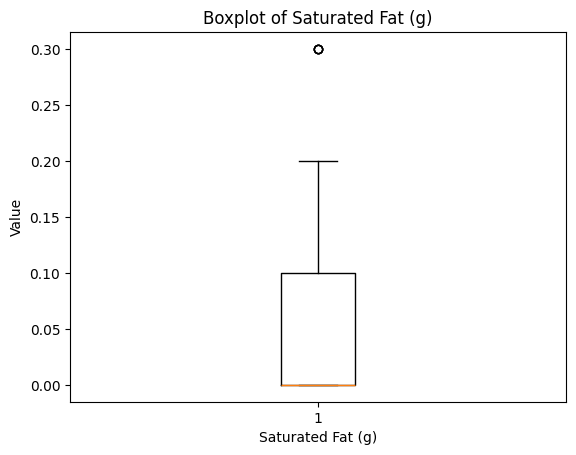

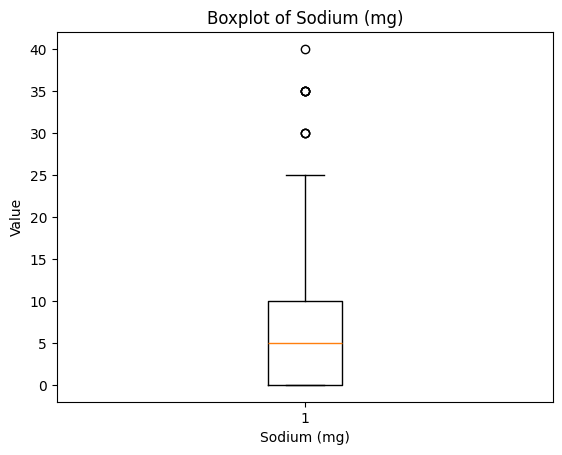

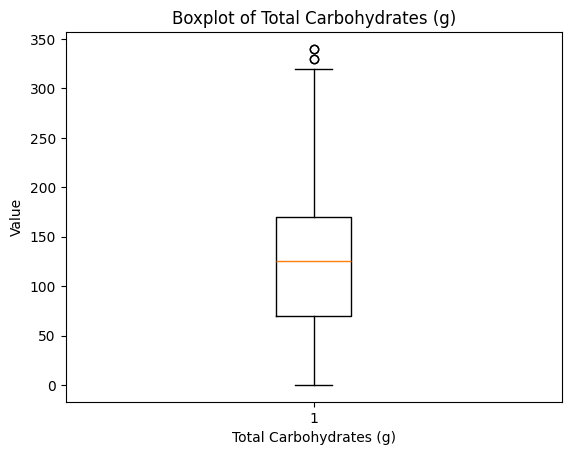

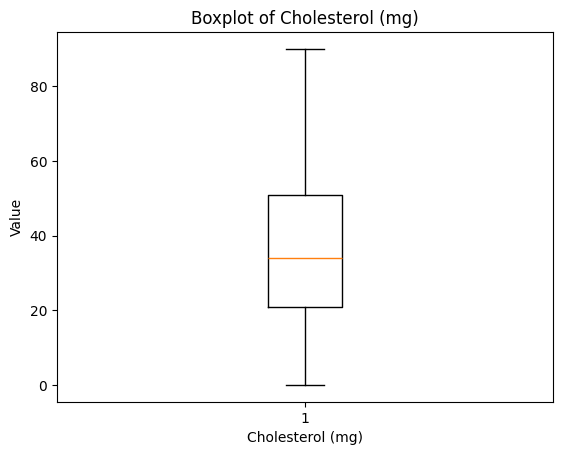

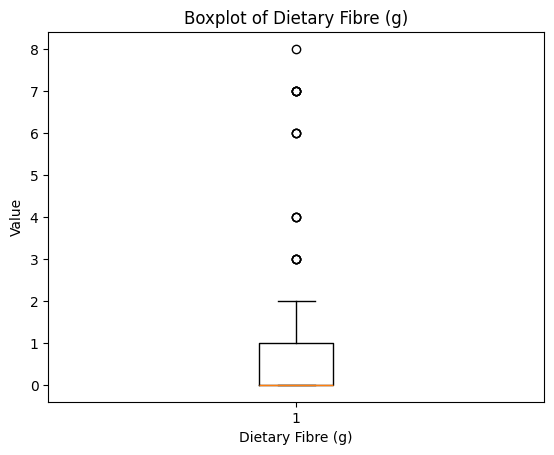

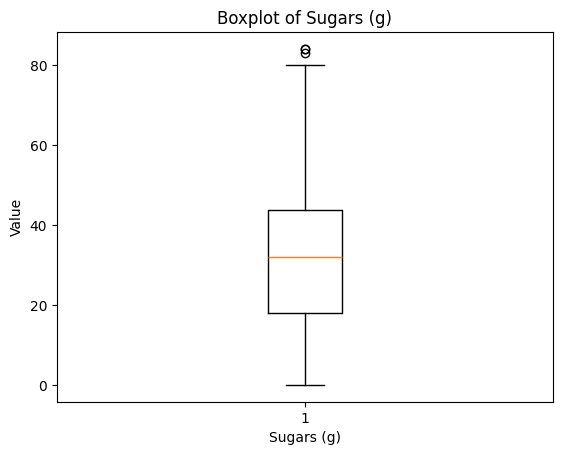

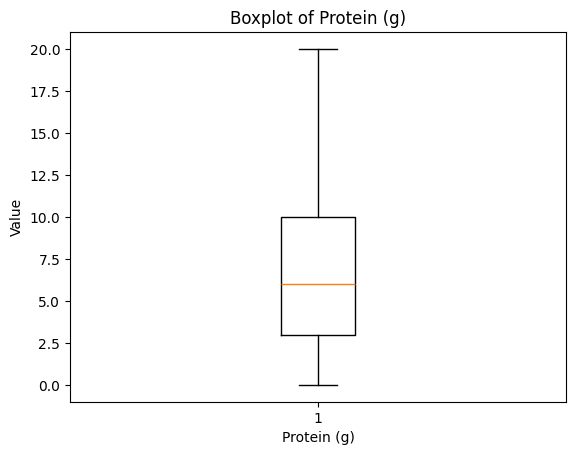

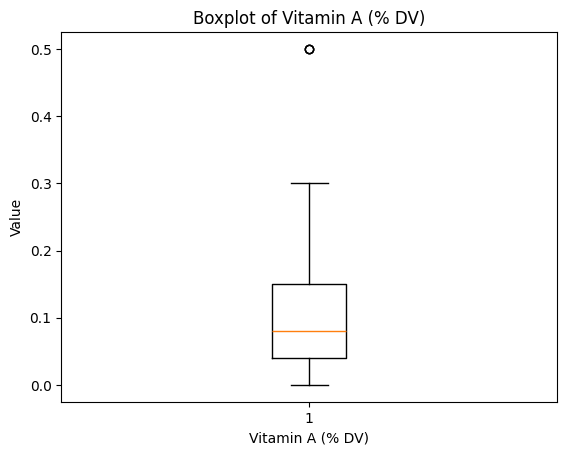

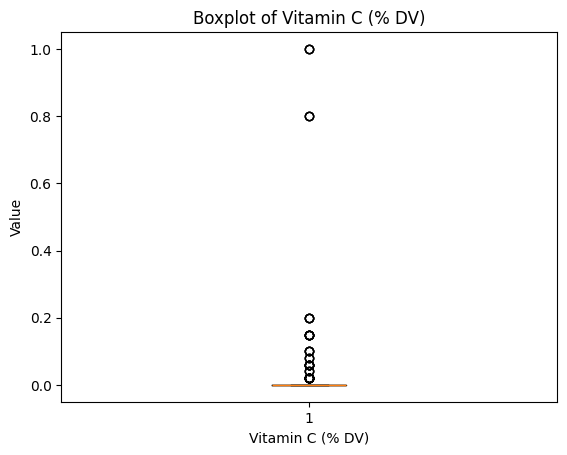

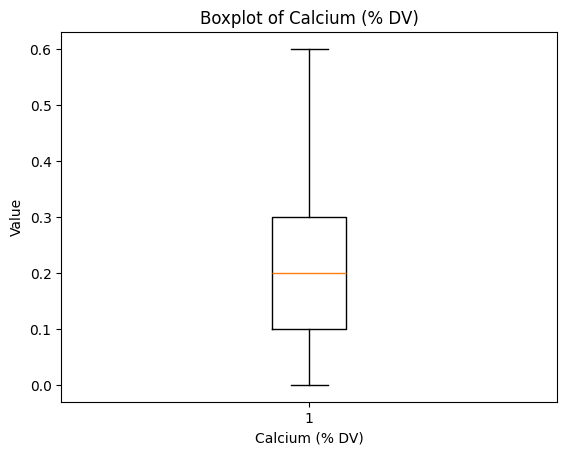

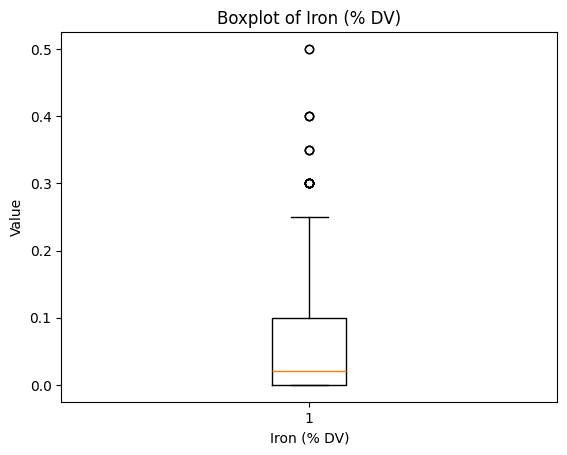

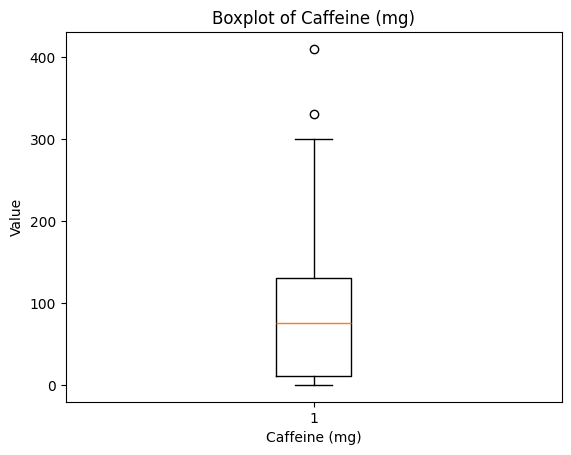

In [15]:
# Iterate over the columns
for column in df.columns:
    # Check if the column is of type int64 or float64
    if df[column].dtype == 'int64' or df[column].dtype == 'float64':
        # Create a boxplot for the column
        plt.boxplot(df[column])
        plt.xlabel(column)
        plt.ylabel('Value')
        plt.title(f'Boxplot of {column}')
        plt.show()


Los boxplots proporcionan una excelente visualización de la distribución de los valores nutricionales de las bebidas, mostrando la mediana, los cuartiles y los valores atípicos. Analicemos cada uno:

1. **Boxplot de Calorías**: La mediana está por encima de las 200 calorías, y hay varios valores atípicos que indican bebidas con un alto contenido calórico. La mayoría de las bebidas se sitúan en un rango moderado de calorías, pero las que se desvían mucho del promedio podrían ser de especial interés para los consumidores que buscan opciones bajas en calorías o para aquellos que buscan un aumento energético.

2. **Boxplot de Grasas Totales (g)**: Aunque la mediana es baja, cerca de 2 gramos, hay valores atípicos que sugieren la existencia de algunas bebidas con un contenido de grasa significativamente más alto. Estos valores atípicos podrían influir en el promedio de grasa total que se identificó en el análisis de correlación.

3. **Boxplot de Grasas Trans (g)**: La mayoría de las bebidas tienen un contenido bajo de grasas trans, reflejado en una mediana cercana a cero, pero hay valores atípicos que muestran que algunas bebidas tienen cantidades mucho más altas. Esto podría ser un área de preocupación desde el punto de vista de la salud.

4. **Boxplot de Grasas Saturadas (g)**: Similar a las grasas trans, las grasas saturadas son bajas en la mayoría de las bebidas, con algunos valores atípicos. Nuevamente, las bebidas con mayor contenido de grasas saturadas pueden ser un foco para aquellos que las están evitando por razones de salud.

5. **Boxplot de Sodio (mg)**: El contenido de sodio es generalmente bajo, con la mediana en el extremo inferior del rango, pero algunos valores atípicos tienen un contenido mucho mayor. Estos podrían ser de interés para personas que están controlando su ingesta de sodio.

6. **Boxplot de Carbohidratos Totales (g)**: La mediana indica una cantidad moderada de carbohidratos, con un rango intercuartílico más amplio y algunos valores atípicos altos. Esto concuerda con la correlación observada entre los carbohidratos y los azúcares, y sugiere una variedad en el contenido de carbohidratos entre las bebidas.

7. **Boxplot de Colesterol (mg)**: El colesterol varía menos que otros nutrientes, con una mediana relativamente baja y algunos valores atípicos altos. Esto sugiere que mientras la mayoría de las bebidas son bajas en colesterol, hay excepciones notables.

8. **Boxplot de Fibra Dietética (g)**: La fibra es prácticamente inexistente en la mayoría de las bebidas, con unos pocos valores atípicos que indican la presencia de fibra. Estos podrían ser productos específicos que están fortificados con fibra o basados en ingredientes que naturalmente contienen fibra.

9. **Boxplot de Azúcares (g)**: Hay una dispersión considerable en el contenido de azúcar, con una mediana relativamente alta y varios valores atípicos, lo que indica que algunas bebidas tienen un contenido muy alto de azúcar.

10. **Boxplot de Proteínas (g)**: Las proteínas tienden a ser bajas en la mayoría de las bebidas, con la mediana cerca de la parte inferior y algunos valores atípicos que sugieren la presencia de bebidas proteicas o fortificadas.
Estos boxplots muestran la distribución del porcentaje del valor diario (% DV) de Vitaminas A y C, Calcio, Hierro y la cantidad de cafeína (mg) en las bebidas. Veamos cada uno:

11. **Vitamina A (% DV)**: La mediana está cerca del 10% del valor diario, lo que indica que la mitad de las bebidas proporcionan este nivel o menos de Vitamina A. Los valores atípicos sugieren que hay algunas bebidas con un contenido mucho más alto, posiblemente jugos enriquecidos o bebidas con ingredientes ricos en Vitamina A.

12. **Vitamina C (% DV)**: La distribución es peculiar porque muchos valores se agrupan en el extremo inferior, indicando que muchas bebidas tienen un bajo % DV de Vitamina C. Sin embargo, hay una cantidad significativa de valores atípicos, algunos alcanzando el 100% DV, lo que sugiere que algunas bebidas están fortificadas con Vitamina C o son ricas en esta vitamina naturalmente, como los jugos de frutas cítricas.

13. **Calcio (% DV)**: La distribución del calcio muestra que hay bebidas con un % DV de calcio que varía, con una mediana más alta que la de la Vitamina A. Esto puede ser el resultado de la fortificación de algunas bebidas o la inclusión de ingredientes naturalmente altos en calcio.

14. **Hierro (% DV)**: Similar a la Vitamina A, la mediana está en el extremo más bajo, pero los valores atípicos indican la presencia de algunas bebidas con un mayor contenido de hierro. Estos podrían ser productos específicos diseñados para aumentar la ingesta de hierro.

15. **Cafeína (mg)**: La cafeína tiene una mediana alrededor de 100 mg, lo cual es un nivel moderado para las bebidas. Hay valores atípicos significativos que indican algunas bebidas con un contenido de cafeína mucho más alto, probablemente cafés o bebidas energéticas.

Cada uno de estos boxplot puede ayudar a identificar las bebidas que son altas o bajas en estos nutrientes y estimulantes. Esto es valioso tanto para consumidores que buscan gestionar su ingesta de estos componentes como para empresas que podrían estar interesadas en desarrollar productos que satisfagan necesidades nutricionales específicas. Por ejemplo, una bebida baja en calorías y alta en vitaminas y minerales puede ser atractiva para el mercado saludable, mientras que una con alta cafeína podría ser más adecuada para quienes buscan un impulso energético.



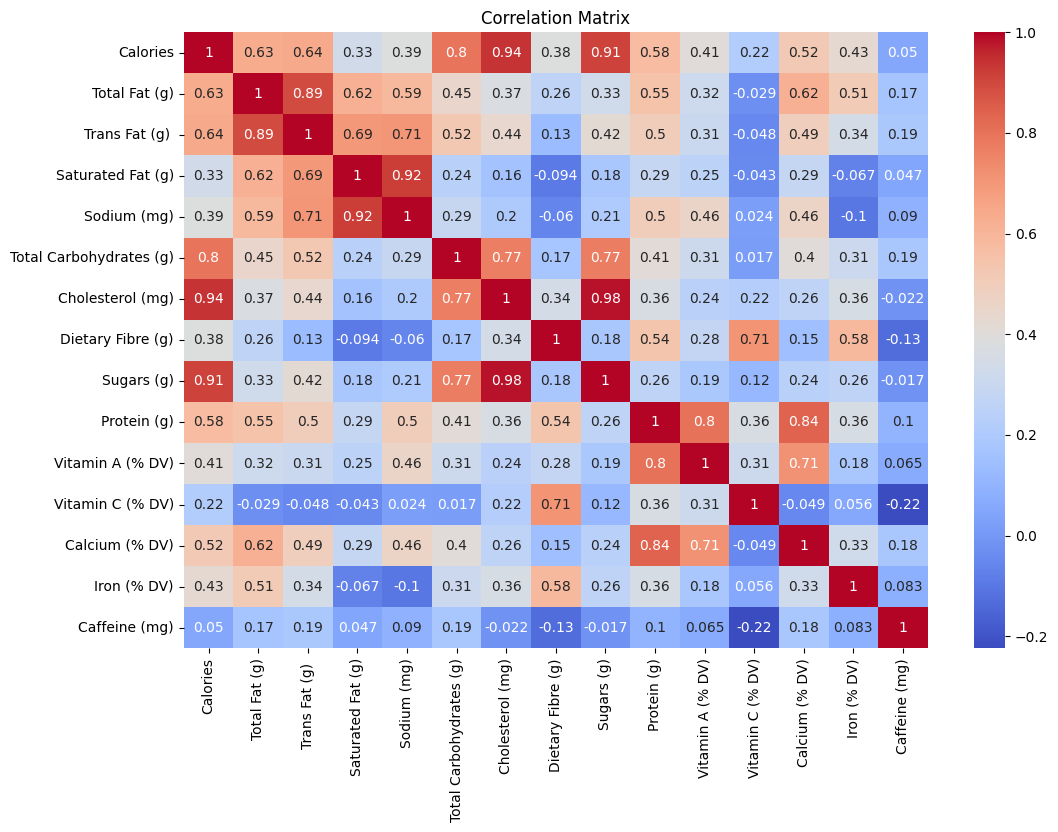

In [16]:
# Generate correlation matrix for numerical columns
index_numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
correlation_matrix = df[index_numeric_columns].corr()

# Visualize correlation matrix using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


Esta matriz de correlación muestra las relaciones entre diferentes variables nutricionales de las bebidas. Los valores de correlación oscilan entre -1 y 1, donde:

- Un valor de 1 indica una correlación positiva perfecta: si una variable aumenta, la otra también lo hace en proporción directa.
- Un valor de -1 indica una correlación negativa perfecta: si una variable aumenta, la otra disminuye en proporción directa.
- Un valor cercano a 0 indica que no hay una correlación lineal aparente entre las variables.

Analizando la matriz, podemos notar lo siguiente:

- **Calorías y Grasas Totales (Total Fat)**: Una correlación muy alta (0.63), lo que sugiere que las bebidas con más grasas suelen tener más calorías.
- **Grasas Totales y Grasas Trans (Trans Fat)**: Una correlación muy alta (0.89), lo que indica que las bebidas con altos contenidos de grasa total también tienden a tener altos contenidos de grasas trans.
- **Carbohidratos Totales y Azúcares (Sugars)**: Existe una correlación casi perfecta (0.91), lo que es esperable ya que los azúcares son un tipo de carbohidrato.
- **Calorías y Colesterol**: Una correlación negativa alta (-0.94), lo cual es interesante y podría requerir una investigación más detallada ya que uno esperaría que alimentos con alto contenido calórico puedan tener más colesterol. Esta relación inversa puede ser el resultado de un factor no observado en el análisis, o podría ser un error en los datos.
- **Carbohidratos Totales y Fibra Dietética (Dietary Fibre)**: La correlación es relativamente baja (0.17), sugiriendo que los carbohidratos presentes en las bebidas no se componen principalmente de fibra dietética.
- **Vitaminas y Minerales**: Las correlaciones entre el contenido de vitaminas/minerales y otras variables nutricionales son generalmente bajas, lo que sugiere que el contenido de vitaminas y minerales no está fuertemente asociado con el contenido calórico o graso de las bebidas.
- **Cafeína (Caffeine)**: Las correlaciones de la cafeína con otras variables son generalmente muy bajas, lo que indica que el contenido de cafeína no está fuertemente ligado a la composición nutricional general de las bebidas.

Estos resultados pueden ser utilizados para identificar qué elementos nutricionales varían juntos en el contexto de la bebida. Por ejemplo, si un nutricionista quiere reducir la ingesta calórica de un paciente, puede mirar las bebidas con bajo contenido de grasas totales y azúcares. Del mismo modo, si se busca minimizar el consumo de grasas trans, también se debería considerar el contenido total de grasa.

Es importante recordar que la correlación no implica causalidad. Aunque dos variables puedan moverse juntas, eso no significa que una cause la otra; puede haber factores externos que afecten ambas o que una tercera variable sea la causante de los cambios en ambas. Además, siempre es necesario considerar el contexto en el que se consumen estas bebidas y cómo se integran en la dieta general de una persona.

Se analizarán los valores promedios de cada valor numérico

In [17]:
# Group data by Beverage category and calculate aggregate statistics
category_stats = df.groupby('Beverage_category').agg({
    'Calories': 'mean',
    'Total Fat (g)': 'mean',
    'Sodium (mg)': 'mean',
    'Total Carbohydrates (g)': 'mean',
    'Protein (g)': 'mean',
    'Caffeine (mg)': 'mean',
    'Vitamin C (% DV)': 'mean'

})

# Group data by Beverage and calculate aggregate statistics
beverage_stats = df.groupby('Beverage').agg({
    'Calories': 'mean',
    'Total Fat (g)': 'mean',
    'Sodium (mg)': 'mean',
    'Total Carbohydrates (g)': 'mean',
    'Protein (g)': 'mean',
    'Caffeine (mg)': 'mean',
    'Vitamin C (% DV)': 'mean'
})



# Group data by Beverage Prep and calculate aggregate statistics
beverage_prep_stats = df.groupby('Beverage_prep').agg({
    'Calories': 'mean',
    'Total Fat (g)': 'mean',
    'Sodium (mg)': 'mean',
    'Total Carbohydrates (g)': 'mean',
    'Protein (g)': 'mean',
    'Caffeine (mg)': 'mean',
    'Vitamin C (% DV)': 'mean'
})



In [18]:
# Display the aggregate statistics for each Beverage category
category_stats


Calories  Total Fat (g)  Sodium (mg)  \
Beverage_category                                                           
Classic Espresso Drinks            140.172414       3.127586     8.103448   
Coffee                               4.250000       0.100000     0.000000   
Frappuccino® Blended Coffee        276.944444       3.002778     4.444444   
Frappuccino® Blended Crème         233.076923       1.953846     4.230769   
Frappuccino® Light Blended Coffee  162.500000       1.258333     1.666667   
Shaken Iced Beverages              114.444444       0.472222     1.111111   
Signature Espresso Drinks          250.000000       5.275000     9.625000   
Smoothies                          282.222222       2.333333     6.111111   
Tazo® Tea Drinks                   177.307692       2.540385     7.211538   

                                   Total Carbohydrates (g)  Protein (g)  \
Beverage_category                                                         
Classic Espresso Drinks                         104.672414     8.686207   
Coffee                                            8.750000     0.700000   
Frappuccino® Blended Coffee                     230.277778     4.222222   
Frappuccino® Blended Crème                      188.846154     4.000000   
Frappuccino® Light Blended Coffee               217.500000     4.250000   
Shaken Iced Beverages                            18.277778     1.344444   
Signature Espresso Drinks                       138.250000     9.875000   
Smoothies                                       132.777778    17.111111   
Tazo® Tea Drinks                                 89.903846     6.807692   

                                   Caffeine (mg)  Vitamin C (% DV)  
Beverage_category                                                   
Classic Espresso Drinks               122.068966          0.002069  
Coffee                                293.750000          0.000000  
Frappuccino® Blended Coffee           101.805556          0.000000  
Frappuccino® Blended Crème              0.000000          0.046154  
Frappuccino® Light Blended Coffee      99.583333          0.000000  
Shaken Iced Beverages                  93.055556          0.025000  
Signature Espresso Drinks              73.875000          0.007500  
Smoothies                               5.000000          0.650000  
Tazo® Tea Drinks                       34.903846          0.029038

In [19]:
# Display the aggregate statistics for each Beverage
beverage_prep_stats

Calories  Total Fat (g)  Sodium (mg)  \
Beverage_prep                                                
2% Milk             218.000000       5.520000    19.600000   
Doppio               10.000000       0.000000     0.000000   
Grande               85.714286       0.028571     0.000000   
Grande Nonfat Milk  209.615385       1.134615     3.653846   
Short                37.000000       0.025000     0.000000   
Short Nonfat Milk    99.166667       0.658333     3.750000   
Solo                  5.000000       0.000000     0.000000   
Soymilk             207.272727       4.063636     0.454545   
Tall                 63.428571       0.014286     0.000000   
Tall Nonfat Milk    147.826087       0.813043     2.608696   
Venti               118.571429       0.028571     0.000000   
Venti Nonfat Milk   260.000000       1.322727     6.590909   
Whole Milk          283.750000       4.562500    11.562500   

                    Total Carbohydrates (g)  Protein (g)  Caffeine (mg)  \
Beverage_prep                                                             
2% Milk                          126.300000     9.620000      75.700000   
Doppio                             1.000000     1.000000     150.000000   
Grande                             7.142857     0.342857     102.857143   
Grande Nonfat Milk               161.730769     8.807692      82.884615   
Short                              5.000000     0.175000      62.500000   
Short Nonfat Milk                 69.166667     5.750000      51.666667   
Solo                               0.000000     0.400000      75.000000   
Soymilk                          129.242424     7.121212      77.575758   
Tall                               5.571429     0.257143     100.000000   
Tall Nonfat Milk                 123.913043     5.956522      57.826087   
Venti                              7.857143     0.357143     135.000000   
Venti Nonfat Milk                215.681818    10.318182     114.090909   
Whole Milk                       221.875000     4.187500      77.812500   

                    Vitamin C (% DV)  
Beverage_prep                         
2% Milk                     0.055600  
Doppio                      0.000000  
Grande                      0.021429  
Grande Nonfat Milk          0.083846  
Short                       0.000000  
Short Nonfat Milk           0.003333  
Solo                        0.000000  
Soymilk                     0.040909  
Tall                        0.014286  
Tall Nonfat Milk            0.007826  
Venti                       0.028571  
Venti Nonfat Milk           0.013636  
Whole Milk                  0.012500

Se visualiza el promedio de algunos valores nutricionales por tipo de bebida

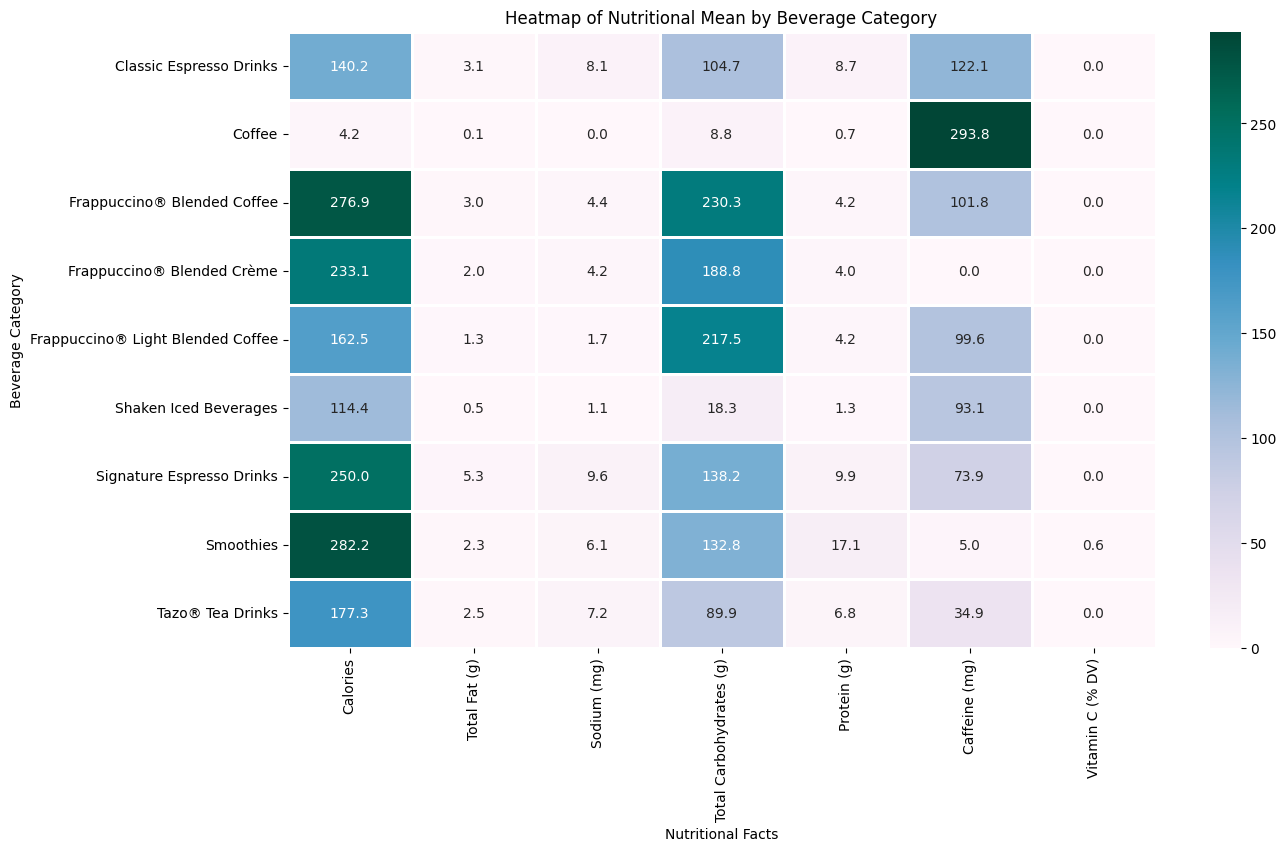

In [20]:
plt.figure(figsize=(14, 8))
sns.heatmap(category_stats, annot=True, cmap='PuBuGn', linewidths=1, fmt='.1f')
plt.title('Heatmap of Nutritional Mean by Beverage Category')
plt.xlabel('Nutritional Facts')
plt.ylabel('Beverage Category')

plt.show()

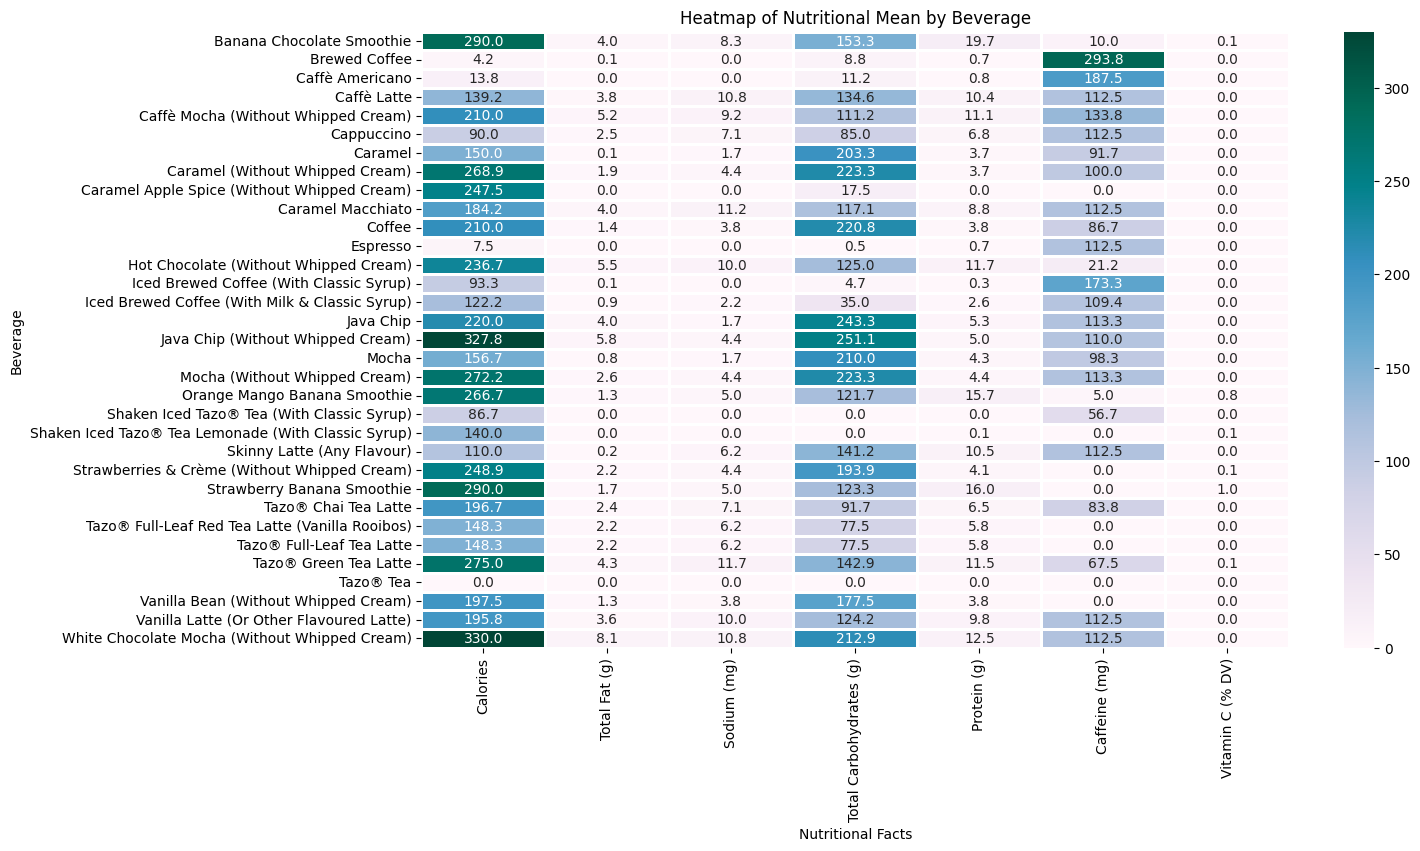

In [21]:
plt.figure(figsize=(14, 8))
sns.heatmap(beverage_stats, annot=True, cmap='PuBuGn', linewidths=1, fmt='.1f')
plt.title('Heatmap of Nutritional Mean by Beverage')
plt.xlabel('Nutritional Facts')
plt.ylabel('Beverage')

plt.show()

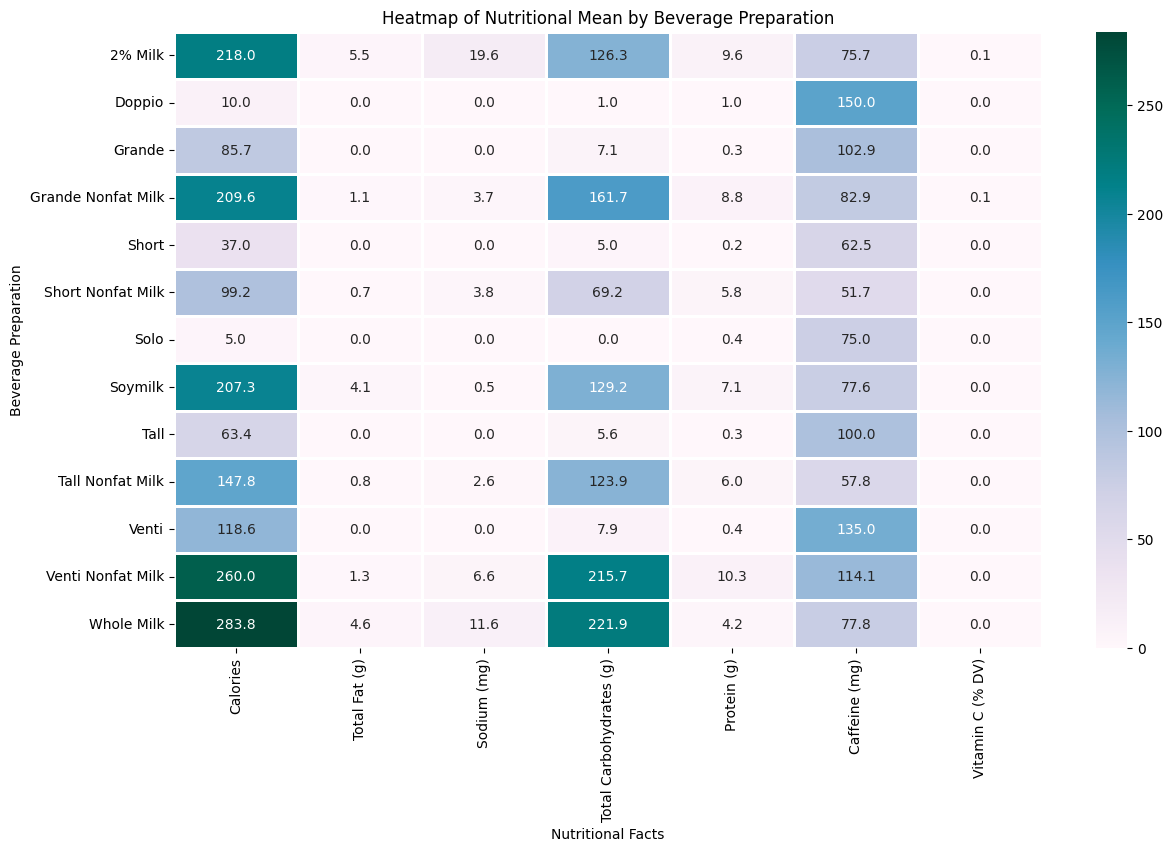

In [22]:
plt.figure(figsize=(14, 8))
sns.heatmap(beverage_prep_stats, annot=True, cmap='PuBuGn', linewidths=1, fmt='.1f')
plt.title('Heatmap of Nutritional Mean by Beverage Preparation')
plt.xlabel('Nutritional Facts')
plt.ylabel('Beverage Preparation')

plt.show()

## Analysis Avanzado

### 1.  ANOVA

Se lleva a cabo un análisis estadístico Anova para identificar si existen o no las diferencias significativas en la presencia de cada uno de los valores nutriticionales a través de las bebidas que ofrece Starbucks.

In [23]:
# Imports
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [24]:
# Visualize list of columns
df.columns.tolist()

['Beverage_category',
 'Beverage',
 'Beverage_prep',
 'Calories',
 'Total Fat (g)',
 'Trans Fat (g) ',
 'Saturated Fat (g)',
 'Sodium (mg)',
 'Total Carbohydrates (g)',
 'Cholesterol (mg)',
 'Dietary Fibre (g)',
 'Sugars (g)',
 'Protein (g)',
 'Vitamin A (% DV)',
 'Vitamin C (% DV)',
 'Calcium (% DV)',
 'Iron (% DV)',
 'Caffeine (mg)']

1. **F-valor (F-statistic):** Indica la variabilidad entre los grupos en comparación con la variabilidad dentro de los grupos. Un valor F más alto sugiere una diferencia significativa entre los medios de los grupos.

2. **Valor-P (PR(>F)):** Nos indica si el resultado de la prueba F es estadísticamente significativo. Un valor-P menor que 0.05 generalmente sugiere que hay diferencias significativas entre los medios de al menos dos grupos.

### Interpretación:

Para las **calorías (Calories)** y otras medidas como las **grasas totales (Total_Fat_g)**, **los azúcares (Sugars_g)**, etc., al cruzarlos con las categorías de bebidas **(Beverage_category)**, las pruebas ANOVA muestran valores F altos y valores P muy bajos, lo que indica diferencias significativas en estas medidas nutricionales entre las diferentes categorías de bebidas.

Por otro lado, cuando observamos las **grasas saturadas (Saturated_Fat_g)** en relación con las categorías de bebida, el valor P es más alto (0.153967 para **Beverage_category**), lo que sugiere que no hay diferencias significativas en las grasas saturadas entre las categorías de bebidas.

Al realizar ANOVA con los tipos de preparación de las bebidas **(Beverage_prep)**, encontramos resultados similares, con diferencias significativas en la mayoría de las medidas nutricionales, excepto en ciertos casos como la **Vitamina C (Vitamin_C_Pct)** donde el valor P es alto (0.868951), indicando que no hay diferencias significativas en el contenido de Vitamina C entre los diferentes tipos de preparación.

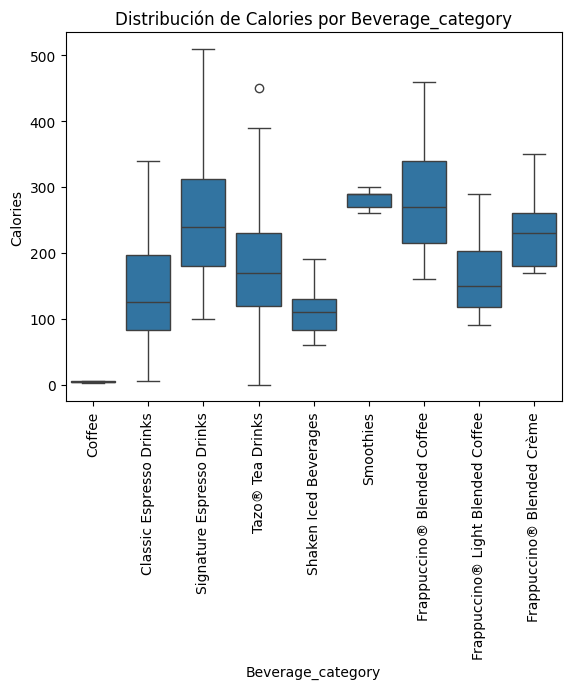

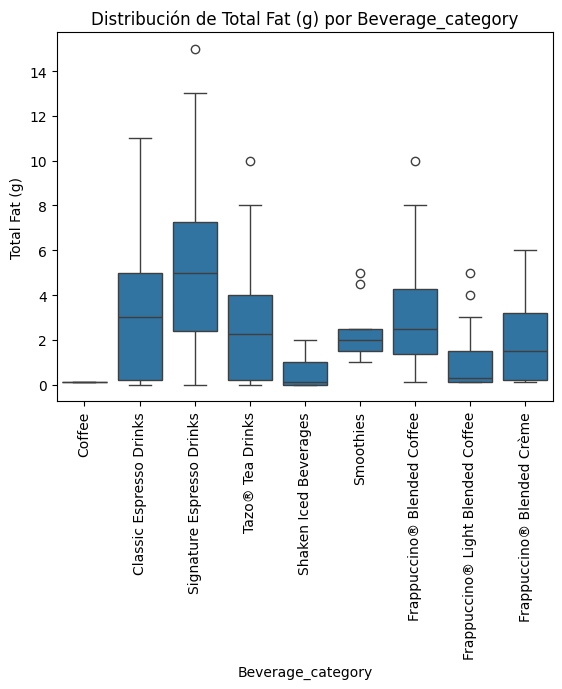

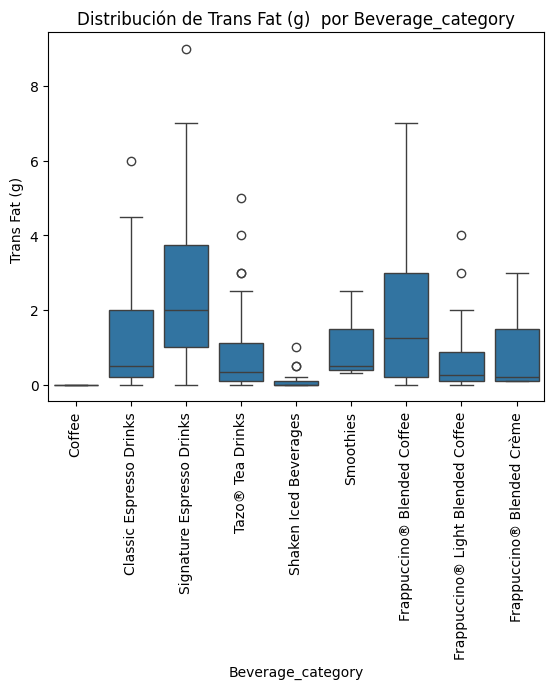

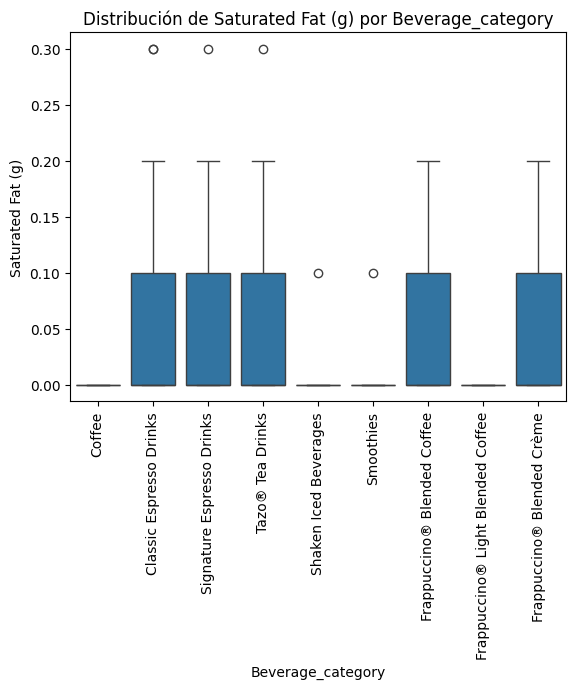

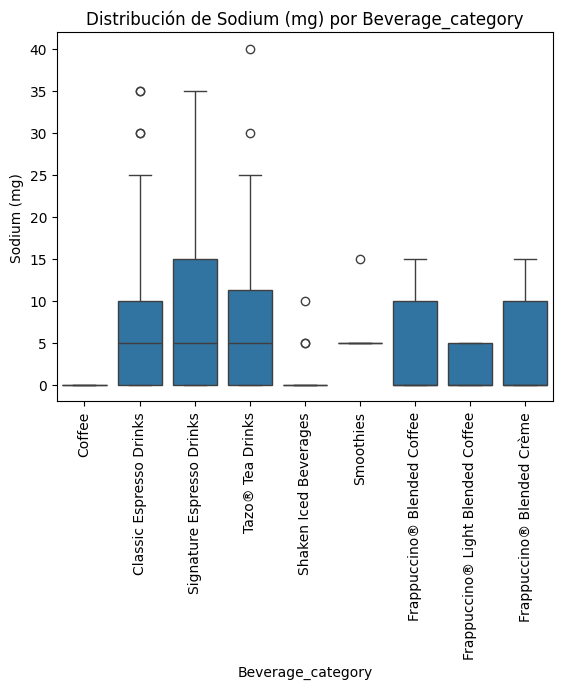

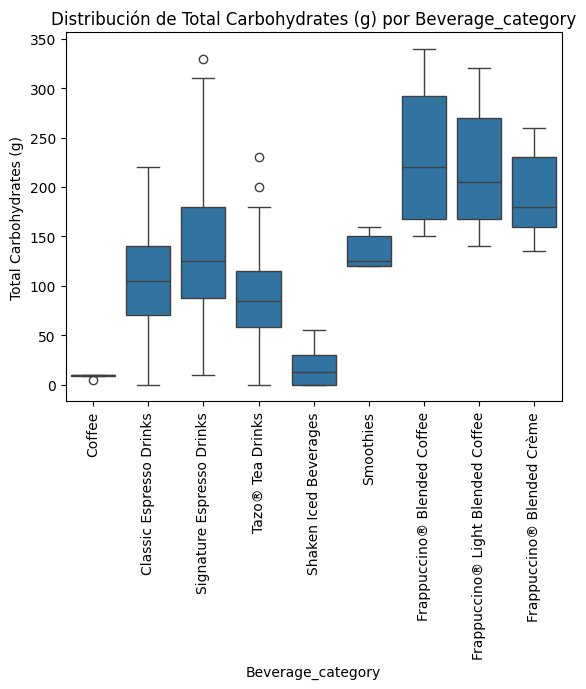

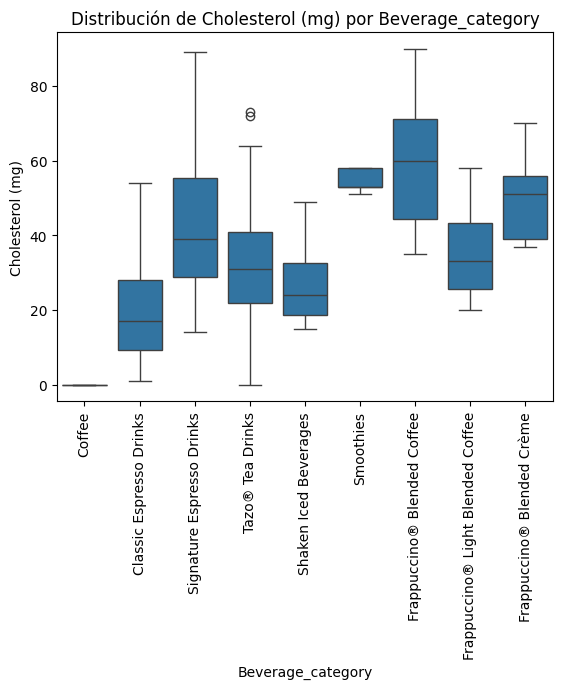

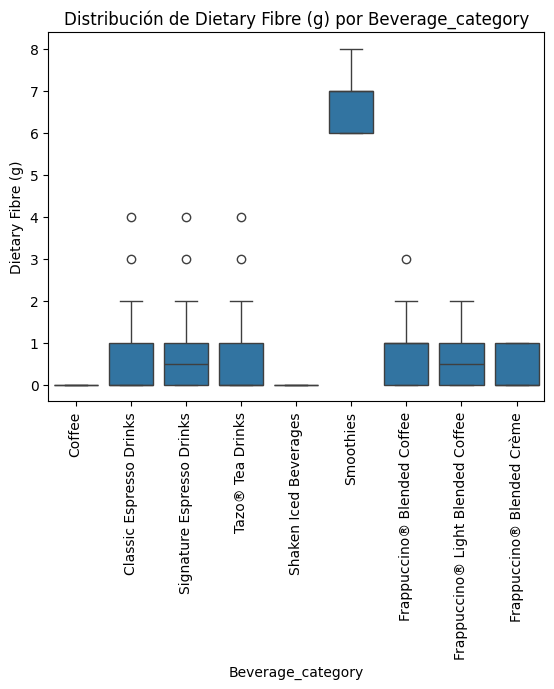

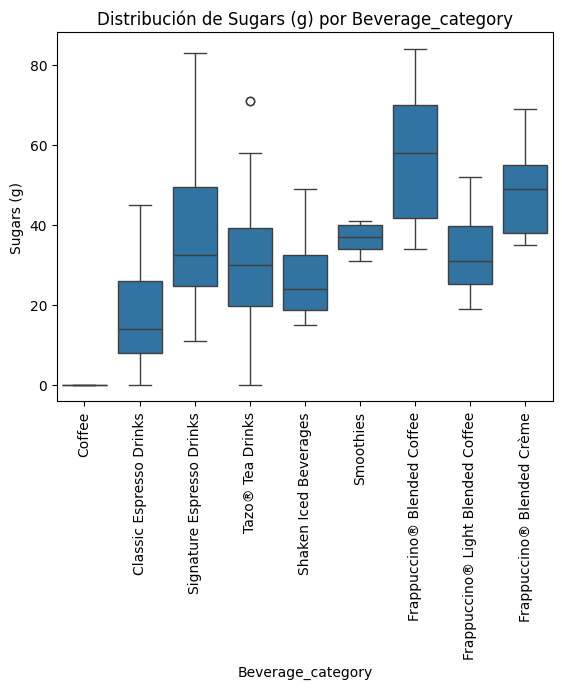

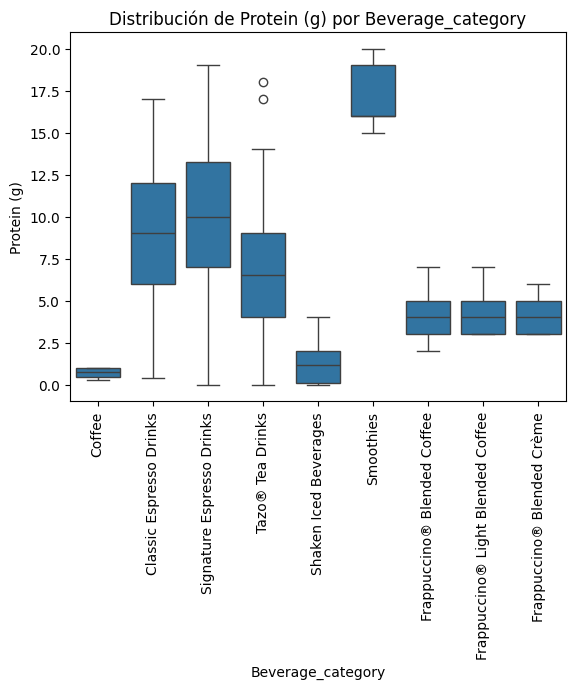

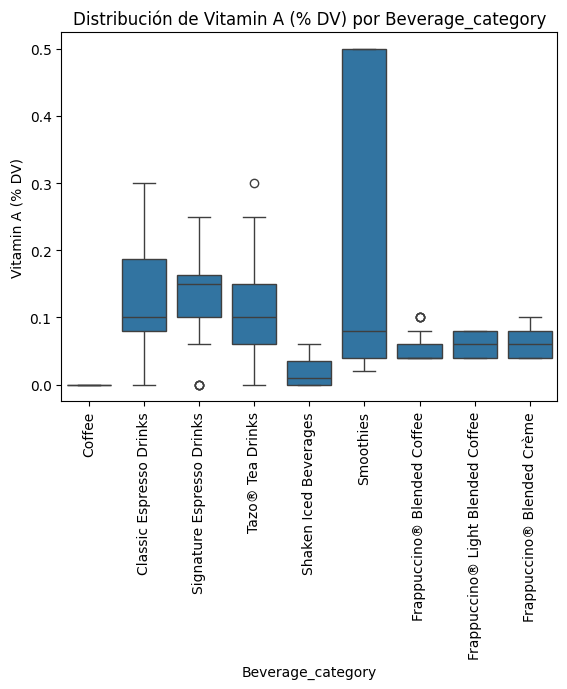

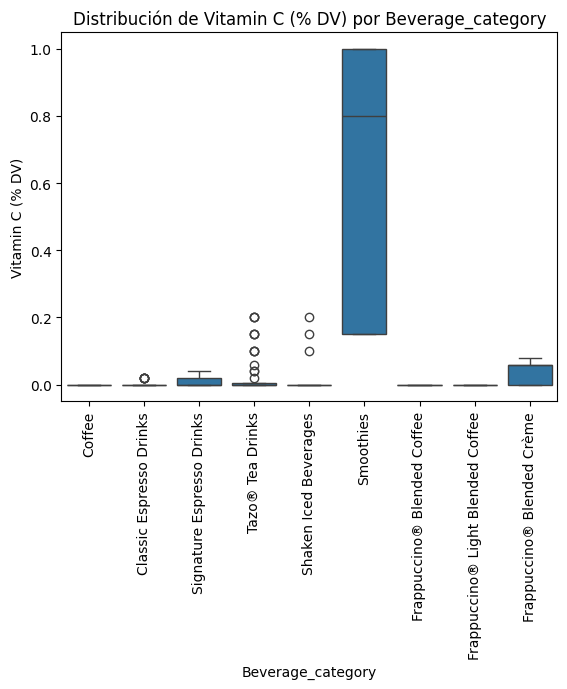

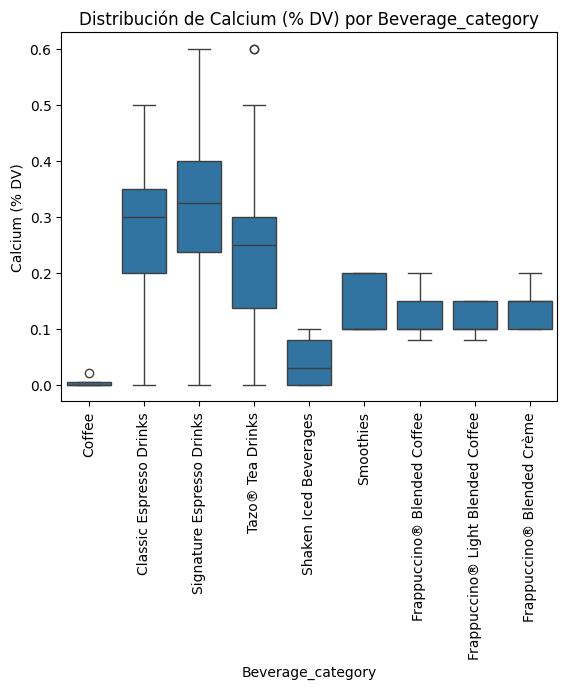

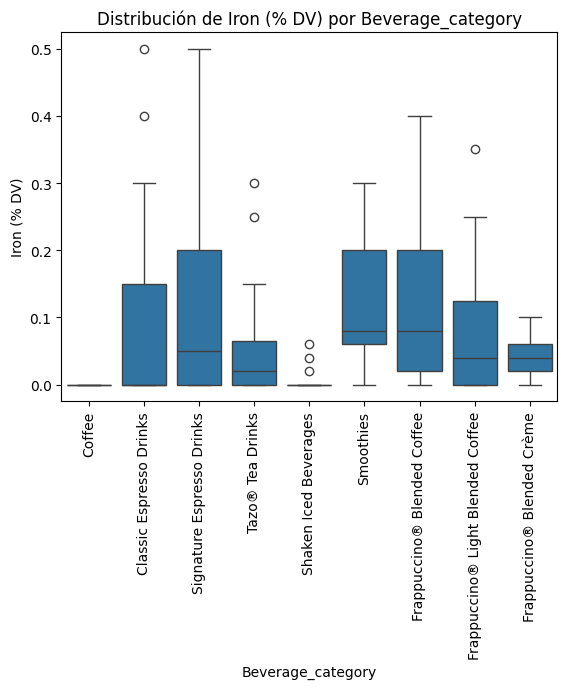

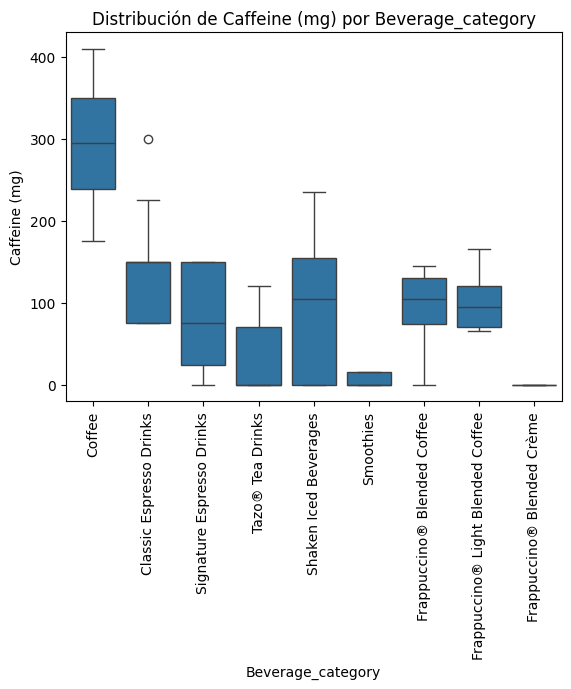

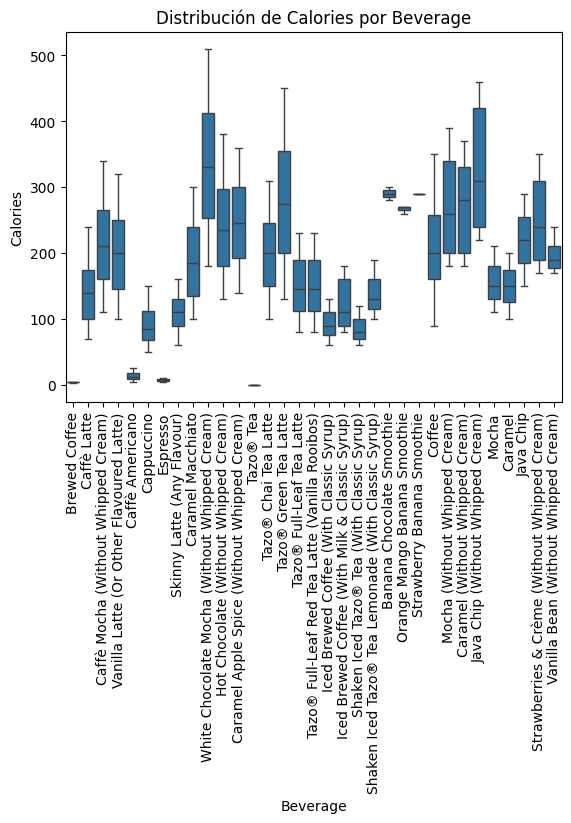

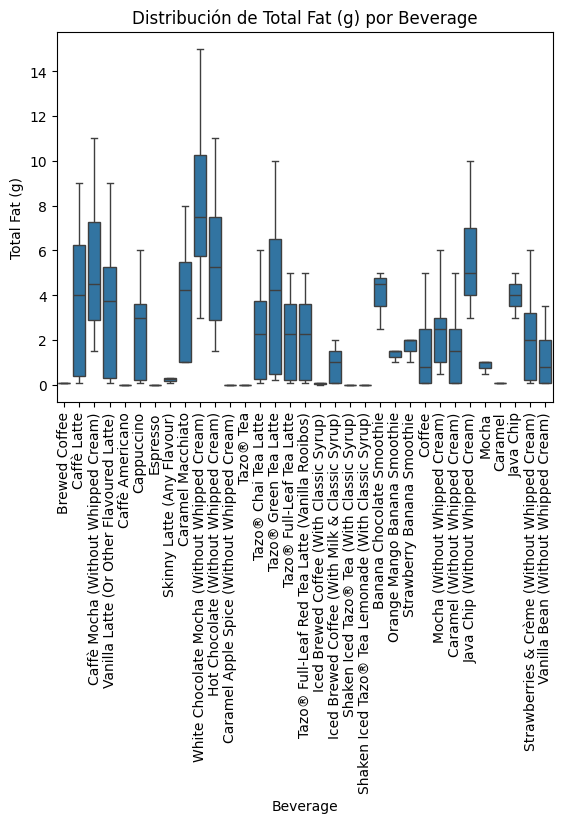

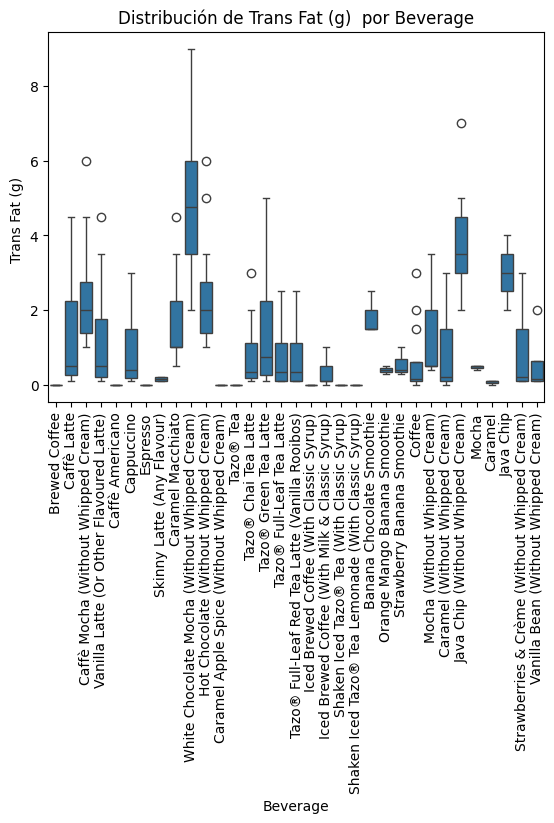

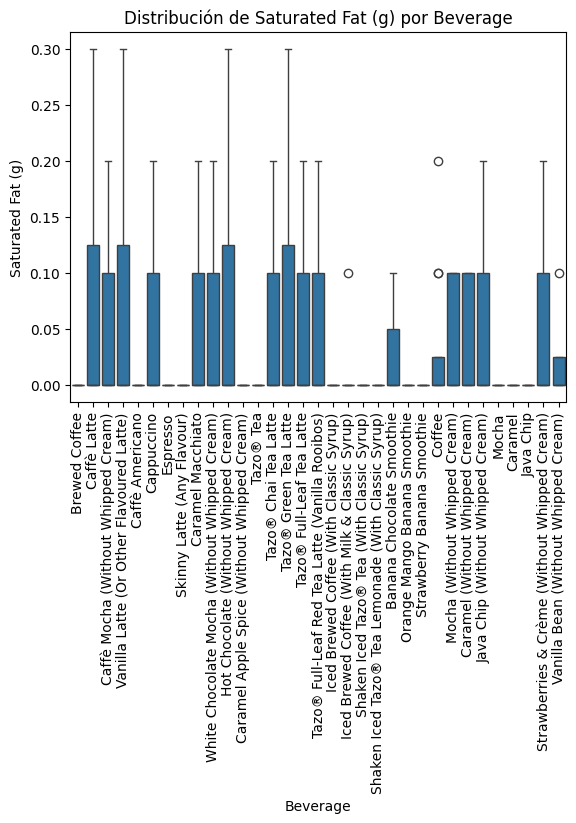

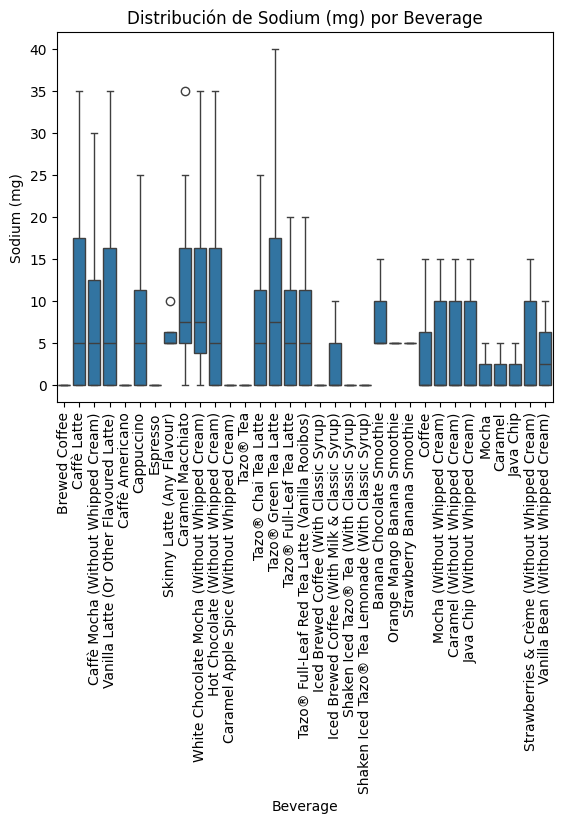

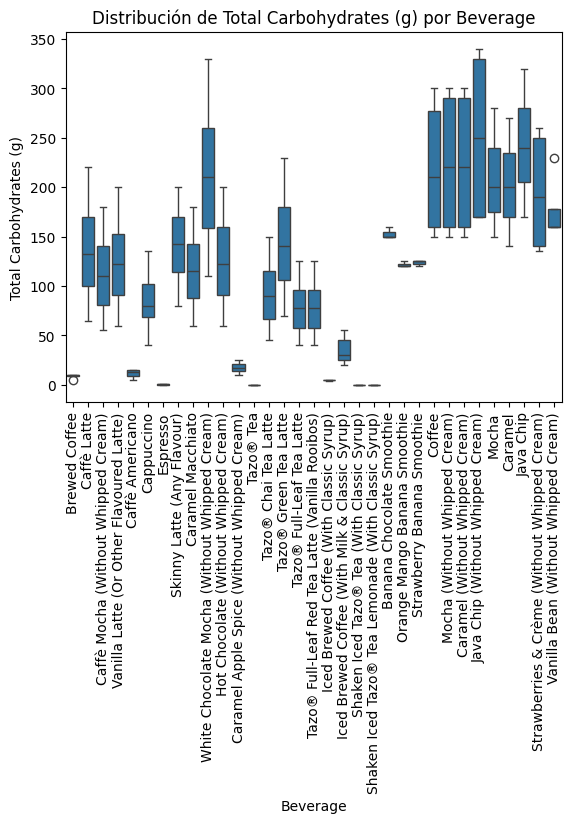

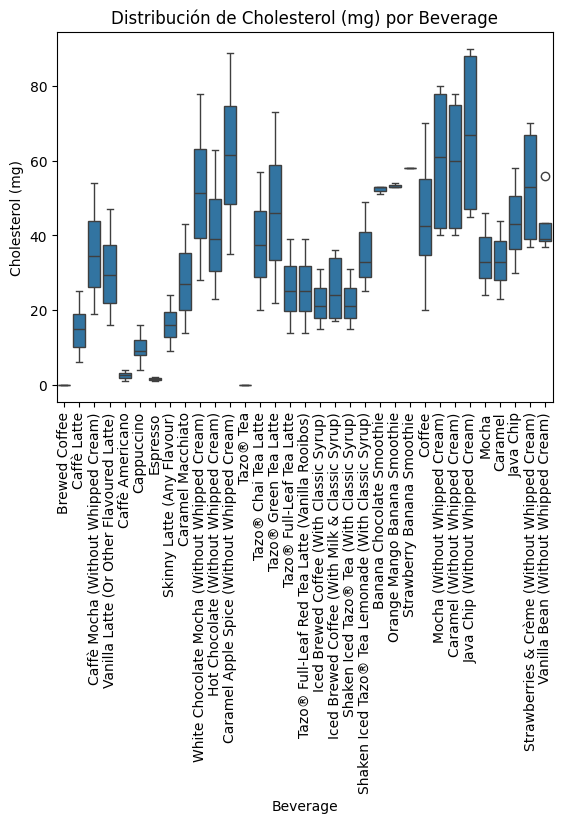

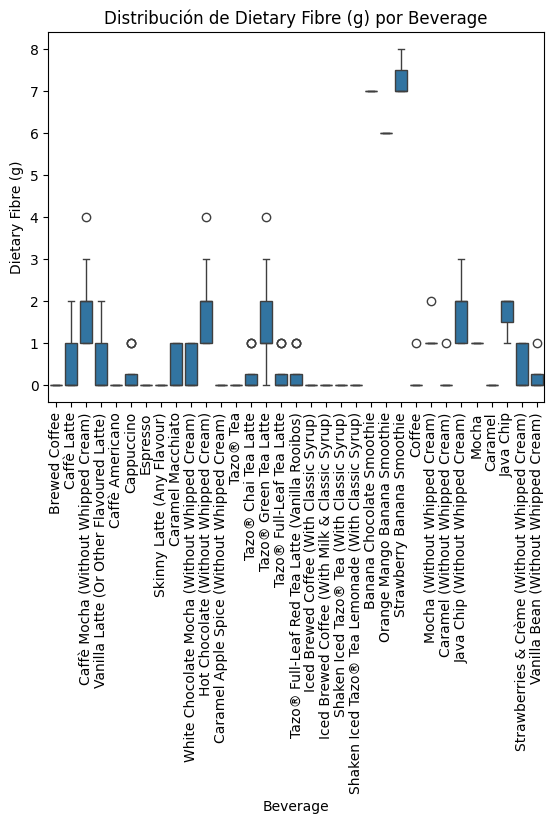

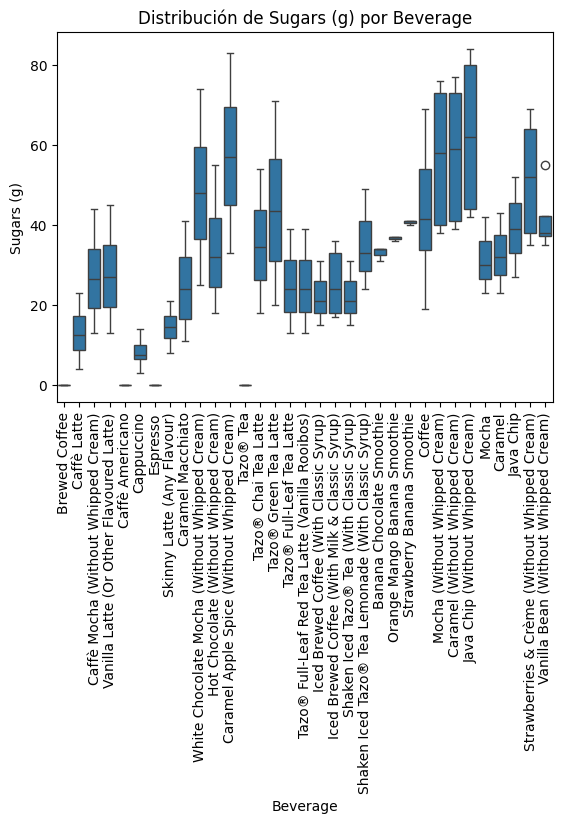

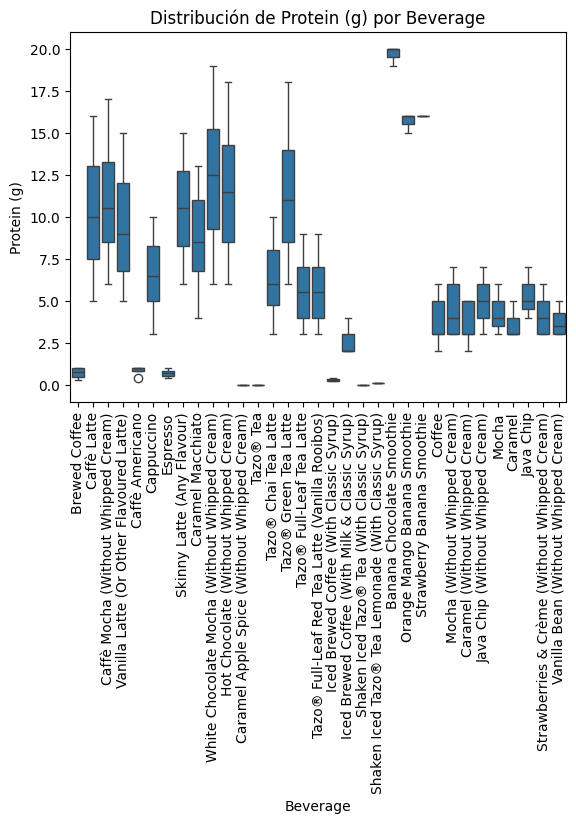

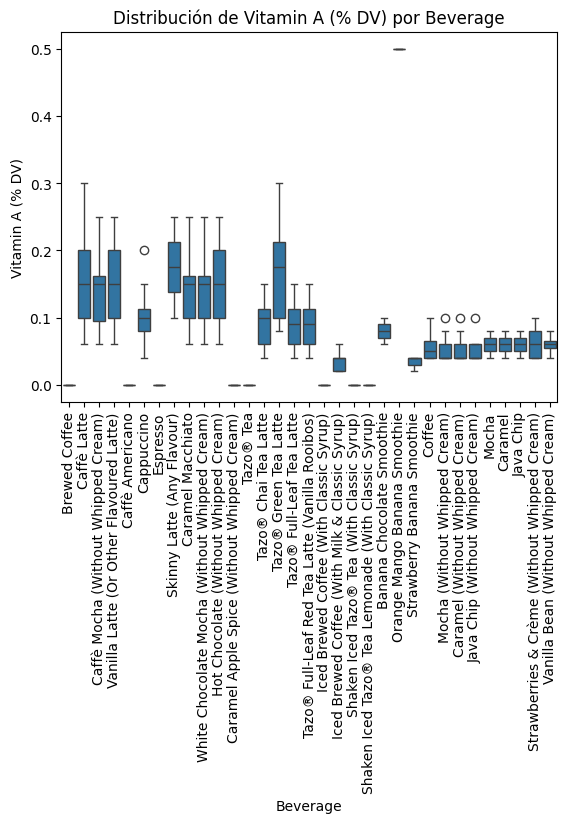

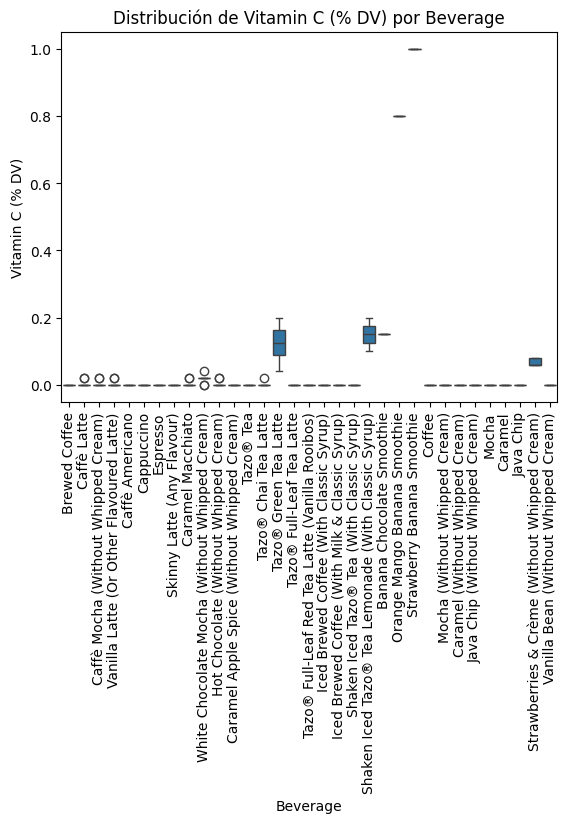

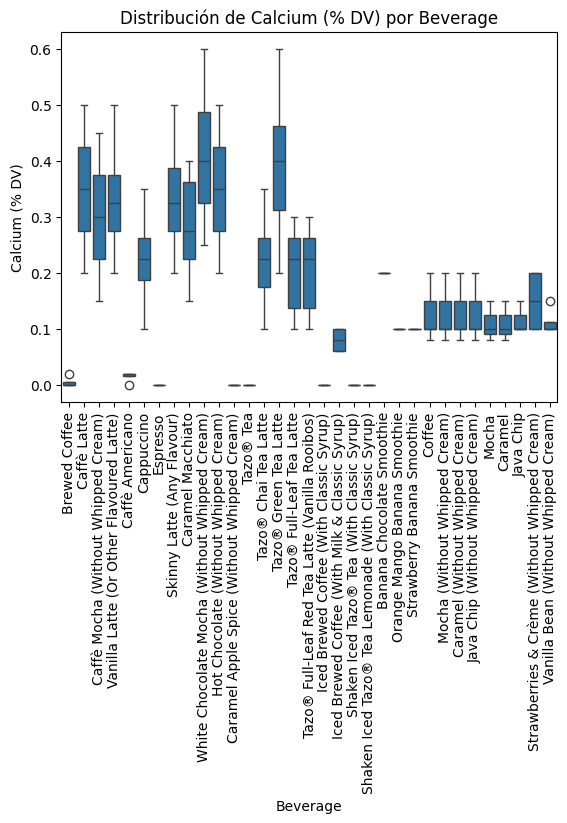

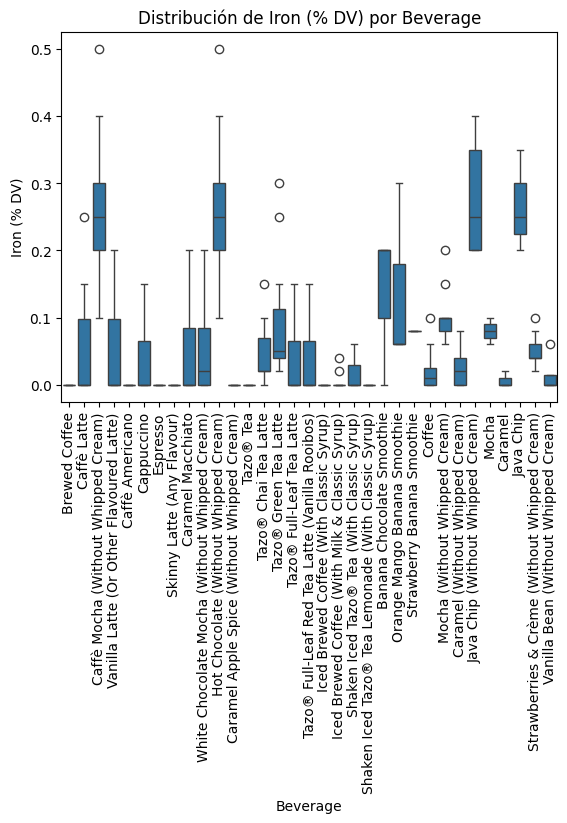

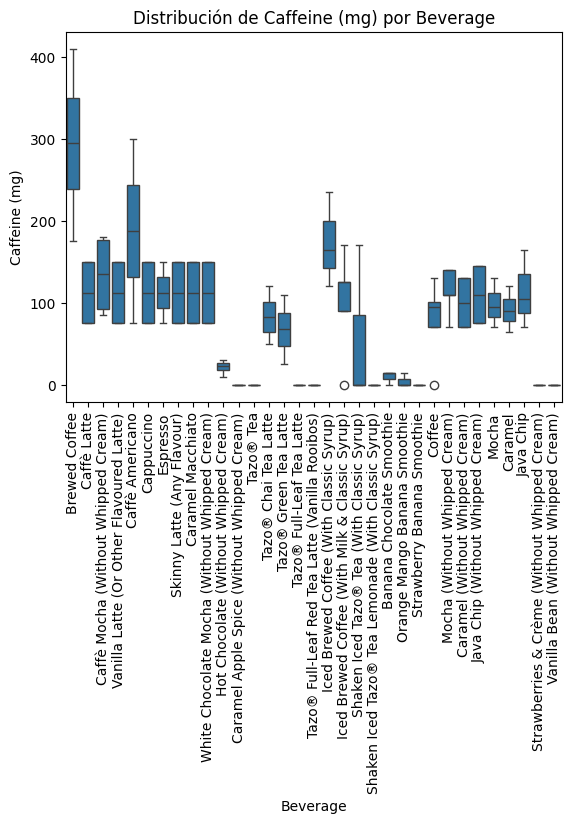

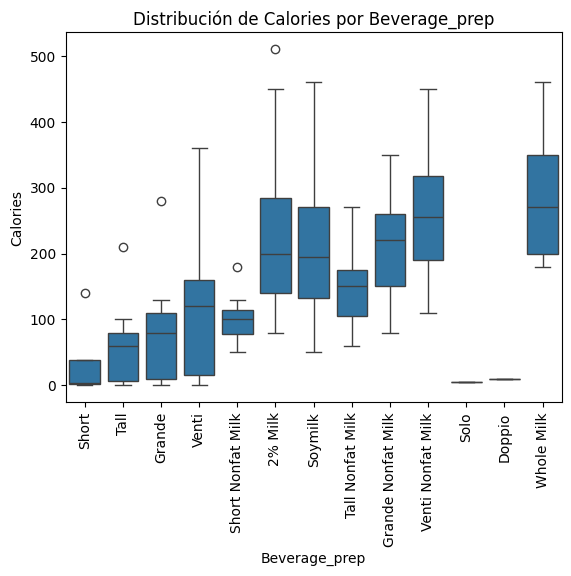

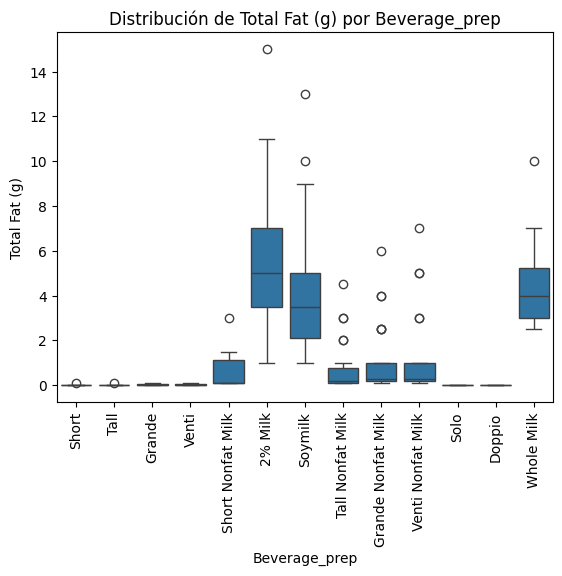

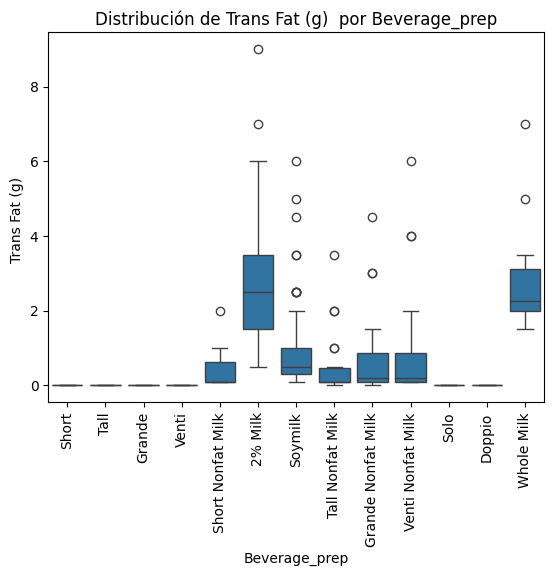

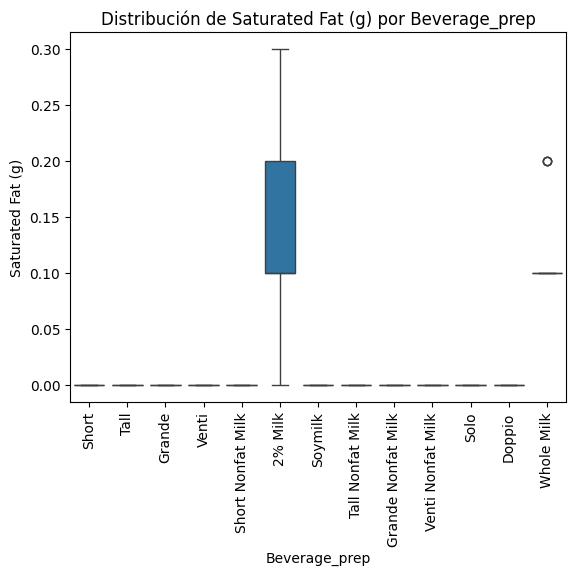

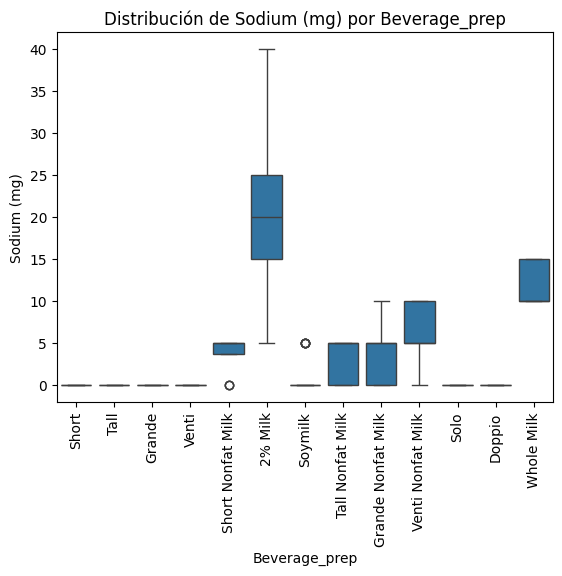

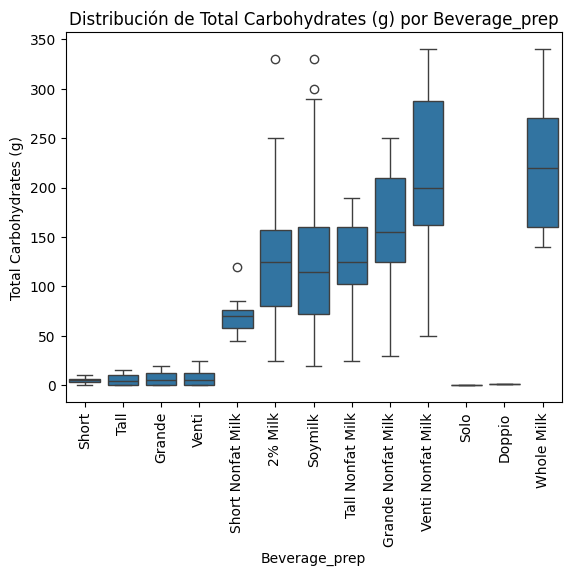

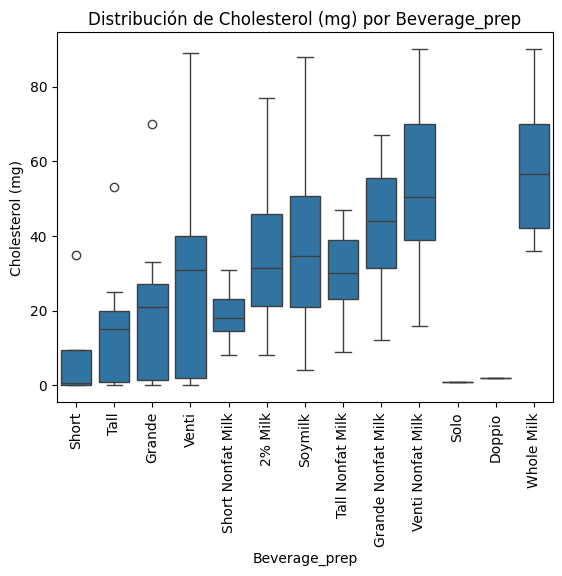

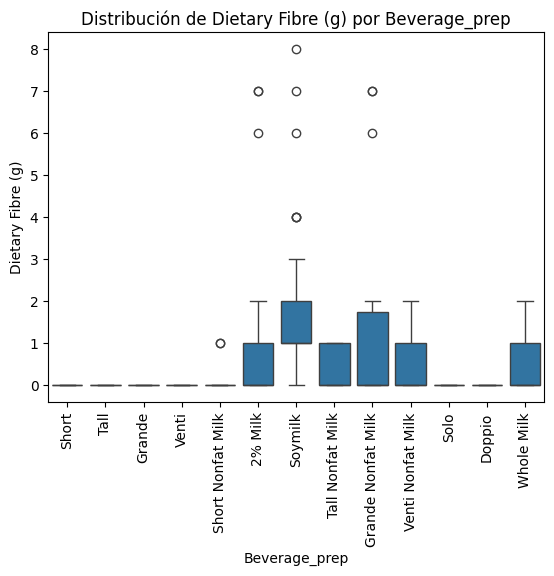

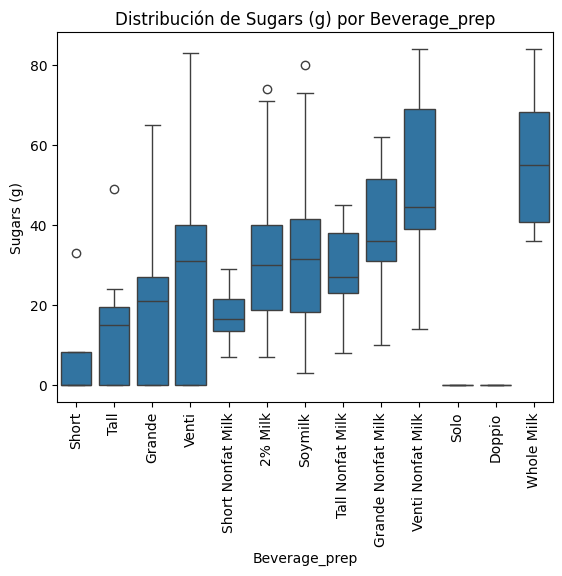

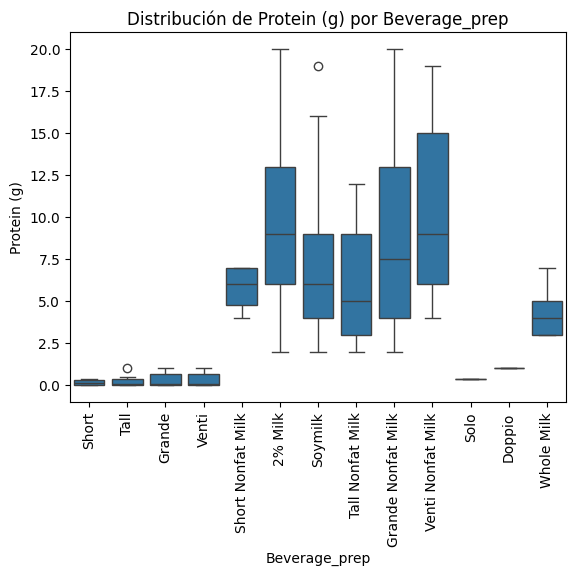

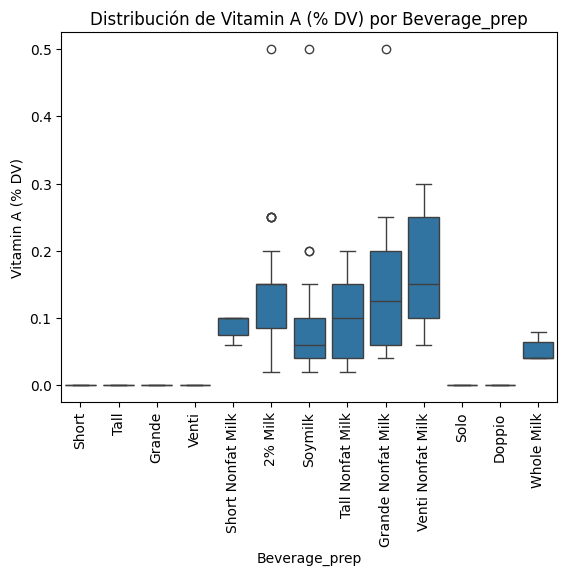

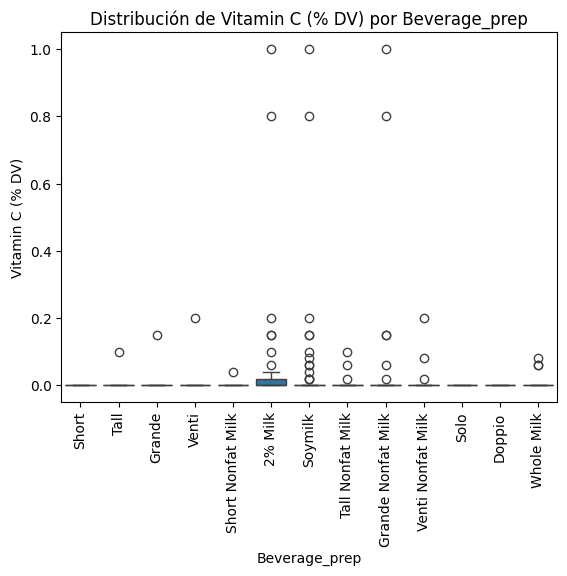

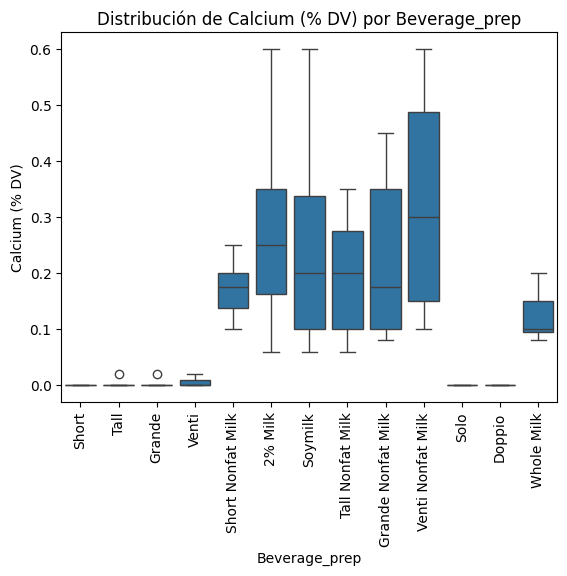

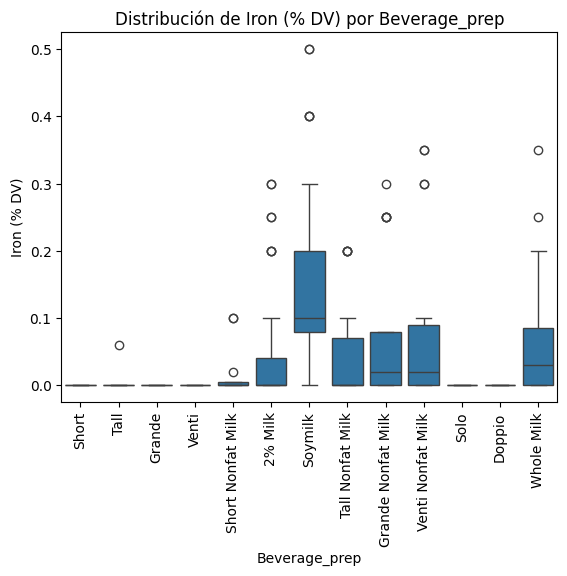

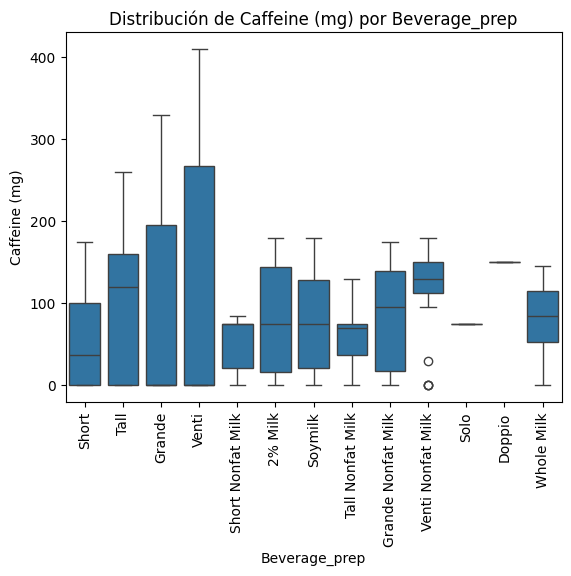

In [25]:
categorical_columns = ['Beverage_category', 'Beverage', 'Beverage_prep']
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# IIterate over every combination of categorical and numerical column
for categorical in categorical_columns:
    for numerical in numerical_columns:
        # Asegúrate de utilizar 'df' como tu DataFrame original
        sns.boxplot(x=categorical, y=numerical, data=df)
        plt.xticks(rotation=90)  # Rota las etiquetas del eje X para mejor legibilidad
        plt.title(f'Distribución de {numerical} por {categorical}')
        plt.show()

Se profundiza en cada aspecto nutricional de las categorías de bebidas, considerando las implicaciones para la salud y cómo los consumidores podrían interpretar estos datos al tomar decisiones sobre su consumo. Este análisis detallado incluirá observaciones específicas sobre la distribución de los datos, la relevancia de las medianas y los valores atípicos, y las posibles recomendaciones dietéticas.

### Calorías

La categoría "Frappuccino® Blended Coffee" y "Smoothies" destacan por tener los valores más altos de calorías, lo cual es indicativo de su riqueza en ingredientes de alto contenido energético como cremas, jarabes y frutas. Estas bebidas, a menudo percibidas como meriendas o indulgencias ocasionales, podrían no ser la elección más prudente para aquellos que vigilan su ingesta calórica o buscan opciones más ligeras.

En contraste, la categoría "Coffee", que incluye preparaciones más simples basadas en café, presenta los valores más bajos, sugiriendo que estas son opciones más adecuadas para el consumo diario desde una perspectiva calórica. La variabilidad observada en "Classic Espresso Drinks" y "Signature Espresso Drinks" subraya la diversidad dentro de estas categorías, lo que permite a los consumidores elegir bebidas que se ajusten a sus preferencias calóricas.

### Grasas (Totales, Trans y Saturadas)

Las categorías "Frappuccino® Blended Coffee" y "Smoothies" también lideran en contenido de grasas totales, lo que se refleja en la presencia de productos lácteos enteros y cremas. Los valores atípicos en estas categorías sugieren la existencia de opciones particularmente ricas en grasas, que podrían no ser ideales para dietas bajas en grasas.

La presencia de grasas trans en casi todas las categorías, a pesar de tener medianas bajas, es un punto de atención debido a su asociación negativa con la salud cardiovascular. Las grasas saturadas son consistentemente bajas en todas las categorías, lo que es favorable; sin embargo, la presencia de valores atípicos indica que algunas bebidas pueden desviarse de esta tendencia.

### Carbohidratos y Azúcares

La alta mediana y dispersión de carbohidratos en "Frappuccino® Blended Coffee" señalan a esta categoría como significativamente rica en carbohidratos, a menudo debido a jarabes azucarados y otros aditivos. Las categorías "Coffee" y "Shaken Iced Beverages" ofrecen las opciones más bajas en carbohidratos, adecuadas para quienes buscan minimizar su ingesta de azúcares simples.

La cantidad elevada de azúcares en "Frappuccino® Blended Coffee" y "Smoothies" plantea preocupaciones adicionales para aquellos atentos a su consumo de azúcar, especialmente en el contexto de dietas que buscan controlar o reducir el azúcar por razones de salud o metabólicas.

### Sodio, Colesterol y Fibra

Aunque los niveles de sodio y colesterol son relativamente bajos en todas las categorías, los valores atípicos en "Classic Espresso Drinks" y "Signature Espresso Drinks" para el sodio, y en "Frappuccino® Blended Coffee" y "Smoothies" para el colesterol, merecen atención. Estas excepciones podrían ser relevantes para individuos con restricciones dietéticas específicas.

La fibra dietética es generalmente baja en la mayoría de las bebidas, con la notable excepción de los "Smoothies", que pueden contribuir positivamente a la ingesta diaria de fibra, beneficiando la salud digestiva y la saciedad.

### Proteínas, Vitaminas y Minerales

Los "Smoothies" y "Signature Espresso Drinks" presentan medianas más altas de proteínas, lo cual podría ser ventajoso para aquellos que buscan aumentar su ingesta de proteínas a través de su dieta líquida.

En cuanto a las vitaminas y minerales, los "Smoothies" destacan por su contenido en Vitaminas A y C, lo que los convierte en una opción atractiva para aquellos interesados en aumentar su consumo de vitaminas esenciales. La variabilidad en el contenido de calcio y hierro entre las categorías

 refleja la diversidad de ingredientes utilizados, con algunas bebidas que pueden servir como una fuente notable de estos minerales.

### Cafeína

Como era de esperar, la categoría "Coffee" tiene el mayor contenido de cafeína, lo que la hace ideal para aquellos que buscan un impulso energético. Sin embargo, la variabilidad en el contenido de cafeína en otras categorías sugiere que incluso las bebidas no estrictamente de café pueden ofrecer cantidades significativas de cafeína, lo cual es una consideración importante para aquellos sensibles a sus efectos.

### Conclusiones y Recomendaciones

Este análisis detallado ilustra la complejidad del perfil nutricional de las bebidas en las distintas categorías. Los consumidores deben considerar no solo las calorías, sino también el equilibrio de macronutrientes, el contenido de vitaminas y minerales, y la presencia de ingredientes que pueden afectar la salud, como las grasas trans y los azúcares añadidos.

Para aquellos preocupados por la ingesta calórica y el contenido de azúcar, las categorías "Coffee" y "Shaken Iced Beverages" ofrecen opciones más ligeras. En contraste, los "Frappuccino® Blended Coffee" y "Smoothies" pueden ser tratados como indulgencias ocasionales en lugar de elementos básicos diarios debido a su alto contenido calórico y de azúcares.

Al elegir entre las opciones disponibles, los consumidores deben considerar sus necesidades nutricionales individuales, restricciones dietéticas y objetivos de salud. La educación sobre el contenido nutricional de estas bebidas puede empoderar a los consumidores para tomar decisiones informadas que apoyen su bienestar general.

## Gráfica de Dispersión

In [26]:
from pandas.api.types import CategoricalDtype

In [27]:
df.columns.tolist()

['Beverage_category',
 'Beverage',
 'Beverage_prep',
 'Calories',
 'Total Fat (g)',
 'Trans Fat (g) ',
 'Saturated Fat (g)',
 'Sodium (mg)',
 'Total Carbohydrates (g)',
 'Cholesterol (mg)',
 'Dietary Fibre (g)',
 'Sugars (g)',
 'Protein (g)',
 'Vitamin A (% DV)',
 'Vitamin C (% DV)',
 'Calcium (% DV)',
 'Iron (% DV)',
 'Caffeine (mg)']

In [28]:
df.columns.tolist()

['Beverage_category',
 'Beverage',
 'Beverage_prep',
 'Calories',
 'Total Fat (g)',
 'Trans Fat (g) ',
 'Saturated Fat (g)',
 'Sodium (mg)',
 'Total Carbohydrates (g)',
 'Cholesterol (mg)',
 'Dietary Fibre (g)',
 'Sugars (g)',
 'Protein (g)',
 'Vitamin A (% DV)',
 'Vitamin C (% DV)',
 'Calcium (% DV)',
 'Iron (% DV)',
 'Caffeine (mg)']

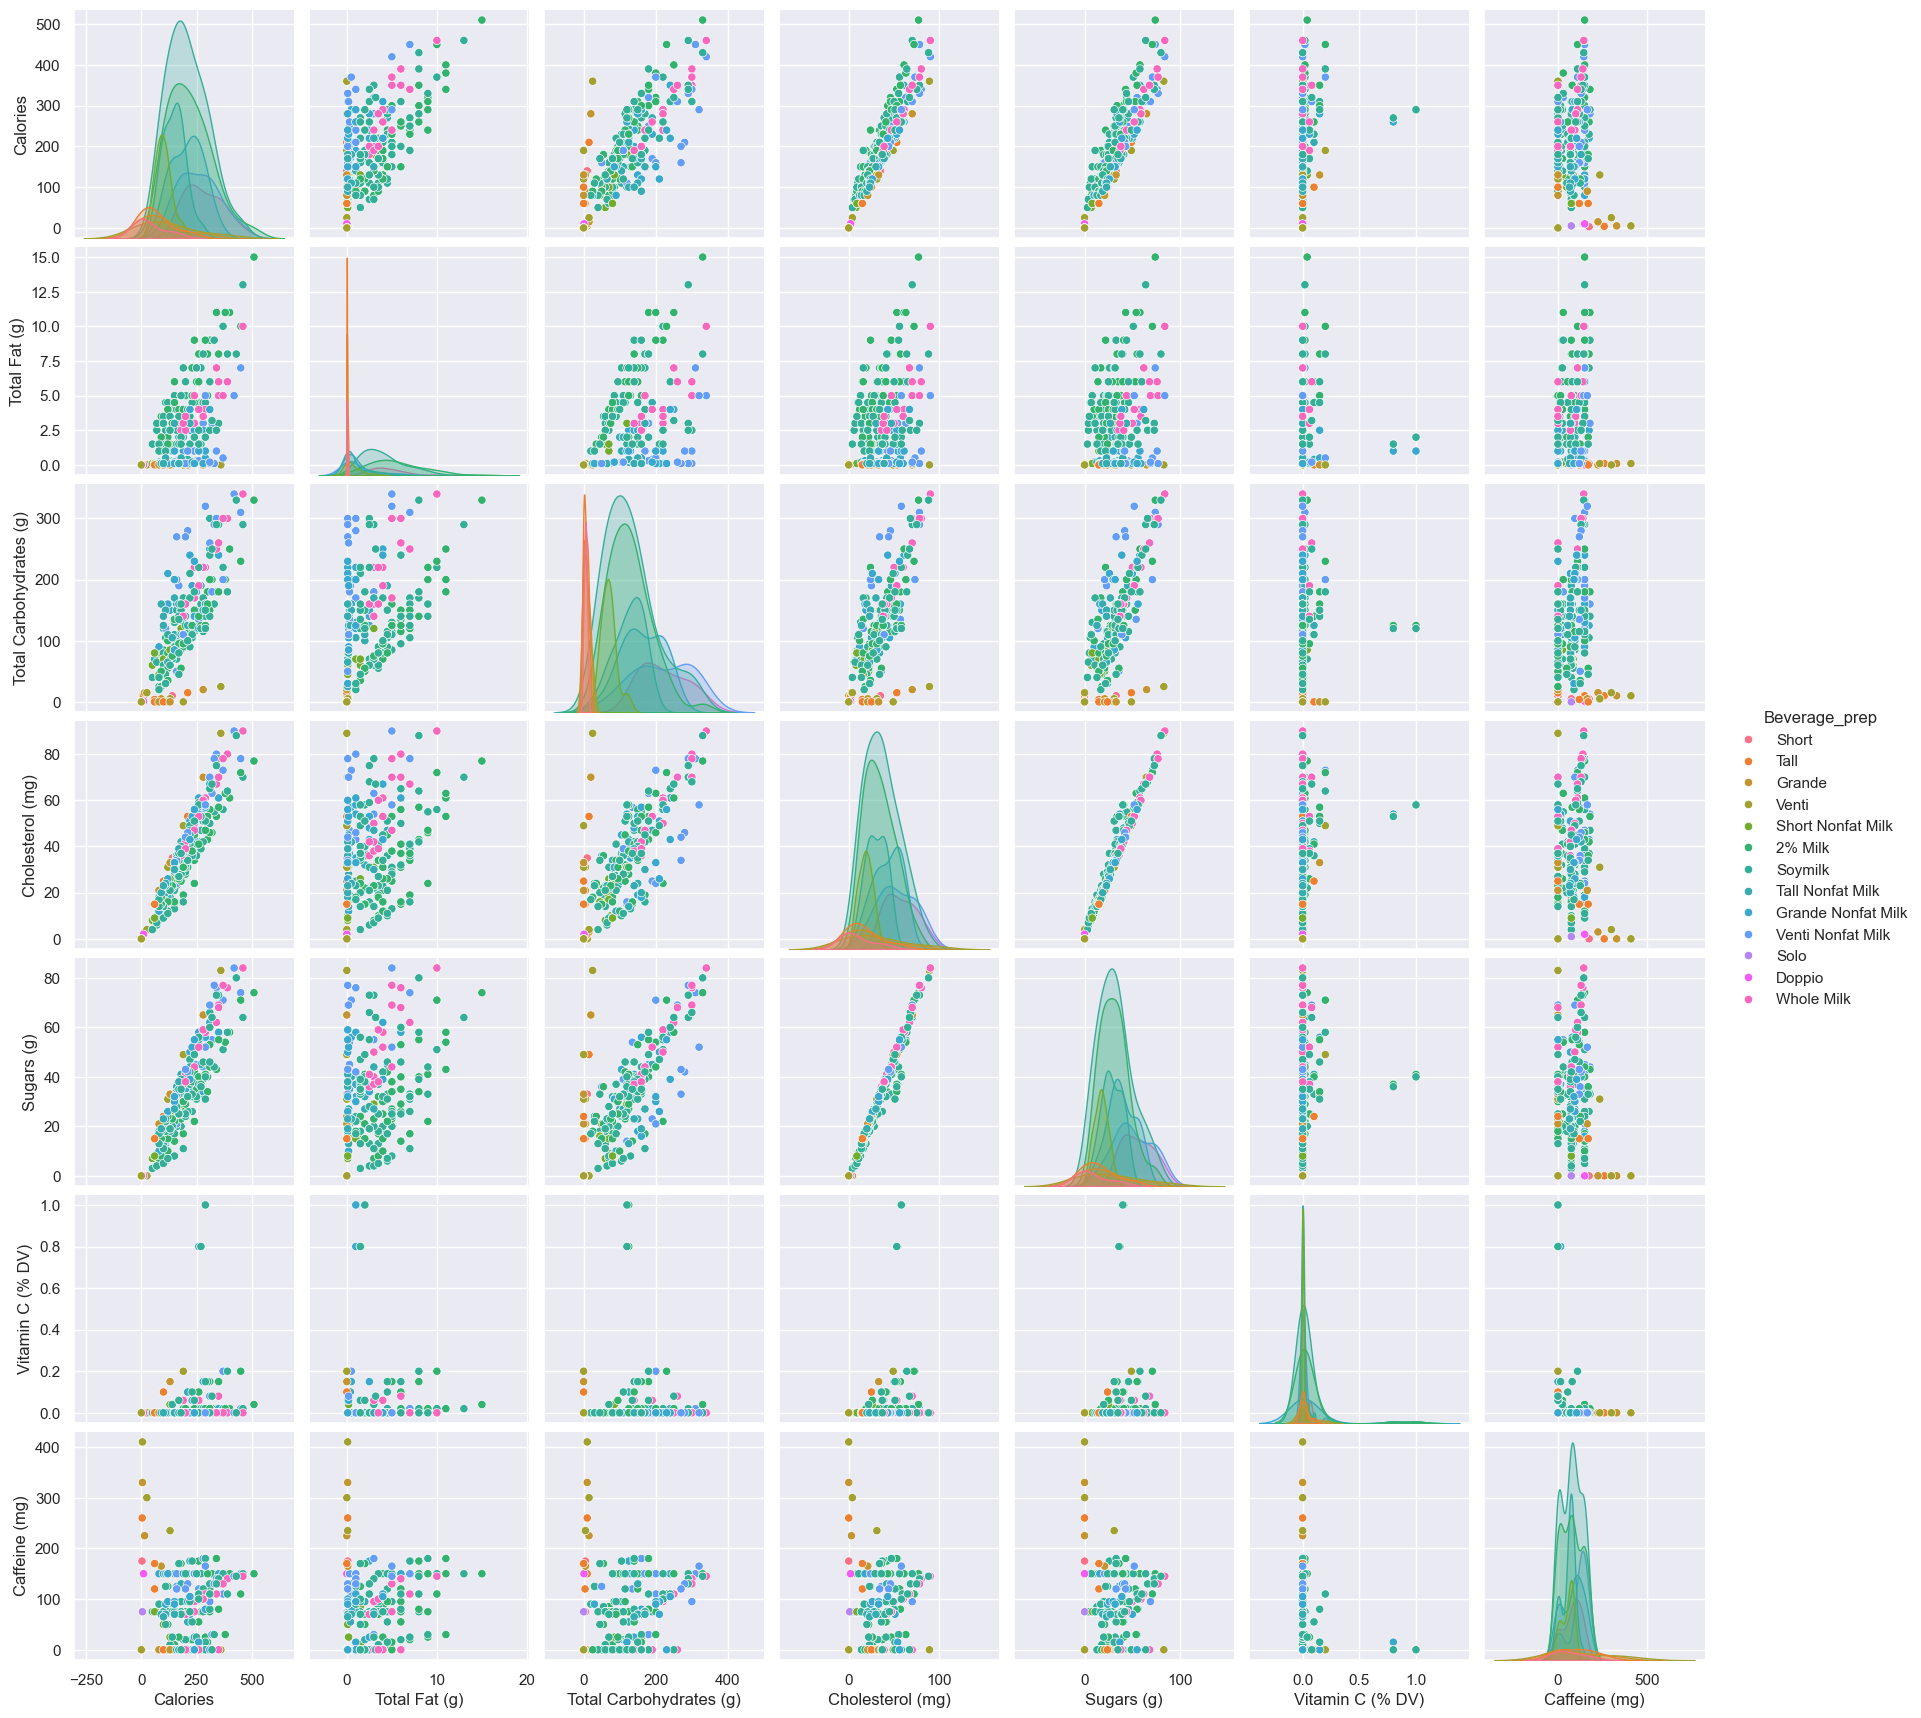

In [29]:
# Set the style of the plots
sns.set(style="darkgrid")

nutritional_facts = [
 'Calories',
 'Total Fat (g)',
 'Total Carbohydrates (g)',
 'Cholesterol (mg)',
 'Sugars (g)',
 'Vitamin C (% DV)',
 'Caffeine (mg)']

# Add 'Beverage_prep' to the list of variables to include it in the pairplot
variables = nutritional_facts + ['Beverage_prep']

# Create a pairplot with the variables
sns.pairplot(df[variables], hue='Beverage_prep')

# Show the plot
plt.show()

Esta imagen muestra una serie de gráficos de dispersión y gráficos de densidad que comparan diferentes variables nutricionales de bebidas según su preparación. Cada gráfico de dispersión muestra la relación entre dos variables nutricionales (como calorías frente a grasa total, calorías frente a azúcares, etc.), mientras que los gráficos de densidad en la diagonal muestran la distribución de una única variable para diferentes preparaciones de bebidas. Los puntos de colores representan preparaciones de bebidas específicas y el tamaño de la bebida.

Las etiquetas del eje x para cada categoría de comparación son las siguientes:

1. **Calorías vs. Grasa Total**: Aquí se muestra la relación entre el número de calorías y gramos de grasa total en las bebidas. Se puede analizar cómo el aumento de la grasa afecta el contenido calórico de las bebidas.

2. **Calorías vs. Azúcares**: Este gráfico compara el número de calorías con los gramos de azúcares. Este es un aspecto importante a considerar en dietas que buscan reducir la ingesta de azúcar, especialmente en dietas dirigidas a controlar la diabetes o el peso.

3. **Calorías vs. Proteínas**: Muestra cómo la cantidad de proteínas en las bebidas se relaciona con el número de calorías. Bebidas con alto contenido de proteínas pero bajas calorías pueden ser interesantes para quienes buscan dietas altas en proteínas.

4. **Grasa Total vs. Azúcares**: Analiza la correlación entre grasa y azúcares, lo que puede ser relevante para entender el perfil nutricional general de la bebida, especialmente en términos de salud cardiovascular y manejo del peso.

5. **Grasa Total vs. Proteínas**: Explora la relación entre el contenido de grasa y proteína. Por ejemplo, las opciones con más proteínas y menos grasa pueden ser deseables para ciertos regímenes dietéticos.

6. **Azúcares vs. Proteínas**: Compara la cantidad de azúcares y proteínas. Una alta cantidad de proteínas en comparación con los azúcares puede hacer que una bebida sea considerada como más equilibrada desde el punto de vista nutricional.

En los gráficos de densidad (las gráficas a lo largo de la diagonal), podemos ver cómo se distribuyen los valores de cada variable nutricional (calorías, grasa total, azúcares, proteínas) para las diferentes preparaciones de bebidas. Estos gráficos muestran la probabilidad de encontrar una bebida con una cantidad específica de la variable nutricional dada. Por ejemplo, si una curva es alta y estrecha, sugiere que la mayoría de las bebidas tienen una cantidad similar de esa variable; si la curva es más plana y amplia, hay más variabilidad en el contenido nutricional de las bebidas.

Finalmente, los colores de los puntos en los gráficos de dispersión indican diferentes tipos de preparaciones de bebidas, como "Short", "Tall", "Grande", "Venti", y variaciones con diferentes tipos de leche como "Nonfat Milk", "2% Milk", "Soy Milk", y "Whole Milk". Esto permite ver cómo las elecciones en el tamaño de la bebida y el tipo de leche afectan el contenido nutricional. Por ejemplo, los puntos que representan "Whole Milk" podrían tender a estar más a la derecha en el eje x de grasa total, indicando un mayor contenido de grasa.

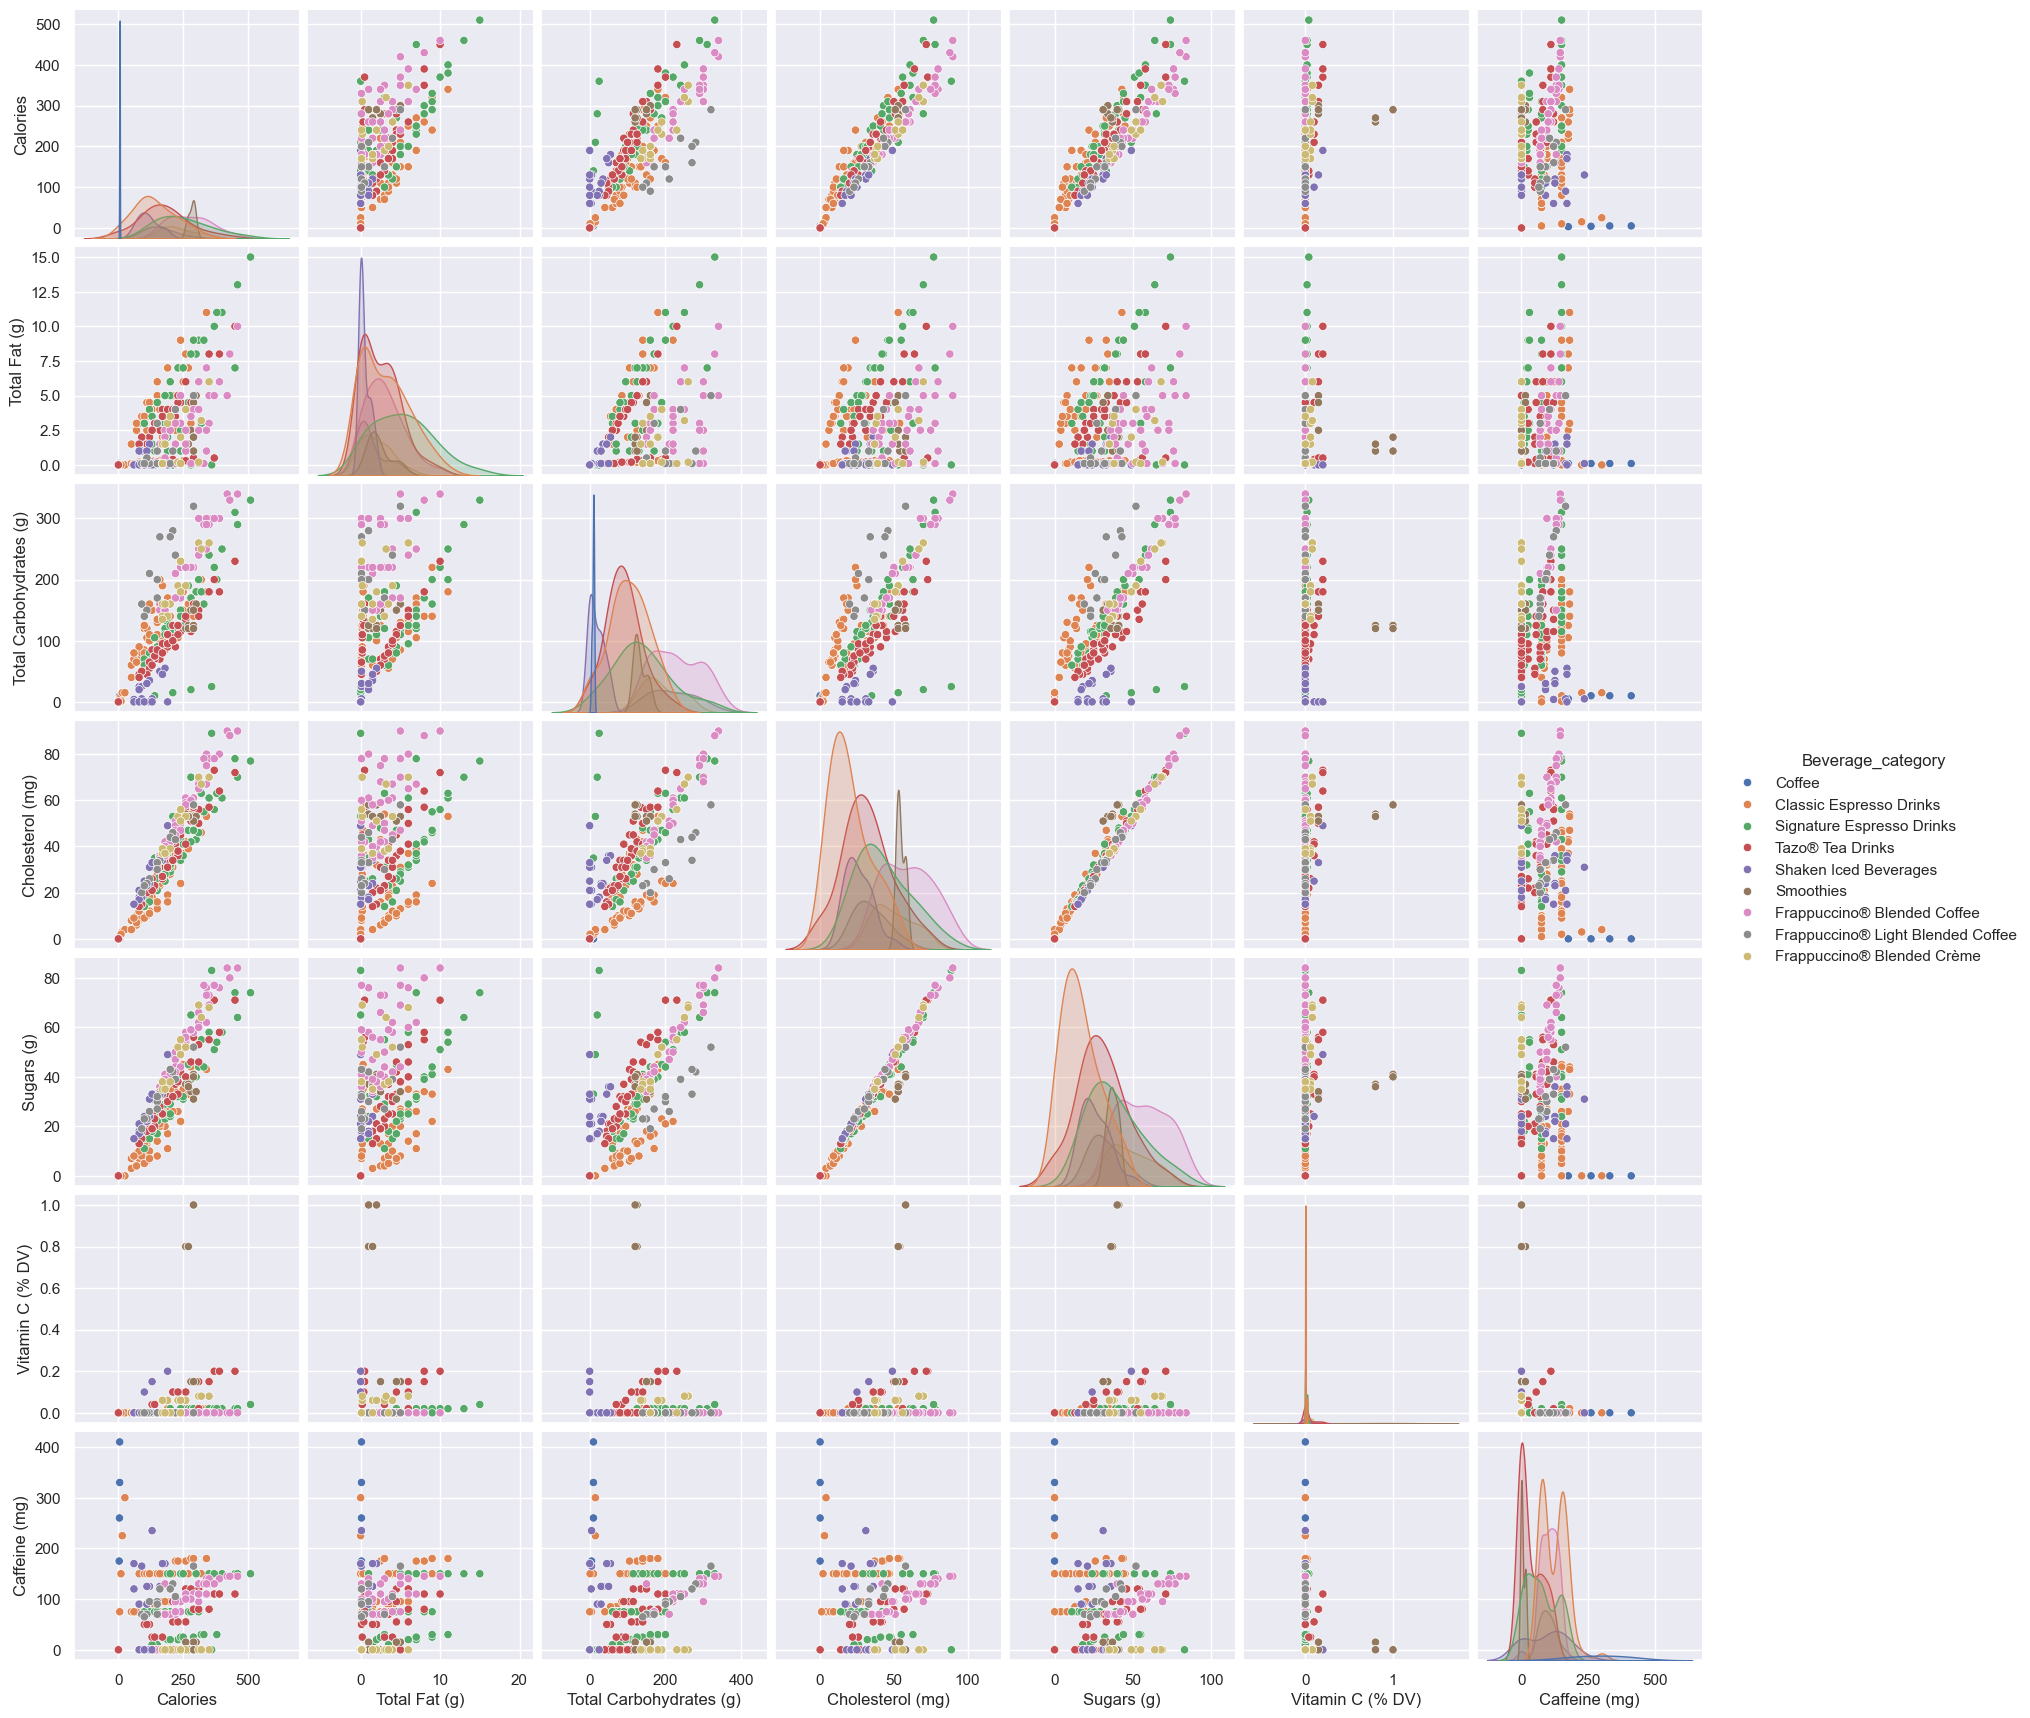

In [30]:
# Set the style of the plots
sns.set(style="darkgrid")

# Add 'Beverage_prep' to the list of variables to include it in the pairplot
variables = nutritional_facts + ['Beverage_category']

# Create a pairplot with the variables
sns.pairplot(df[variables], hue='Beverage_category')

# Show the plot
plt.show()

# Add Analysis

## Cluster Analysis

In [31]:
# Cluster analysis is a type of unsupervised machine learning that groups data points into clusters based on similarity.
from sklearn.cluster import KMeans


#### First Step

Determine the appropriate number of clusters: Elbow method, which involves plotting the within-cluster sum of squares (WCSS) against the number of clusters and looking for the 'elbow point' where the rate of decrease sharply changes.

We look for a point in the graph where the WCSS begins to decrease more slowly, indicating that adding more clusters doesn't improve the model significantly.

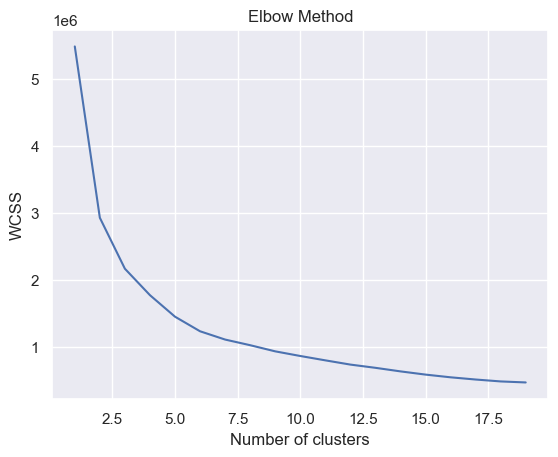

In [32]:
# WCSS is a measure of the variability of the observations within each cluster; lower values indicate that the data points are closer to their respective cluster centroids.
wcss = []
for i in range(1, 20): # Test 1 to 15 clusters
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df[numerical_columns])
    wcss.append(kmeans.inertia_)

# Plot the elbow graph
plt.plot(range(1, 20), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Se eligen 5 Clusters para este proceso.

La razón es que este punto parece ser donde la disminución de la suma de los cuadrados dentro del cluster (WCSS) comienza a disminuir a un ritmo más lento. Aunque la curva sigue disminuyendo después de 5 clusters, la reducción de WCSS no es tan pronunciada. Por lo tanto, agregar más clusters no mejora significativamente la cohesión dentro de los clusters en comparación con el costo adicional de tener que manejar más clusters. Este es el equilibrio que buscamos con el método del codo: suficiente granularidad sin exceder en complejidad.

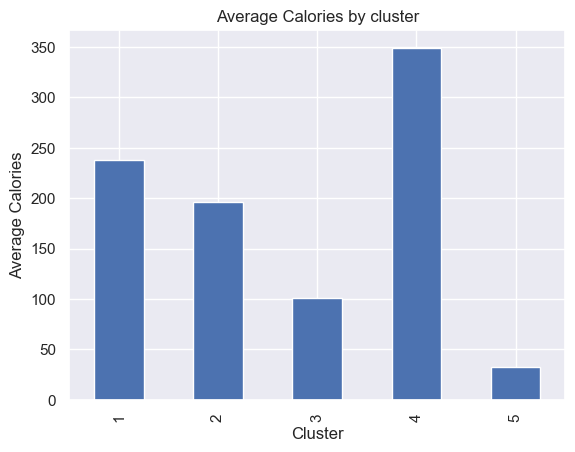

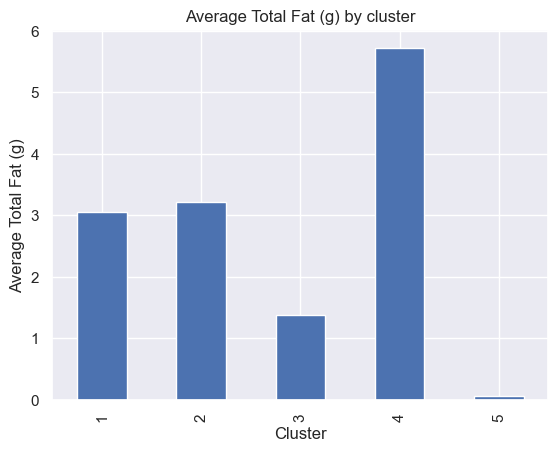

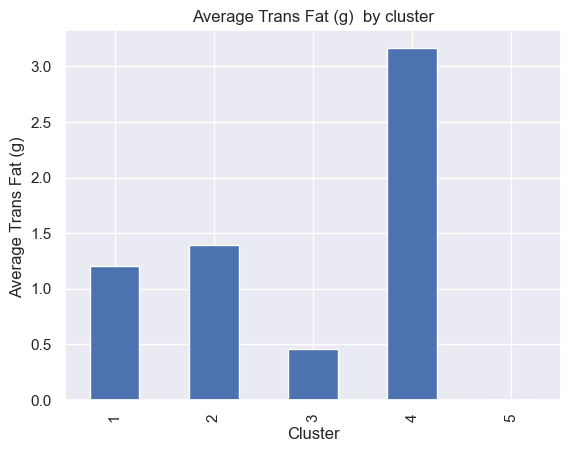

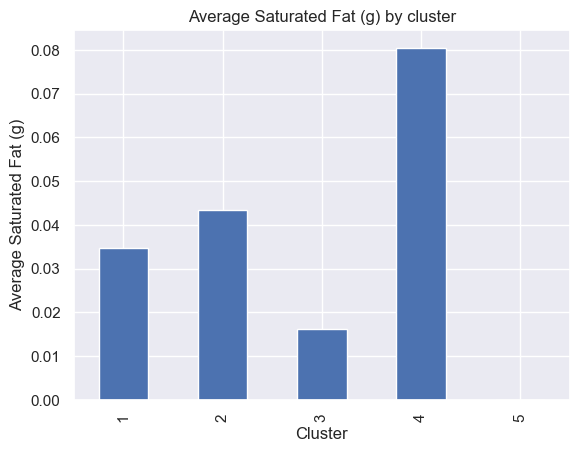

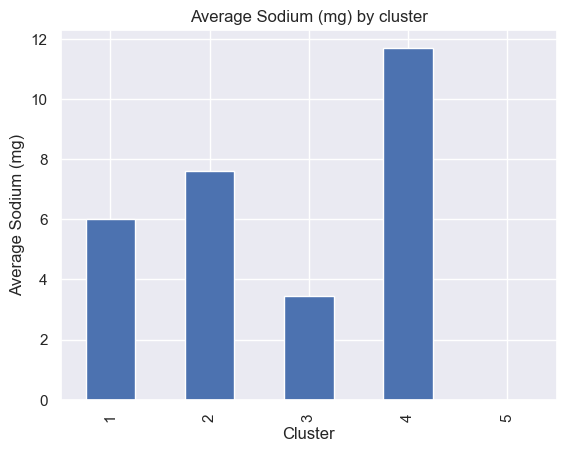

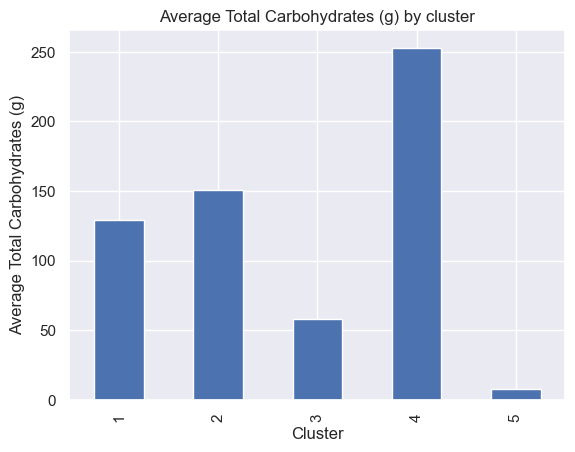

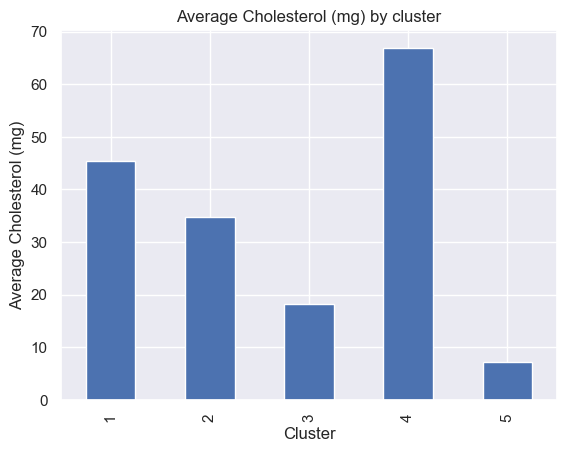

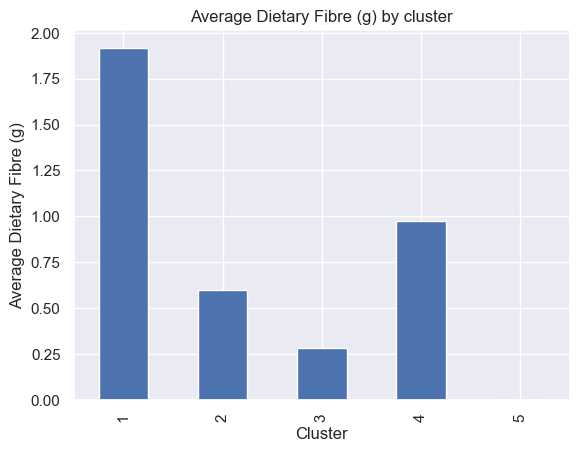

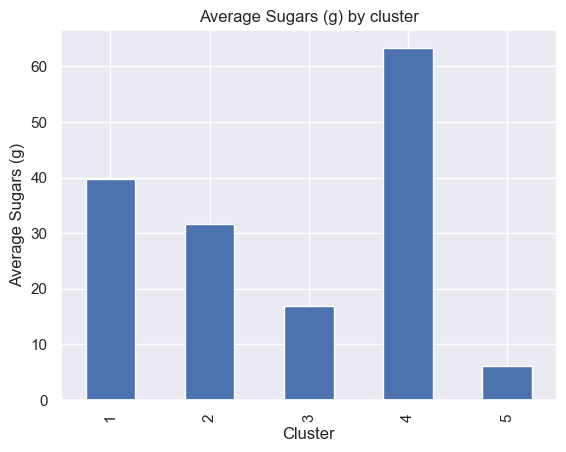

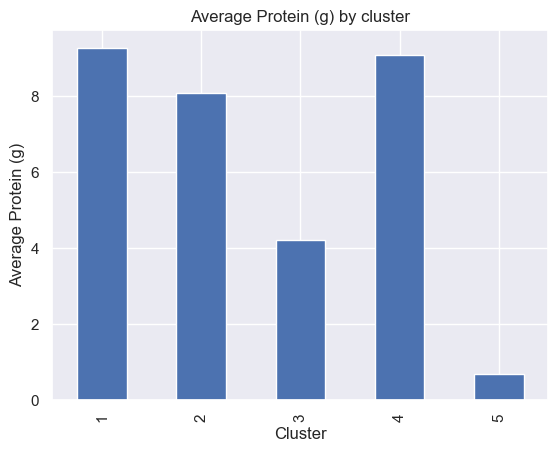

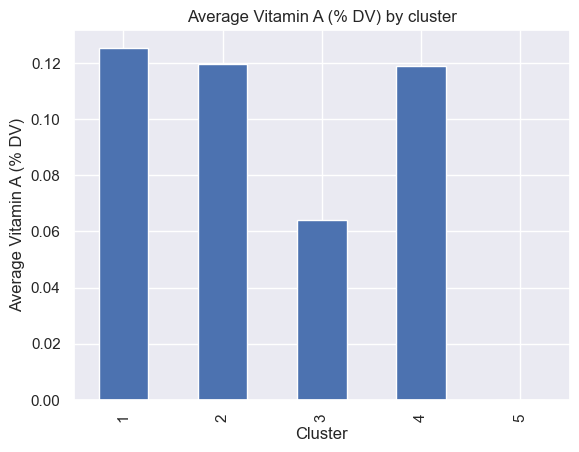

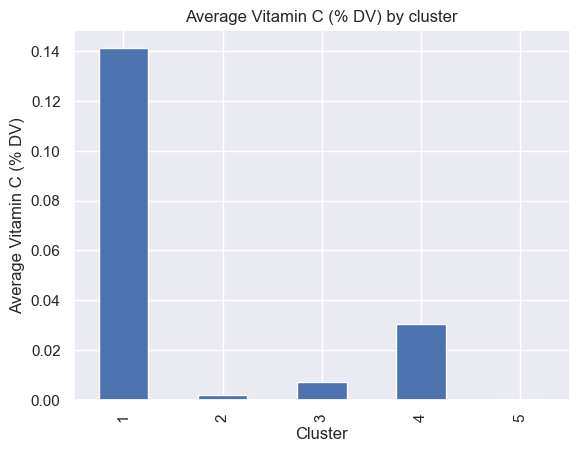

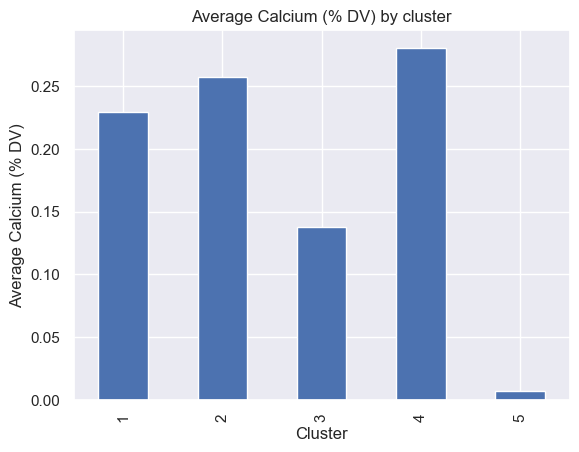

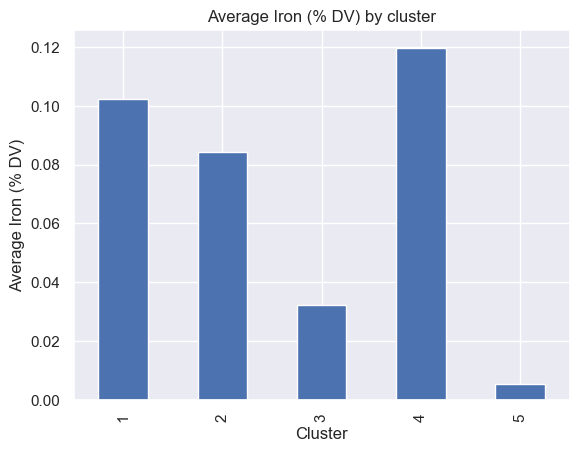

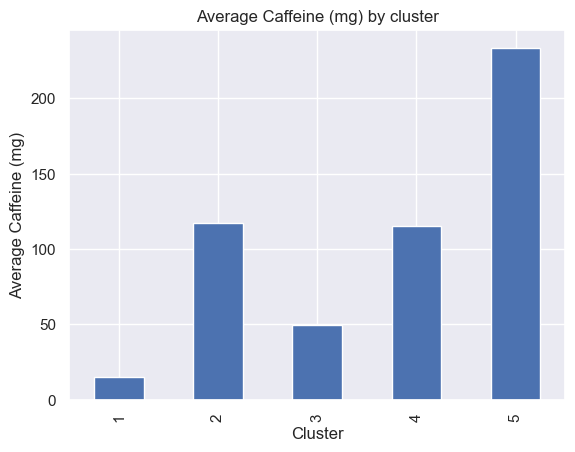

Cluster
3    74
2    67
1    49
4    41
5    11
Name: count, dtype: int64


In [33]:
# Choose the number of clusters as determined by the elbow method
k = 5

# Assuming 'nutritional_data' is a DataFrame containing your numerical columns
# Apply K-Means to the dataset
kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
cluster_labels = kmeans.fit_predict(df[numerical_columns])

# Add the cluster labels to your original DataFrame
df['Cluster'] = cluster_labels + 1

# Extract numerical data for cluster mean analysis
numerical_data_for_analysis = df.select_dtypes(include=[np.number])
numerical_data_for_analysis['Cluster'] = df['Cluster']

# Analyze the mean values for each cluster
clustered_data = numerical_data_for_analysis.groupby(['Cluster']).mean()

# Count the number of beverages in each cluster
cluster_count = df['Cluster'].value_counts()

# Visualize the characteristics of each cluster
for c in clustered_data.columns:
    plt.figure()
    clustered_data[c].plot(kind='bar')
    plt.title(f'Average {c} by cluster')
    plt.xlabel('Cluster')
    plt.ylabel(f'Average {c}')
    plt.show()

print(cluster_count)



In [34]:
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D


## PCA Analysis

El Análisis de Componentes Principales (PCA por sus siglas en inglés) es una técnica utilizada para enfatizar la variación y resaltar patrones fuertes en un conjunto de datos. A menudo se usa para hacer que los datos sean fáciles de explorar y visualizar:

**Lo que hace el PCA:**

- **Reducción de Dimensionalidad:** El PCA reduce la cantidad de variables en los datos extrayendo información importante (componentes principales) del conjunto de datos y representándola como nuevas variables que son combinaciones lineales de las variables originales.

- **Identificación de Direcciones de Máxima Varianza:** Encuentra las direcciones en las cuales los datos varían más. En otras palabras, encuentra las líneas sobre las cuales los datos están más dispersos cuando se proyectan sobre dichas líneas, denominadas componentes principales.

- **Ortogonalidad de los Componentes:** Cada componente principal es ortogonal a los demás, lo que significa que están en ángulos rectos entre sí en el espacio multidimensional. Esto asegura que los componentes no estén correlacionados y contengan información única.

**Transformación de Datos:**

- El PCA comienza con el cálculo de la matriz de covarianza de los datos para comprender cómo las variables en el conjunto de datos están variando juntas.
- Luego, calcula los autovalores y autovectores de esta matriz de covarianza. Los autovectores apuntan a la dirección de la dispersión de los datos, y los autovalores dan la magnitud de esta varianza.
- Al seleccionar los N autovectores superiores (basados en los correspondientes autovalores), el PCA reduce la dimensionalidad de los datos. Los datos originales pueden transformarse en este nuevo subespacio de menos dimensiones que retiene la varianza más significativa presente en los datos originales.

**En Este Caso:**

- El PCA está tomando tus datos nutricionales de alta dimensión (como Calorías, Grasa, Proteínas, etc.) y transformándolos en un conjunto de nuevas variables (componentes principales).
- El primer componente principal (PC1) representa la varianza más grande posible, y cada componente sucesivo tiene la mayor varianza posible bajo la restricción de que es ortogonal a los componentes anteriores.

**Sobre el PCA 1, 2 y 3 en este caso:**

Cada componente principal (PC1, PC2, PC3) representa una nueva dimensión que captura cierta cantidad de la variabilidad total de tus datos nutricionales. 

- **PC1** capturaría la mayor varianza y, por lo tanto, podría estar representando una combinación de características nutricionales que varían juntas de la manera más significativa entre los diferentes productos.
- **PC2** y **PC3** capturarían la segunda y tercera mayor varianza respectivamente y podrían estar representando otras combinaciones de características nutricionales que proporcionan información adicional y que son ortogonales a PC1.

**Lo que cada cluster representa:**

Cada cluster encontrado por el algoritmo de K-Means representaría un grupo de bebidas que tienen perfiles nutricionales similares basados en las variables originales. Por ejemplo, un cluster puede representar bebidas con alto contenido calórico y bajo contenido de nutrientes, mientras que otro puede representar bebidas más equilibradas. La interpretación exacta dependería del análisis de los centroides de los clusters en relación con las características nutricionales originales.

### **Interpreting Centroids of Clusters:**
To get a more precise interpretation of the centroids of each cluster in terms of original features:

In [35]:
# Calculate the centroids of each cluster in the original feature space
cluster_centroids = df.groupby('Cluster')[numeric_columns].mean()

# Print out the centroids
print(cluster_centroids)

# Now, interpret these centroids by comparing with the overall means and standard deviations
overall_means = df[numeric_columns].mean()
overall_stds = df[numeric_columns].std()

# Print the comparison
print("Centroid comparison to overall means:")
print(cluster_centroids - overall_means)

print("Centroid comparison to overall standard deviations:")
print((cluster_centroids - overall_means) / overall_stds)


NameError: name 'numeric_columns' is not defined

In [ ]:
# Save cluster_centroids as a dataframe
df_cluster_centroids = cluster_centroids

# Save cluster_centroids - overall_means as a dataframe
df_cluster_centroids_minus_means = cluster_centroids - overall_means

# Save cluster_centroids - overall_means / overall_stds as a dataframe
df_cluster_centroids_normalized = (cluster_centroids - overall_means) / overall_stds

In [ ]:
# Centroids
df_cluster_centroids

Calories  Total Fat (g)  Trans Fat (g)   Saturated Fat (g)  \
Cluster                                                                 
1        237.755102       3.059184        1.200000           0.034694   
2        196.268657       3.222388        1.395522           0.043284   
3        100.540541       1.377027        0.460811           0.016216   
4        349.268293       5.724390        3.168293           0.080488   
5         32.454545       0.054545        0.000000           0.000000   

         Sodium (mg)  Total Carbohydrates (g)  Cholesterol (mg)  \
Cluster                                                           
1           6.020408               129.387755         45.306122   
2           7.611940               150.746269         34.656716   
3           3.445946                58.027027         18.189189   
4          11.707317               252.926829         66.926829   
5           0.000000                 7.818182          7.090909   

         Dietary Fibre (g)  Sugars (g)  Protein (g)  Vitamin A (% DV)  \
Cluster                                                                 
1                 1.918367   39.755102     9.285714          0.125510   
2                 0.597015   31.552239     8.089552          0.119701   
3                 0.283784   16.891892     4.206757          0.064054   
4                 0.975610   63.365854     9.097561          0.119024   
5                 0.000000    6.090909     0.681818          0.000000   

         Vitamin C (% DV)  Calcium (% DV)  Iron (% DV)  Caffeine (mg)  
Cluster                                                                
1                0.141429        0.229592     0.102449      15.102041  
2                0.001791        0.257015     0.084328     117.313433  
3                0.007162        0.137568     0.032162      49.932432  
4                0.030488        0.280488     0.119756     115.609756  
5                0.000000        0.007273     0.005455     233.636364

In [ ]:
# Centroid comparison to overall means
df_cluster_centroids_minus_means

Calories  Total Fat (g)  Trans Fat (g)   Saturated Fat (g)  \
Cluster                                                                 
1         43.883201       0.154225       -0.107025          -0.002909   
2          2.396756       0.317429        0.088498           0.005680   
3        -93.331360      -1.527932       -0.846214          -0.021387   
4        155.396392       2.819432        1.861268           0.042884   
5       -161.417355      -2.850413       -1.307025          -0.037603   

         Sodium (mg)  Total Carbohydrates (g)  Cholesterol (mg)  \
Cluster                                                           
1          -0.343228                 0.503458          9.314387   
2           1.248304                21.861971         -1.335019   
3          -2.917690               -70.857270        -17.802546   
4           5.343681               124.042532         30.935094   
5          -6.363636              -121.066116        -28.900826   

         Dietary Fibre (g)  Sugars (g)  Protein (g)  Vitamin A (% DV)  \
Cluster                                                                 
1                 1.112582    6.792292     2.307202          0.027204   
2                -0.208770   -1.410571     1.111040          0.021396   
3                -0.522001  -16.070918    -2.771756         -0.034252   
4                 0.169825   30.403044     2.119049          0.020719   
5                -0.805785  -26.871901    -6.296694         -0.098306   

         Vitamin C (% DV)  Calcium (% DV)  Iron (% DV)  Caffeine (mg)  
Cluster                                                                
1                0.104941        0.022030     0.027986     -65.910356  
2               -0.034697        0.049453     0.009866      36.301036  
3               -0.029325       -0.069994    -0.042301     -31.079964  
4               -0.006000        0.072926     0.045293      34.597359  
5               -0.036488       -0.200289    -0.069008     152.623967

In [ ]:
# Centroid comparison to overall standard deviations
df_cluster_centroids_normalized 

Calories  Total Fat (g)  Trans Fat (g)   Saturated Fat (g)  \
Cluster                                                               
1        0.426617       0.052380       -0.065249          -0.040762   
2        0.023300       0.107809        0.053953           0.079582   
3       -0.907334      -0.518932       -0.515903          -0.299636   
4        1.510708       0.957565        1.134740           0.600818   
5       -1.569241      -0.968087       -0.796841          -0.526828   

         Sodium (mg)  Total Carbohydrates (g)  Cholesterol (mg)  \
Cluster                                                           
1          -0.039770                 0.006117          0.447911   
2           0.144643                 0.265627         -0.064198   
3          -0.338077                -0.860929         -0.856090   
4           0.619180                 1.507141          1.487608   
5          -0.737364                -1.470977         -1.389784   

         Dietary Fibre (g)  Sugars (g)  Protein (g)  Vitamin A (% DV)  \
Cluster                                                                 
1                 0.769450    0.344259     0.473597          0.335942   
2                -0.144383   -0.071493     0.228062          0.264211   
3                -0.361011   -0.814534    -0.568955         -0.422967   
4                 0.117449    1.540940     0.434975          0.255850   
5                -0.557273   -1.361968    -1.292515         -1.213957   

         Vitamin C (% DV)  Calcium (% DV)  Iron (% DV)  Caffeine (mg)  
Cluster                                                                
1                0.727655        0.151488     0.266879      -0.984521  
2               -0.240584        0.340062     0.094079       0.542238  
3               -0.203341       -0.481315    -0.403383      -0.464250  
4               -0.041602        0.501472     0.431921       0.516790  
5               -0.253003       -1.377283    -0.658070       2.279785

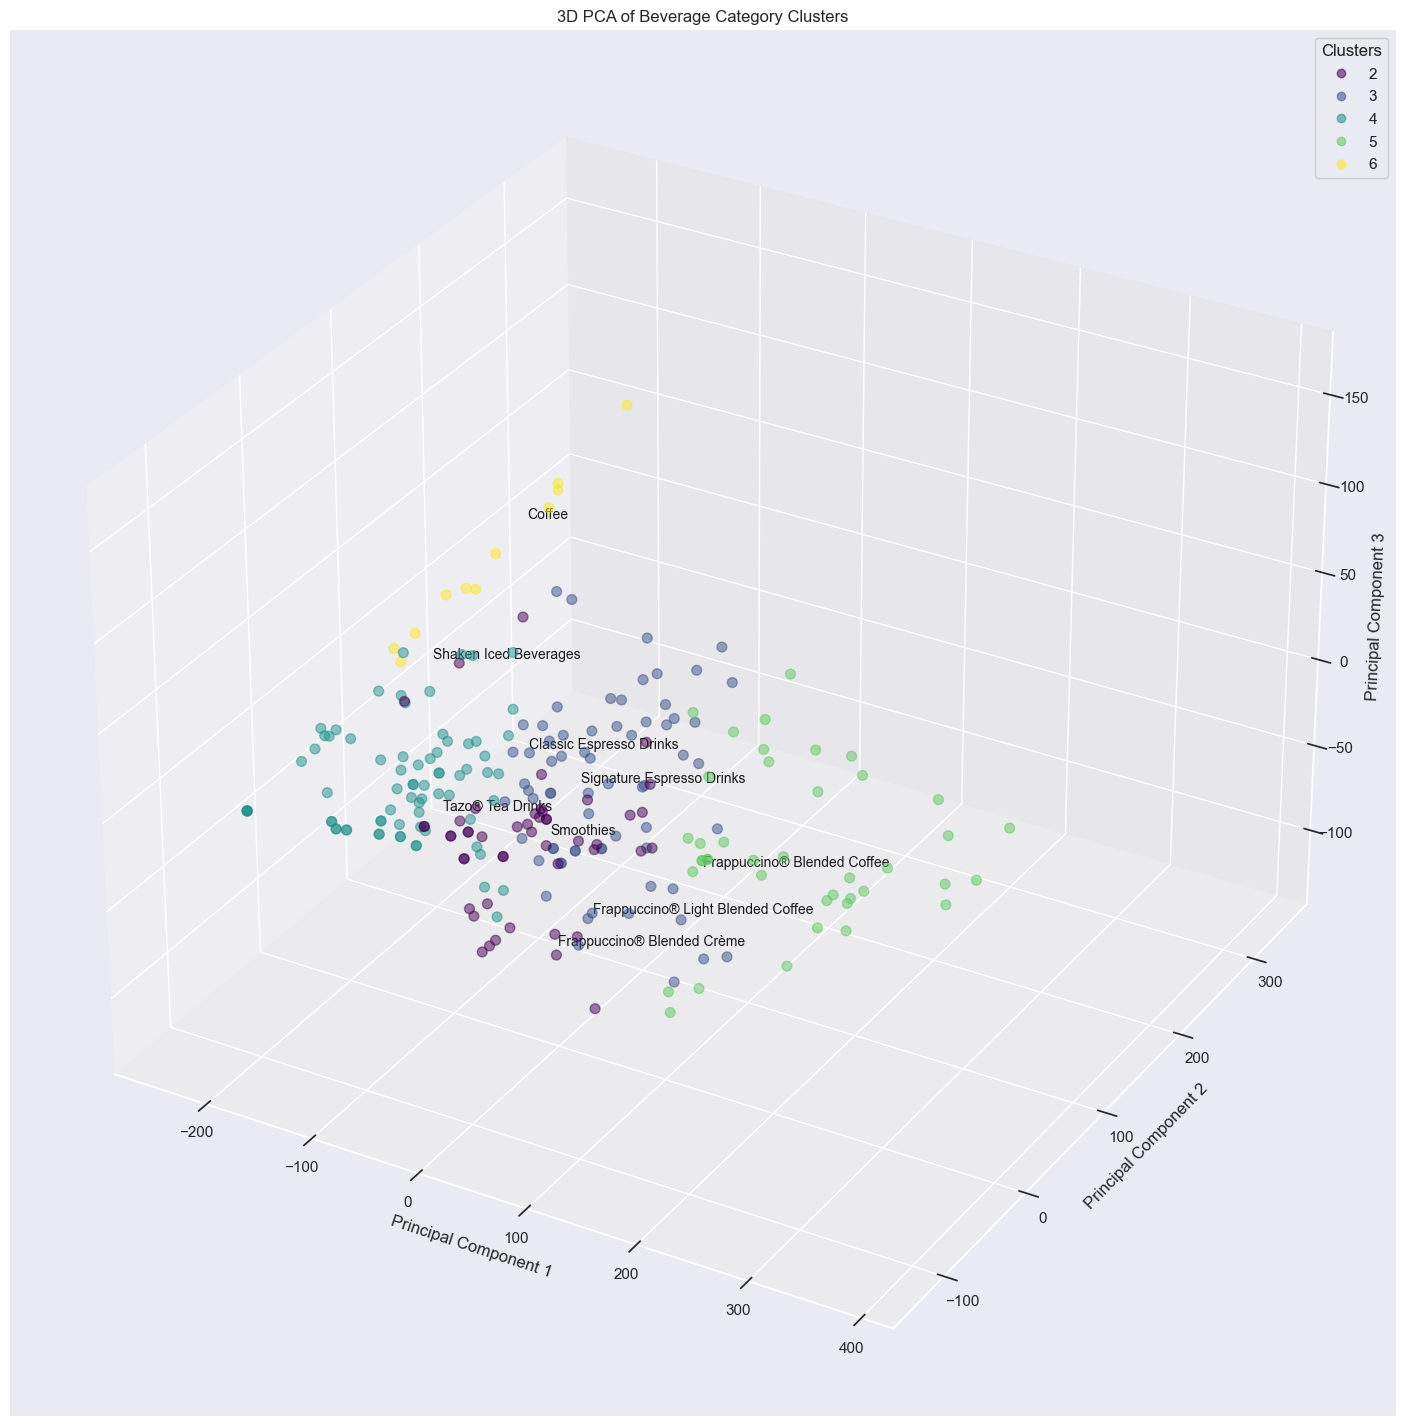

In [ ]:
# Extending PCA to 3 components
pca_3d = PCA(n_components=3)
principal_components_3d = pca_3d.fit_transform(df[numeric_columns].dropna())

# Create a DataFrame with the 3 principal components
pca_df_3d = pd.DataFrame(data=principal_components_3d, columns=['PC1', 'PC2', 'PC3'])

# Add the cluster labels and beverage categories to this DataFrame
pca_df_3d['Cluster'] = df['Cluster'] + 1  # Add 1 to cluster for 1-based indexing
pca_df_3d['Beverage Category'] = df['Beverage_category']

# 3D Plotting
fig = plt.figure(figsize=(20, 18))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for clusters
colors = plt.cm.viridis(np.linspace(0, 1, k))  # Assuming 'k' is the number of clusters
scatter = ax.scatter(pca_df_3d['PC1'], pca_df_3d['PC2'], pca_df_3d['PC3'], 
                     c=pca_df_3d['Cluster'], cmap='viridis', s=50, alpha=0.5)

# Category labels with annotations
for category in pca_df_3d['Beverage Category'].unique():
    # Select only rows of the current category
    category_data = pca_df_3d[pca_df_3d['Beverage Category'] == category]
    
    # Calculate median only for the principal components
    median_pc1 = category_data['PC1'].median()
    median_pc2 = category_data['PC2'].median()
    median_pc3 = category_data['PC3'].median()
    
    # Now use the median principal component values for annotation
    ax.text(median_pc1, median_pc2, median_pc3, category, size=10, zorder=1, color='k')

# Legend for clusters
legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend1)

# Axes and title
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('3D PCA of Beverage Category Clusters')

plt.show()


### Clúster 1
- **Perfil Nutricional Promedio**: Este clúster tiene un contenido calórico moderadamente alto con un promedio de 237,76 calorías. La grasa total es relativamente baja con 3,06g, con grasas trans en 1,2g. Los carbohidratos son significativos con 129,39g, y los azúcares son bastante altos con 39,76g. El contenido de proteínas es moderado con 9,29g.
- **Categorías Potenciales de Bebidas**: Basado en el contenido calórico y de carbohidratos, este clúster puede contener bebidas de café endulzadas, lattes aromatizados u otras bebidas especiales que son altas en azúcares y carbohidratos.

### Clúster 2
- **Perfil Nutricional Promedio**: Menor en calorías que el Clúster 0, con 196,27 calorías en promedio, pero con un contenido de grasa ligeramente más alto con 3,22g. El contenido total de carbohidratos es el más alto entre los clústeres con 150,75g, pero con un colesterol más bajo con 34,66mg. El contenido de cafeína también es alto, lo que sugiere la presencia de bebidas a base de café.
- **Categorías Potenciales de Bebidas**: Este clúster podría incluir bebidas como los mochas o frappuccinos, que típicamente tienen una buena cantidad de azúcares añadidos y leche, contribuyendo al recuento de carbohidratos.

### Clúster 3
- **Perfil Nutricional Promedio**: Este es un clúster de menor cantidad de calorías con un promedio de 100,54 calorías. El contenido de grasa es modesto con 1,38g, y las bebidas aquí tienen los azúcares más bajos con 16,89g. La proteína también está en el extremo inferior con 4,21g. El contenido de cafeína es moderado, lo que podría sugerir una mezcla de bebidas de café y no café.
- **Categorías Potenciales de Bebidas**: Esto podría representar opciones de bebidas 'light' o 'skinny', bebidas basadas en té o bebidas de café menos endulzadas.

### Clúster 4
- **Perfil Nutricional Promedio**: El más alto en contenido calórico con 349,27 calorías, con una cantidad significativa de grasa (5,72g) y el contenido más alto de grasa saturada (0,08g). Los azúcares también son los más altos en este clúster con 63,37g, con un contenido considerable de proteínas con 9,1g. Este clúster tiene un alto contenido de cafeína también.
- **Categorías Potenciales de Bebidas**: Estas probablemente sean las bebidas más indulgentes del menú, posiblemente incluyendo bebidas mezcladas cremosas y azucaradas, frappuccinos coronados con crema batida o cafés de postre.

### Clúster 5
- **Perfil Nutricional Promedio**: Notablemente más bajo en calorías con 32,45, con grasa insignificante, sin fibra dietética y bajos azúcares con 6,09g. Sin embargo, este clúster tiene el contenido más alto de cafeína con 233,64mg, lo que sugiere una concentración de bebidas de café fuerte sin azúcares o leche añadidos.
- **Categorías Potenciales de Bebidas**: Dado el alto contenido de cafeína y los bajos niveles de calorías y azúcares, este clúster probablemente incluye café negro puro, shots de espresso o americanos.

### Categorías de Bebidas dentro de los Clústeres:
Las anotaciones textuales en el gráfico de PCA nos pueden dar una idea de dónde se ubica cada `Categoría de Bebida` dentro de los clústeres. Por ejemplo, podemos ver categorías como 'Classic Espresso Drinks' y 'Signature Espresso Drinks' agrupadas juntas, probablemente en el Clúster 4 debido al alto contenido de cafeína y los bajos valores calóricos.

Sin embargo, para determinar con precisión a qué clúster pertenece cada `Categoría de Bebida`, necesitaríamos referirnos al conjunto de datos original donde se asignan las etiquetas de clúster a cada registro. Esto nos permitiría ver qué categorías de bebidas caen comúnmente en qué clúster y confirmar las hipótesis generadas a partir del gráfico de PCA y los promedios del clúster.

El gráfico de PCA sirve como una herramienta de visualización, no para análisis definitivo. Proporciona una intuición sobre cómo podrían distribuirse las categorías pero debe ser complementado con un análisis detallado de los datos para conclusiones precisas. Este análisis se verá a continuación.

## Distribución de Bebidas y Categorías de Bebidas por Clúster

In [ ]:
# Agrupa por 'Cluster' y 'Beverage', luego cuenta el número de registros en cada grupo
cluster_beverage_counts = df.groupby(['Cluster', 'Beverage']).size()

# Convertir el resultado en un DataFrame para una mejor visualización
cluster_beverage_distribution = cluster_beverage_counts.reset_index(name='Count')

# Ordenar los resultados para mejor claridad
cluster_beverage_distribution = cluster_beverage_distribution.sort_values(by=['Cluster', 'Count'], ascending=[True, False])

# Pivotear el DataFrame para preparar los datos para un gráfico de barras agrupadas
pivot_df = cluster_beverage_distribution.pivot(index='Beverage', columns='Cluster', values='Count')

# Rellenar valores NaN con 0, ya que no todos los clústeres pueden tener cada categoría
pivot_df = pivot_df.fillna(0)

# Mostrar la distribución de categorías de bebidas por clúster
cluster_beverage_distribution


Cluster                                         Beverage  Count
3         1            Hot Chocolate (Without Whipped Cream)      8
5         1     Strawberries & Crème (Without Whipped Cream)      6
9         1                            Tazo® Green Tea Latte      6
7         1  Tazo® Full-Leaf Red Tea Latte (Vanilla Rooibos)      5
8         1                        Tazo® Full-Leaf Tea Latte      5
..      ...                                              ...    ...
63        5                                    Brewed Coffee      4
64        5                                  Caffè Americano      3
66        5          Iced Brewed Coffee (With Classic Syrup)      2
65        5                                         Espresso      1
67        5       Shaken Iced Tazo® Tea (With Classic Syrup)      1

[68 rows x 3 columns]

In [ ]:
import plotly.express as px

# Convert the pivot_df to a 'tidy' DataFrame with one row per observation
tidy_df = pivot_df.reset_index().melt(id_vars='Beverage', var_name='Cluster', value_name='Count')

# Create the interactive bar chart using Plotly Express
fig = px.bar(tidy_df, y='Beverage', x='Count', color='Cluster', orientation='h',
             height=800, title='Distribución de Bebidas por Clúster')

# Improve layout
fig.update_layout(
    xaxis_title='Conteo',
    yaxis_title='Bebida',
    legend_title='Clúster',
    yaxis={'categoryorder':'total ascending'},  # This sorts the bars by their size
    barmode='stack'  # Stacking the bars
)

# Show the figure
fig.show()


In [ ]:
# Group by 'Cluster' and 'Beverage_category', then count the number of records in each group
cluster_category_counts = df.groupby(['Cluster', 'Beverage_category']).size()

# Convert the results into a DataFrame for better visualization
cluster_category_distribution = cluster_category_counts.reset_index(name='Count')

# Sort the results for better clarity
cluster_category_distribution = cluster_category_distribution.sort_values(by=['Cluster', 'Count'], ascending=[True, False])

# Pivot the DataFrame to prepare the data for a stacked bar chart
pivot_category_df = cluster_category_distribution.pivot(index='Beverage_category', columns='Cluster', values='Count')

# Fill NaN values with 0, as not all clusters may have each category
pivot_category_df = pivot_category_df.fillna(0)

# Visualize the distribution of beverage categories by cluster
cluster_category_distribution

Cluster                  Beverage_category  Count
4         1                   Tazo® Tea Drinks     16
2         1          Signature Espresso Drinks     13
1         1         Frappuccino® Blended Crème     10
3         1                          Smoothies      9
0         1        Frappuccino® Blended Coffee      1
5         2            Classic Espresso Drinks     28
6         2        Frappuccino® Blended Coffee     14
9         2          Signature Espresso Drinks      9
7         2  Frappuccino® Light Blended Coffee      8
10        2                   Tazo® Tea Drinks      6
8         2              Shaken Iced Beverages      2
15        3                   Tazo® Tea Drinks     25
11        3            Classic Espresso Drinks     24
13        3              Shaken Iced Beverages     13
14        3          Signature Espresso Drinks      9
12        3  Frappuccino® Light Blended Coffee      3
17        4        Frappuccino® Blended Coffee     21
20        4          Signature Espresso Drinks      9
21        4                   Tazo® Tea Drinks      5
18        4         Frappuccino® Blended Crème      3
16        4            Classic Espresso Drinks      2
19        4  Frappuccino® Light Blended Coffee      1
22        5            Classic Espresso Drinks      4
23        5                             Coffee      4
24        5              Shaken Iced Beverages      3

In [ ]:
# Convert the pivot_category_df to a 'tidy' DataFrame with one row per observation for plotting
tidy_category_df = pivot_category_df.reset_index().melt(id_vars='Beverage_category', var_name='Cluster', value_name='Count')

# Create the interactive bar chart using Plotly Express
fig = px.bar(tidy_category_df, y='Beverage_category', x='Count', color='Cluster', orientation='h',
             height=800, title='Distribución de Categorías de Bebidas por Clúster')

# Improve the layout
fig.update_layout(
    xaxis_title='Conteo',
    yaxis_title='Categoría de Bebida',
    legend_title='Clúster',
    yaxis={'categoryorder':'total ascending'},  # This sorts the bars by their size
    barmode='stack'  # Stack the bars
)

# Show the figure
fig.show()


### Visualizacion Interactiva del PCA

In [ ]:
import plotly.express as px

In [ ]:
import plotly.express as px

fig = px.scatter_3d(pca_df_3d, x='PC1', y='PC2', z='PC3',
                    color='Cluster',
                    labels={'Cluster': 'Cluster'},
                    hover_name='Beverage Category',  # Use the correct column name here
                    hover_data={'Cluster': True, 'PC1': False, 'PC2': False, 'PC3': False},
                    size_max=5)  # Adjust the marker size here

fig.update_layout(title_text='Interactive 3D PCA of Beverage Category Clusters',
                  scene=dict(xaxis_title='Principal Component 1',
                             yaxis_title='Principal Component 2',
                             zaxis_title='Principal Component 3'))

# Reduce the size of the data points
fig.update_traces(marker=dict(size=2))  # Reduced size

fig.show()


## Modelo para Predecir Variable "Calorias"

In [40]:
df.columns.tolist()

['Beverage_category',
 'Beverage',
 'Beverage_prep',
 'Calories',
 'Total Fat (g)',
 'Trans Fat (g)',
 'Saturated Fat (g)',
 'Sodium (mg)',
 'Total Carbohydrates (g)',
 'Cholesterol (mg)',
 'Dietary Fibre (g)',
 'Sugars (g)',
 'Protein (g)',
 'Vitamin A (% DV)',
 'Vitamin C (% DV)',
 'Calcium (% DV)',
 'Iron (% DV)',
 'Caffeine (mg)',
 'Cluster']

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

predictors = [
    'Total Fat (g)', 'Total Carbohydrates (g)', 'Sugars (g)',
    'Cholesterol (mg)', 'Trans Fat (g)', 'Protein (g)', 
    'Saturated Fat (g)', 'Dietary Fibre (g)', 
    'Vitamin A (% DV)', 'Calcium (% DV)'
]

# Target variable
target = 'Calories'

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[predictors], df[target], test_size=0.2, random_state=42)

# Initialize the model
model = LinearRegression()

# Fit the model
model.fit(X_train, y_train)

# Predict the Calories
y_pred = model.predict(X_test)

# Calculate the performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared Score (R2): {r2}')

# To get the coefficients of the model:
print(f'Coefficients: {model.coef_}')

# This would show the relative contribution of each feature to the prediction of Calories, i.e.,
# for every one-unit increase in 'Total Fat (g)', the 'Calories' increase by `model.coef_[0]` units, etc.


Mean Squared Error (MSE): 47.16047325561727
R-squared Score (R2): 0.993557781579672
Coefficients: [ 1.20665716e+01  6.77030657e-03  2.46231795e+00  1.55128357e+00
 -5.47446482e+00  5.42769261e+00 -2.05544817e+01 -1.49078989e+00
  6.44495830e+00 -4.35899383e+01]


El análisis de los resultados del modelo de regresión indica lo siguiente:

- **Error Cuadrático Medio (MSE) de 47.16**: Esto mide la diferencia promedio al cuadrado entre los resultados reales observados y los resultados predichos por el modelo. Cuanto más bajo es el MSE, mejor es el modelo para predecir. 

- **Coeficiente de determinación (R2) de 0.9935**: Esto indica que aproximadamente el 99.35% de la variación en 'Calorías' puede ser explicado por las entradas del modelo. En términos prácticos, esto a menudo indica un ajuste muy bueno a los datos.

- **Coeficientes**: Estos números representan la relación entre cada variable de entrada y la variable objetivo 'Calorías'. Por ejemplo, el coeficiente para 'Total Fat (g)' es aproximadamente 12.07, lo que significa que por cada gramo de grasa total, el contenido calórico aumenta en un promedio de alrededor de 12.07 calorías. Los coeficientes negativos, como para 'Trans Fat (g)' (-5.47), sugieren que una mayor cantidad de grasas trans está asociada con una disminución en calorías, lo cual es contraintuitivo y podría necesitar una investigación adicional.


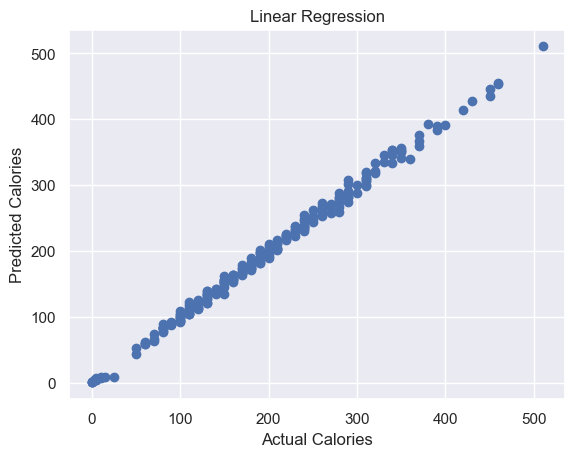

                                        Variable  Coefficient
const                                      const     0.914251
Total Fat (g)                      Total Fat (g)    12.534408
Total Carbohydrates (g)  Total Carbohydrates (g)     0.008411
Sugars (g)                            Sugars (g)     3.029839
Cholesterol (mg)                Cholesterol (mg)     0.982934
Trans Fat (g)                      Trans Fat (g)    -5.934708
Protein (g)                          Protein (g)     5.599416
Saturated Fat (g)              Saturated Fat (g)   -31.923390
Dietary Fibre (g)              Dietary Fibre (g)    -0.664969
Vitamin A (% DV)                Vitamin A (% DV)     7.219893
Calcium (% DV)                    Calcium (% DV)   -48.564177


In [42]:
# Fit the linear regression model
X = df[['Total Fat (g)', 'Total Carbohydrates (g)', 'Sugars (g)', 'Cholesterol (mg)', 'Trans Fat (g)', 'Protein (g)', 'Saturated Fat (g)', 'Dietary Fibre (g)', 'Vitamin A (% DV)', 'Calcium (% DV)']]
y = df['Calories']
X = sm.add_constant(X)  # Add constant term for intercept
model = sm.OLS(y, X).fit()

# Plot the linear regression
plt.scatter(y, model.predict(X))
plt.xlabel('Actual Calories')
plt.ylabel('Predicted Calories')
plt.title('Linear Regression')
plt.show()

# Display the coefficients in a table
coefficients = pd.DataFrame({'Variable': X.columns, 'Coefficient': model.params})
print(coefficients)
